# Imports

In [23]:
%pylab inline
%load_ext autoreload
%autoreload 2

from pmesh.pm import ParticleMesh
from nbodykit.lab import BigFileCatalog, BigFileMesh, FFTPower, MultipleSpeciesCatalog
from matplotlib.colors import LogNorm
from scipy.integrate import simps


sys.path.append('../code/utils/')
sys.path.append('../code/')
import tools, dohod, hod
import hodanalytics as hodanals
from time import time

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
from nbodykit.cosmology.cosmology import Cosmology
cosmodef = {'omegam':0.309167, 'h':0.677, 'omegab':0.048}
cosmo = Cosmology.from_dict(cosmodef)
dpath = '/project/projectdirs/m3127/H1mass/'
yscratch = '/global/cscratch1/sd/yfeng1/m3127/'
myscratch = '/global/cscratch1/sd/chmodi/m3127/'

aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])
h = 0.6776


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/nbodykit/cosmology/cosmology.py:427: UserWarning: Class did not read input parameter(s): omegab, omegam
  self.engine = ClassEngine(pars)


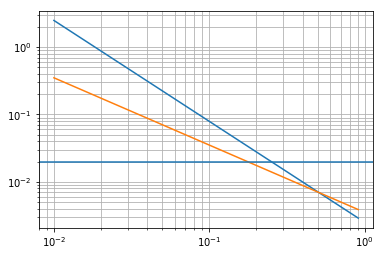

In [25]:
kk = np.logspace(-2, 0)
Nk = 4*np.pi*kk[:-1]**2*np.diff(kk)*400**3 /(2*np.pi)**3
plt.plot(kk[:-1], np.sqrt(2/Nk))
kk = np.arange(0.01, 1, 0.05)
Nk = 4*np.pi*kk[:-1]**2*np.diff(kk)*400**3 /(2*np.pi)**3
plt.plot(kk[:-1], np.sqrt(2/Nk))
plt.axhline(0.02)
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')

In [26]:
cosmo.scale_independent_growth_factor??

Docstring:
Background.scale_independent_growth_factor(self, z)

Return the scale invariant growth factor :math:`D(a)` for CDM
perturbations.

This is the quantity defined by CLASS as ``index_bg_D`` in the
background module.
Type:      builtin_function_or_method


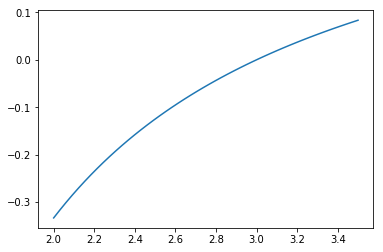

In [5]:
def tmp(a):
    g = 3/a+1
    k = (g-7)/3
    f = (3-a)/a/k
    return f

aa = np.linspace(2, 3.5)
plt.plot(aa, tmp(aa))

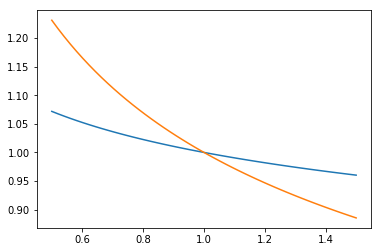

In [5]:
xx = np.linspace(0.5, 1.5)
plt.plot(xx, xx**-0.1)
plt.plot(xx, xx**-0.3)

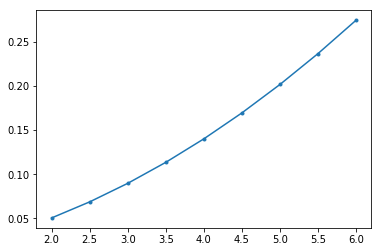

In [6]:
def rnu(z):
    return (1+z)**2/cosmo.efunc(1)/cosmo.H0

plt.plot(zzfiles, rnu(zzfiles), '.-')


In [7]:
zb = np.array((2, 3, 4, 5, 6))
kb = np.array((0.6, 0.8, 1, 1, 1))
delnuk = (16*np.log(2))**0.5/rnu(zb)/21e-3
print(delnuk/kb)

[5241.57187384 2211.28813428 1132.17952475  786.23578108  577.64261467]


In [152]:
np.exp(-1)

0.36787944117144233

# H1 mass distribution

In [169]:
# hcat = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/10240-9100-fixed/fastpm_0.2000/LL-0.200')
# hcat.size/1e9

In [170]:
# hpos = hcat['Position'].compute()

In [27]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

hpos, hmass, h1mass = {}, {}, {}
cpos, cmass, ch1mass = {}, {}, {}
spos, smass, sh1mass = {}, {}, {}
chid, shid = {}, {}
# halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()

for i, aa in enumerate(aafiles[:1]):
    zz = zzfiles[i]
    print(zz)
    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cen = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/cencat-m1_5p0min-alpha_0p8-v2/'%aa)
    sat = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/satcat-m1_5p0min-alpha_0p8-v2/'%aa)
    hmass[zz], h1mass[zz] = halos["Mass"].compute(), halos['H1mass'].compute()
    cmass[zz], ch1mass[zz] = cen["Mass"].compute(), cen['H1mass'].compute()
    smass[zz], sh1mass[zz] = sat["Mass"].compute(), sat['H1mass'].compute()
    hpos[zz], cpos[zz], spos[zz] = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
    chid[zz], shid[zz] = cen['HaloID'].compute(), sat['HaloID'].compute()
#     plt.plot(hmass[::-1], np.cumsum(h1mass[::-1]))
# plt.loglog()



6.0


FileNotFoundError: /project/projectdirs/m3127/H1mass//highres/2560-9100-fixed/fastpm_0.1429/cencat-m1_5p0min-alpha_0p8-v2/

In [ ]:
halos['Mass'].compute().ipynb_checkpoints/

In [ ]:
tmp = []
for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    tmp.append(dohod.HI_mass(1, aa, 'mcut'))
plt.plot(zzfiles, tmp, 'o')
tmp = []
for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    tmp.append(hmass[zz][0])
plt.plot(zzfiles, tmp, 's')
# plt.plot(zzfiles, 10**10*(6.11-1.99*np.array(zzfiles) + 0.165*np.array(zzfiles)**2), '<')
# plt.plot(zzfiles, 10**(9+(10.2-9)/(2-5)*(np.array(zzfiles)-5)), '<')
plt.plot(zzfiles, 10**(11-0.4*np.array(zzfiles)), '<')
plt.yscale('log')

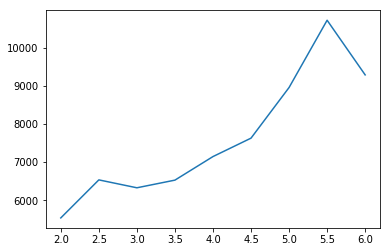

In [38]:
plt.plot(zzfiles, [hmass[zz][0]/10**(11-0.4*zz) for zz in zzfiles])


In [3]:
# for zz  in zzfiles:
#     plt.plot(hmass[zz][::10], h1mass[zz][::10], label=zz, lw=2)
# # plt.plot(halos['Mass'].compute()[::100], halos['H1mass'].compute()[::100])
# plt.loglog()
# plt.legend(ncol=2)

In [4]:
zz = 2.0
hmass[zz][shid[zz][np.argmax(smass[zz]/hmass[zz][shid[zz]])]]/dohod.HI_mass(1, 1/(zz+1), 'mcut')

0.7443058540236923

In [5]:
(smass[zz]/hmass[zz][shid[zz]]).max()

0.3333331658958515

In [49]:
zzfiles

[6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0]

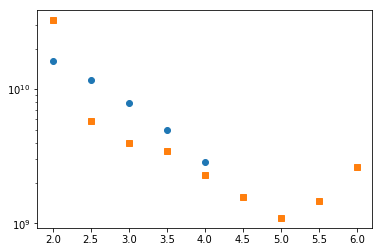

In [54]:
mcc = dohod.HI_mass(1, np.array(aafiles), 'mcut')
mcc2 = mcc.copy()
mcc2[-1] *= 2.
mcc2[-2] *= 0.5
mcc2[-3] *= 0.5
mcc2[-4] *= 0.7
mcc2[-5] *= 0.8

plt.plot(zzfiles, mcc, 'o')
plt.plot(zzfiles, mcc2, 's')
plt.yscale('log')

In [6]:
tmp = (dohod.HI_mass(1, 1/(zz+1), 'mcut')/(hmass[zz]/10) > 1).sum()


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(10, 20000000.0)

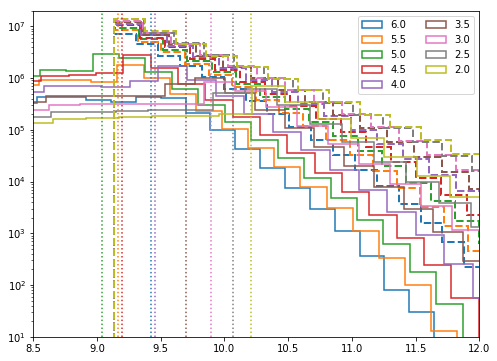

In [7]:
plt.figure(figsize=(8, 6))
for i, zz  in enumerate(zzfiles):
#     plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
#     plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True, ls="--")
    plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=20, histtype='step', label=zz, log=True, lw=1.5, normed=False)
    plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=20, histtype='step', log=True, lw=2, normed=False, ls="--")
    plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls=":")
plt.legend(ncol=2, loc=1)
plt.xlim(8.5, 12)
plt.ylim(10, 2e7)


In [8]:
# plt.figure(figsize=(8, 6))
# for i, zz  in enumerate(zzfiles):
# #     plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
#     plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=True, lw=2, normed=False, ls="-")
#     plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls=":")
# plt.legend(ncol=2, loc=1)
# plt.xlim(8.5, 13)
# plt.ylim(10, 1e7)

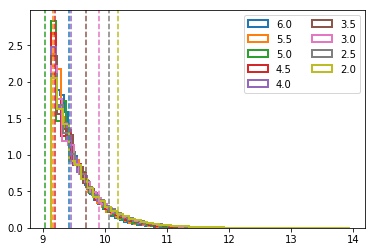

In [9]:
for i, zz  in enumerate(zzfiles):
    plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
    plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls="--")
plt.legend(ncol=2, loc=1)


In [ ]:
# zz = 2.0
# hid, hcount = np.unique(shid[zz], return_counts=True)
# scount = np.zeros_like(hmass[zz])
# scount[hid] = hcount
# plt.plot(np.log10(hmass[zz]), scount, '.')


In [6]:
for i, zz in enumerate(zzfiles):
    print(np.log10(hmass[zz][0]), np.log10(hmass[zz][-1]))

12.56793348692496 9.137505670080772
12.830264488235496 9.137505670080772
12.95216105799575 9.137505670080772
13.08245384881687 9.137505670080772
13.254011718153212 9.137505670080772
13.414720803986537 9.137505670080772
13.601137406846082 9.137505670080772
13.815143414648237 9.137505670080772
13.943176406779147 9.137505670080772


In [33]:
satcount = {}
for zz in zzfiles:
    print(zz)
    satcount[zz] = np.unique(shid[zz], return_counts=True)
    


6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [34]:
satcount

{6.0: (array([       0,        1,        2, ..., 18242545, 18242637, 18242735]),
  array([11, 16,  8, ...,  1,  1,  1])),
 5.5: (array([       0,        1,        2, ..., 20963553, 20963582, 20963651]),
  array([45, 29, 32, ...,  1,  1,  1])),
 5.0: (array([       0,        1,        2, ..., 23574908, 23575268, 23575413]),
  array([86, 76, 64, ...,  1,  1,  1])),
 4.5: (array([       0,        1,        2, ..., 25948635, 25948895, 25948944]),
  array([92, 72, 75, ...,  1,  1,  1])),
 4.0: (array([       0,        1,        2, ..., 28236241, 28237573, 28240086]),
  array([69, 61, 73, ...,  1,  1,  1])),
 3.5: (array([       0,        1,        2, ..., 26687901, 26704542, 26725031]),
  array([60, 55, 43, ...,  1,  1,  1])),
 3.0: (array([       0,        1,        2, ..., 18022552, 18071665, 18135217]),
  array([52, 52, 43, ...,  1,  1,  1])),
 2.5: (array([       0,        1,        2, ..., 12750310, 12810332, 12818683]),
  array([57, 49, 47, ...,  1,  1,  1])),
 2.0: (array([      0,  

In [34]:
hcount, hm, ch1, sh1, hh1, scount = {}, {}, {}, {}, {}, {}
for zz in zzfiles:
    print(zz)
    hbins = np.logspace(np.log10(hmass[zz][-1])-0.01, np.log10(hmass[zz][0])-0.01)
    hcount[zz], hm[zz], ch1[zz], sh1[zz], hh1[zz], scount[zz] = [np.zeros_like(hbins) for i in range(6)]
    for i in range(hbins.size-1):
        r1, r2 = np.where(hmass[zz]>hbins[i])[0][-1], np.where(hmass[zz]>hbins[i+1])[0][-1]
        hcount[zz][i] = (r1-r2)
        hm[zz][i] = (hmass[zz][r2:r1].sum())
        ch1[zz][i] = (ch1mass[zz][(chid[zz] < r1) & (chid[zz] > r2)].sum())
        sh1[zz][i] = (sh1mass[zz][(shid[zz] < r1) & (shid[zz] > r2)].sum())
        scount[zz][i] = (((shid[zz] < r1) & (shid[zz] > r2)).sum())
        hh1[zz][i] = (ch1[zz][i]+sh1[zz][i])
    


6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [42]:
scount[2.0], hcount[2.0]

(array([   0.,    0.,    0.,    0.,    0.,   59.,  940., 2163., 2972.,
        3654., 4310., 4924., 5440., 5878., 6018., 6350., 6437., 6646.,
        6717., 7027., 6951., 6900., 6991., 7250., 7087., 7045., 7030.,
        6831., 6702., 6187., 6062., 6068., 5622., 5292., 4957., 4719.,
        4257., 3776., 3201., 3242., 2415., 1975., 2044., 1403.,  841.,
         770.,  501.,  202.,  505.,    0.]),
 array([6.490796e+06, 5.138553e+06, 3.979229e+06, 3.423474e+06,
        2.722028e+06, 2.101045e+06, 1.703861e+06, 1.458664e+06,
        1.122739e+06, 9.121990e+05, 7.504550e+05, 6.031580e+05,
        4.981520e+05, 4.012400e+05, 3.198610e+05, 2.598120e+05,
        2.099810e+05, 1.689700e+05, 1.355700e+05, 1.080790e+05,
        8.646100e+04, 6.873700e+04, 5.515600e+04, 4.384300e+04,
        3.457100e+04, 2.718000e+04, 2.111300e+04, 1.672800e+04,
        1.282000e+04, 9.923000e+03, 7.662000e+03, 5.876000e+03,
        4.461000e+03, 3.319000e+03, 2.551000e+03, 1.901000e+03,
        1.365000e+03, 9.

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


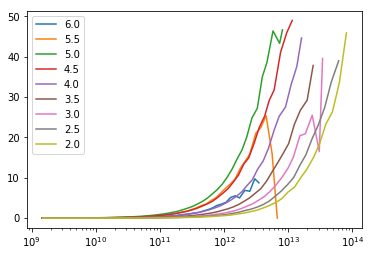

In [43]:
for zz in zzfiles:
    plt.plot(hm[zz]/hcount[zz], scount[zz]/hcount[zz], label=zz)
plt.xscale('log')
plt.legend()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


[]

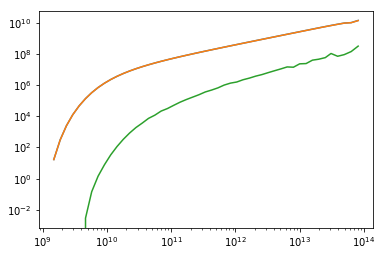

In [44]:
plt.plot(hm[zz]/hcount[zz], hh1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], ch1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], sh1[zz]/hcount[zz])
plt.loglog()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


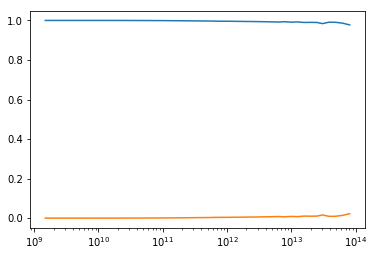

In [46]:
# plt.plot(hm[zz]/hcount[zz], hh1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], ch1[zz]/hh1[zz])
plt.plot(hm[zz]/hcount[zz], sh1[zz]/hh1[zz])
# plt.loglog()
plt.xscale('log')

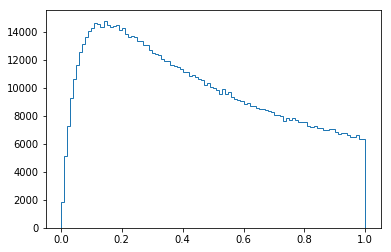

In [101]:
def get_nfw_r(c):
    while True:
        x = np.random.uniform() * c
        if np.random.uniform() < 4*x/(1+x)/(1+x):
            return x / c
        
rr = []
for i in range(1000000): rr.append(get_nfw_r(7))
    
plt.hist(rr, bins=100, histtype='step')
plt.show()

# Highres cosmo4d

In [30]:
bs = 400
nc = 128
ncf = 512
step = 5
stepf = 40
path = '/project/projectdirs/m3035/chmodi/cosmo4d/data/z00/'
pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])
pmf = ParticleMesh(BoxSize=bs, Nmesh = [ncf, ncf, ncf])

In [32]:
seed = 100
mesh = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, nc, seed, step), 'd').paint()
meshf = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, ncf, seed, stepf), 'd').paint()
cat = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/FOF'%(bs, ncf, seed, stepf))
parts = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/dynamic/1'%(bs, nc, seed, step))

Error: b"Big File `/project/projectdirs/m3035/chmodi/cosmo4d/data/z00/L0400_N0512_S0100_40step/mesh' does not exist (No such file or directory) @(src/bigfile.c:195)"

In [42]:
hpos = cat['PeakPosition'].compute()
hmass = cat['Mass'].compute()
hlen = cat['Length'].compute()

In [43]:
hpos.shape[0]/bs**3

0.00658259375

In [8]:
parts['Position'].compute().shape

(2097152, 3)

In [9]:
mesh2 = pm.paint(parts['Position'])
meshsub = pmf.paint(parts['Position'])
meshsubn = pmf.paint(parts['Position'], resampler='nearest')
meshsubsm = ft.smooth(meshsub, 3, 'fingauss')

In [10]:
(meshsub[...] > 0).sum()

11339728

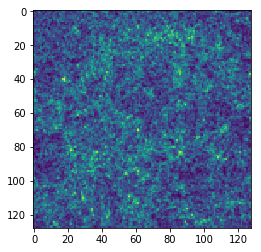

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


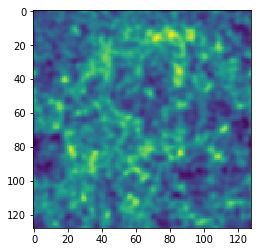

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


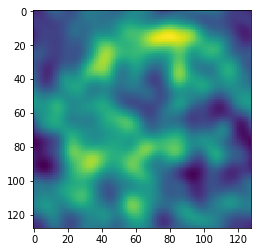

In [53]:
num = int(1e-3*bs**3)
hpmesh = pm.paint(hpos[:num])
plt.imshow(hpmesh[...].sum(axis=0))
plt.show()
hpmeshsm = hpmesh.r2c().apply(lambda k, v: v * np.exp(-sum(ki**2 for ki in k)* 3**2)).c2r()
plt.imshow(hpmeshsm[...].sum(axis=0))
plt.show()
hpmeshsm = hpmesh.r2c().apply(lambda k, v: v * np.exp(-sum(ki**2 for ki in k)* 10**2)).c2r()
plt.imshow(hpmeshsm[...].sum(axis=0))
plt.show()


In [11]:
num = int(1e-3*bs**3)
hpmesh = pmf.paint(hpos[:num])
dmread0 = mesh.readout(hpos[:num])
dmread = meshsub.readout(hpos[:num])
dmreadnn = meshsubn.readout(hpos[:num])
dmreadsm = meshsubsm.readout(hpos[:num])


In [12]:
(dmread <= 0).sum()/num, (dmreadnn <= 0).sum()/num, (dmreadsm <= 0).sum()/num

(0.037765625, 0.17696875, 0.0)

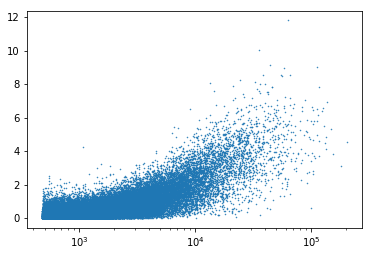

In [13]:
plt.plot(hmass[:num], dmread, '.', ms=1)
# plt.plot(hmass[:num], dmread0, '.', ms=1)
plt.xscale('log')

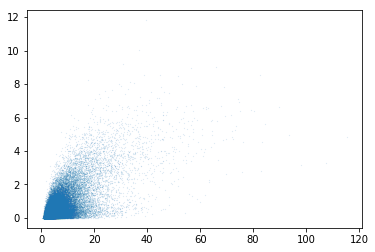

In [105]:
# plt.plot(dmread0[-10000:], dmread[-10000:], '.', ms=1)
plt.plot(dmread0[:], dmread[:], '.', ms=.1)
# plt.xscale('log')

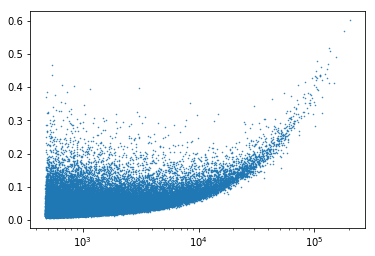

In [83]:
plt.plot(hmass[:num], dmreadsm, '.', ms=1)
plt.xscale('log')

In [94]:
((meshsub[...] > 0) & (hpmesh[...] > 0)).sum()/(meshsub[...] > 0).sum()

0.03365495186480663

In [76]:
sidef = bs/ncf

In [4]:
hmass[-1]/13/sidef**3

KeyError: -1

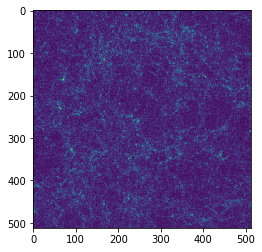

In [78]:
plt.imshow(meshsub[...].sum(axis=0))

# xi

In [63]:
# %%bash
# ls ../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/

(0.1, 10)

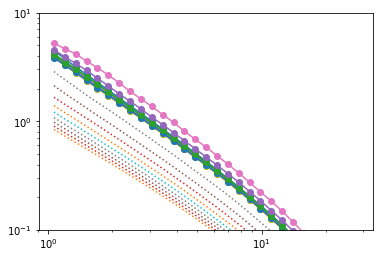

In [64]:
for aa in aafiles:
    xi = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/xih1mass_%.4f.txt'%aa).T
    plt.plot(xi[0], xi[1], marker='o')
    xi = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/ximxh1mass_%.4f.txt'%aa).T
    plt.plot(xi[0], xi[1], ':', )
plt.loglog()
plt.ylim(0.1, 10)

In [84]:
aa = 1/5
xim = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/ximatter_%.4f.txt'%aa).T
xih = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/xih1mass_%.4f.txt'%aa).T
xix = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/ximxh1mass_%.4f.txt'%aa).T


In [85]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius

In [92]:
xim[0][:-1].reshape(-1, 2).mean(axis=1)

array([ 1.13273666,  1.43751993,  1.82417396,  2.31492559,  2.93787094,
        3.72787876,  4.73086699,  6.00335313,  7.61800734,  9.66716671,
       12.26738283, 15.56706056, 19.75409885, 25.06737546])

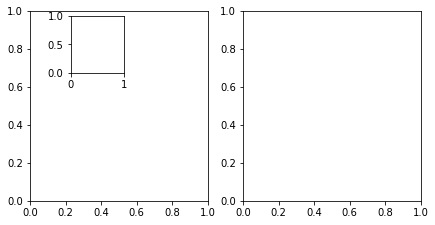

In [118]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Now make the figure.                                                                                                                                                                                                                                                                
fig,ax = plt.subplots(1,2,figsize=(7,3.5))

# The left hand panel is DLA bias vs. redshift.                                                                                                                                                                                                                                       

inax = inset_axes(ax[0],
                width="30%", # width = 30% of parent_bbox                                                                                                                                                                                                                             
                height= "30%",#1., # height : 1 inch                                                                                                                                                                                                                                  
                  loc=2, bbox_to_anchor=(0.2,0,1,1),
                  bbox_transform=ax[0].transAxes)


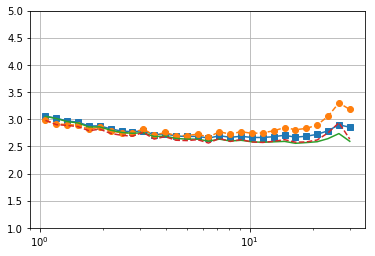

In [86]:
# plt.plot(xim[0], xim[1], 's')
# plt.plot(xim[0], xih[1], 's')
plt.plot(xim[0], (xih[1]/xim[1])**0.5, 's-')
plt.plot(xim[0], xix[1]/xim[1], 'o--')

y = ius(xih[0], xih[1])(xim[0])
plt.plot(xim[0], (y/xim[1])**0.5, '-')
y = ius(xix[0], xix[1])(xim[0])
plt.plot(xim[0], y/xim[1], '--')

plt.semilogx()
plt.ylim(1, 5)
plt.grid()

In [28]:
np.diff(np.log10(xim[0]))

array([0.05182601, 0.05174298, 0.0517919 , 0.05173727, 0.05165007,
       0.05178438, 0.05175296, 0.05179748, 0.05170311, 0.05175619,
       0.05174043, 0.05175622, 0.05174427, 0.05171597, 0.05174237,
       0.05173285, 0.05173115, 0.05173683, 0.05172673, 0.05173173,
       0.05172771, 0.05173374, 0.05172656, 0.05173176, 0.05172586,
       0.05172563, 0.05172785, 0.05172419])

In [57]:
tmp = np.logspace(np.log10(1), np.log10(30), 30)
check = np.zeros_like(xim[0])
for i in range(check.size): check[i] = (tmp[i]*tmp[i+1])**0.5
check/xim[0]

array([0.99602896, 0.99398807, 0.99214103, 0.99018588, 0.98835889,
       0.98673339, 0.98480593, 0.98295337, 0.98100372, 0.9792707 ,
       0.97742128, 0.97561075, 0.97376816, 0.97195581, 0.97021004,
       0.96840853, 0.96663157, 0.96486165, 0.96308237, 0.96132873,
       0.95956723, 0.95781781, 0.95605833, 0.95431785, 0.95256913,
       0.95083653, 0.94910758, 0.94737694, 0.94565742])

# nfw

In [26]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d, interp2d

In [6]:
#  float get_nfw_r(const float c) const {
#     // Returns r/rvir, using a simple sampling strategy
#     float   x;
#     while (1==1) {
#       x = drand48() * c;
#       if (drand48() < 4*x/(1+x)/(1+x)) { /* Compare to r^2.rho(r) */
#         return(x/c);
#       }
#     }
#   }

# def get_nfw_r(c=7):
#     x = np.random.uniform() * c
#     while (np.random.uniform() > 4*x/(1+x)/(1+x)):
#         x = np.random.uniform() * c
#     else:
#         return(x/c)

def get_nfw_r(c=7):
    while (True):
        x = np.random.uniform() * c
        if (np.random.uniform() < 4*x/(1+x)/(1+x)):
            return(x/c)


In [68]:
def gcum(x):
    return np.log(1+x) - x/(1+x)
    
def cumnfw(r, c=7):
    '''cumulative pdf for nfw profile at scaled radius(by r_vir)=r
    Taken from https://halotools.readthedocs.io/en/latest/source_notes/empirical_models/phase_space_models/nfw_profile_source_notes.html
    '''
    return gcum(r*c)/gcum(c)

def ilogcdfnfw(c=7):
    rr = np.logspace(-5, 0, 1000)
    cdf = cumnfw(rr, c=c)
    lrr, lcdf = np.log(rr), np.log(cdf)
    return interp1d(lcdf, lrr)
    

def ilcdf2dfunc():
    civ = np.linspace(5, 10, 100)
    cdfiv = np.logspace(-5, 0, 1000)
    riv = []
    for i , c in enumerate(civ):
        riv.append(ilogcdfnfw(c)(np.log(cdfiv)))
    riv = np.array(riv)
    return interp2d(civ, np.log(cdfiv), riv.T)    
#     return interp2d(np.log(cdfiv), civ, riv)    
    
def sampleilogcdf(n, ilogcdf):
    u = np.random.uniform(size=n)
    lu = np.log(u)
    lx = ilogcdf(lu)
    return np.exp(lx)

r = sampleilogcdf(int(1e6), ilogcdfnfw(c=7))


In [51]:
# riv = np.logspace(-5, 0, 1000)
# civ = np.linspace(5, 10, 100)
# r2d, c2d = np.meshgrid(riv, civ)
# cdf2d = cumnfw(r2d, c2d)
# lriv, lcdf2d = np.log(riv), np.log(cdf2d)

# riv = np.logspace(-5, 0, 1000)


In [8]:
%timeit ilogcdfnfw(np.random.uniform()*10)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


219 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


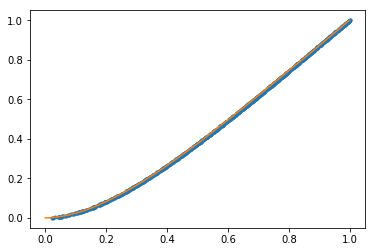

In [33]:
c = 7 
rr = np.array([get_nfw_r(c) for i in range(100000)])
rric = sampleilogcdf(100000, ilogcdfnfw(c=c))

tmp = np.histogram(rr, bins=1000)
tmpx = tmp[1][:-1]
tmpy = np.cumsum(tmp[0])
tmpy = tmpy/tmpy[-1]

plt.plot(rr[::100], cumnfw(rr[::100], c=c), '.')
plt.plot(tmpx, tmpy)

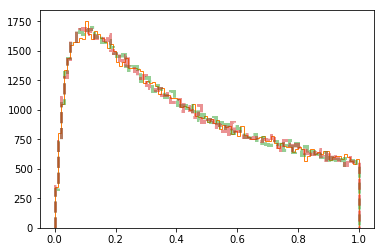

In [74]:
c = 9.991
rr = np.array([get_nfw_r(c) for i in range(100000)])
rric = sampleilogcdf(100000, ilogcdfnfw(c=c))

ilcdf2d = ilcdf2dfunc()
tmp = lambda x: ilcdf2d(c, x)
rric2d = sampleilogcdf(100000, tmp)

plt.hist(rr, histtype='step', bins=100, color='C%d'%(1), ls="-", lw=1, label='c = %d'%c)
plt.hist(rric, histtype='step', bins=100, color='C%d'%(2), ls="--", lw=3, alpha=0.5)
plt.hist(rric2d, histtype='step', bins=100, color='C%d'%(3), ls="--", lw=3, alpha=0.5)
plt.show()

In [63]:
n = int(1e6)
%timeit np.array([get_nfw_r(7) for i in range(n)])
ilcdf = ilogcdfnfw(c=7)
%timeit rric = sampleilogcdf(n, ilcdf)


2.63 s ± 94.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
102 ms ± 948 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
cc = np.random.uniform(low=5, high=10, size=10000)
nn =[]
for i, c in enumerate(cc):
    nn.append(np.random.randint(1, 10))
np.array(nn).sum()    

49901

In [92]:
%%timeit 

for i, c in enumerate(cc):
    n = nn[i]
    rr = [get_nfw_r(c) for i in range(n)]    

226 ms ± 7.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit 
for i, c in enumerate(cc):
    n = nn[i]
    ilcdf =  ilogcdfnfw(c)
    rr = sampleilogcdf(n, ilcdf)
    

2.69 s ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
ilcdf2d = ilcdf2dfunc()


In [95]:
%%timeit 
for i, c in enumerate(cc):
    n = nn[i]
    ilcdf = lambda x: ilcdf2d(c, x)
    rr = sampleilogcdf(n, ilcdf)
    

223 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


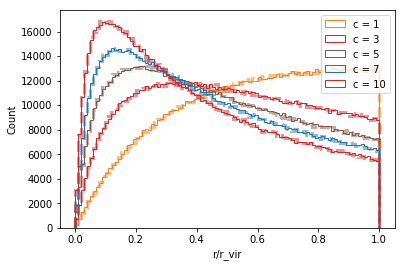

In [18]:
for c in [1, 3, 5, 7, 10]:
    n = int(1e6)
    rr = np.array([get_nfw_r(c) for i in range(n)])
    rric = sampleilogcdf(n, ilogcdfnfw(c))
    plt.hist(rr, histtype='step', bins=100, color='C%d'%(c%7), ls="-", lw=1, label='c = %d'%c)
    plt.hist(rric, histtype='step', bins=100, color='C%d'%(c%7), ls="--", lw=3, alpha=0.5)
plt.legend()
plt.xlabel('r/r_vir')
plt.ylabel('Count')
plt.show()

# Satellite SN


In [152]:

def HI_hod(mhalo,aa,mcut=2e9):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(2+2*zz)
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    return(mHI)
    #

    
nc = 256
    
project = '/project/projectdirs/m3127/H1mass/'
sim, prefix = 'highres/%d-9100-fixed'%2560, 'highres'
suff='-m1_8p0min-alpha_0p9'
    
aa = 0.3333

mcut = 1e9*( 1.8 + 15*(3*aa)**8 )
cencat = BigFileCatalog(project+sim+'/fastpm_%0.4f/cencat'%aa)
satcat = BigFileCatalog(project+sim+'/fastpm_%0.4f/satcat'%aa+suff)
#
cencat['HImass'] = HI_hod(cencat['Mass'],aa,mcut)   
satcat['HImass'] = HI_hod(satcat['Mass'],aa,mcut)   
ch1mass = cencat['HImass'].compute()
sh1mass = satcat['HImass'].compute()
# totHImass        = cencat['HImass'].sum().compute() +\
#                    satcat['HImass'].sum().compute()
# cencat['HImass']/= totHImass/float(nc)**3
# satcat['HImass']/= totHImass/float(nc)**3
#
allcat = MultipleSpeciesCatalog(['cen','sat'],cencat,satcat)
#
h1mesh     = allcat.to_mesh(BoxSize=bs,Nmesh=[nc,nc,nc],weight='HImass',value='HImass')
###pkh1h1     = FFTPower(h1mesh/h1mesh.cmean(),mode='1d').power
pkh1h1     = FFTPower(h1mesh,mode='1d').power
print("SN=",pkh1h1.attrs['shotnoise'])

SN= 0.5062638559705809


In [156]:
bs**3 * ((ch1mass**2).sum() + (sh1mass**2).sum()) / ((ch1mass).sum() + (sh1mass).sum())**2

41.11725962286755

In [161]:
bs**3 * ((ch1mass.size)**1 + (sh1mass.size)**1) / ((ch1mass).size + (sh1mass).size)**2

0.4613400908781806

In [157]:
satcat.csize, sh1mass.size

(3451693, 3451693)

In [158]:
bs**3/(ch1mass.size + sh1mass.size)

0.4613400908781806

In [162]:
bs**3/ch1mass.size , bs**3/sh1mass.size

(0.5097200109422659, 4.860575955045828)

In [163]:
bs**3 * ((ch1mass**2).sum()/ch1mass.size + (sh1mass**2).sum()/sh1mass.size) / ((ch1mass).sum() + (sh1mass).sum())**2

1.732946331518884e-06

In [155]:
h1mesh.compute().cmean()

270837312.0

In [139]:
totHImass/nc**3

1829967.2443628227

9.12222159947145

In [142]:
ch1mass

array([1.53370041e+09, 1.33497072e+09, 1.32172987e+09, ...,
       6.78636367e+04, 6.78636367e+04, 6.78636367e+04])

# Plots

In [50]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]




(10, 10000000.0)

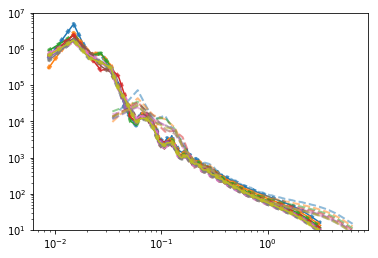

In [49]:
#1D 
for i, aa in enumerate(aafiles[:2]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    pk = np.loadtxt('../data/L1024/Halocat_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
    pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
    pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
# plt.legend(loc=bbox_to_anchor(1, 1))
plt.ylim(10, 1e7)

(10, 1000)

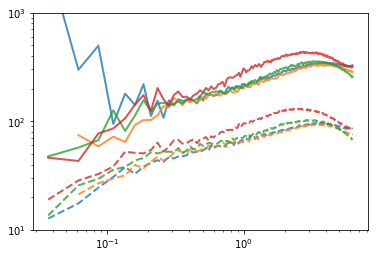

In [86]:
#kmu 

for i, aa in enumerate(aafiles[:1]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d:'%(i+1), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d:'%(i+2), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d:'%(i+3), label=aa, lw=4, alpha=0.8)
#     pk = np.loadtxt('../data/L0256/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-1/HI_pks_mu_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d--'%i, label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d--'%(i+1), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d--'%(i+2), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d--'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-4/HI_pks_mu_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
plt.ylim(10,1000)

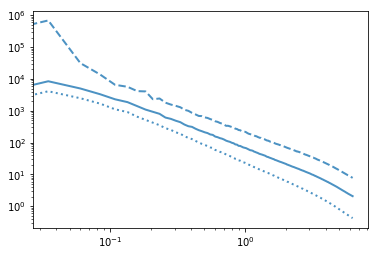

In [92]:
#kmu 

for i, aa in enumerate(aafiles[:1]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d:'%(i+1), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d:'%(i+2), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d:'%(i+3), label=aa, lw=4, alpha=0.8)
#     pk = np.loadtxt('../data/L0256/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-1/HI_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    
    pk = np.loadtxt('../data/L0256-1/Halo1_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d:'%i, label=aa, lw=2, alpha=0.8)

    pk = np.loadtxt('../data/L0256-4/HI_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d--'%i, label=aa, lw=2, alpha=0.8)
    
# plt.ylim(10,1000)

Text(0.5, 0, 'P(k)')

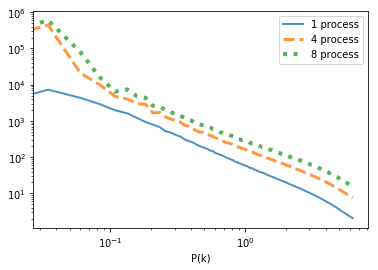

In [102]:
pk = np.loadtxt('../data/pkdebug2-1.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d-'%0, label='1 process', lw=2, alpha=0.8)
pk = np.loadtxt('../data/pkdebug2-4.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d--'%1, label='4 process', lw=3, alpha=0.8)
pk = np.loadtxt('../data/pkdebug2-8.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d:'%2, label='8 process', lw=4, alpha=0.8)
plt.legend()
plt.xlabel('k')
plt.xlabel('P(k)')

(1000.0, 100000000.0)

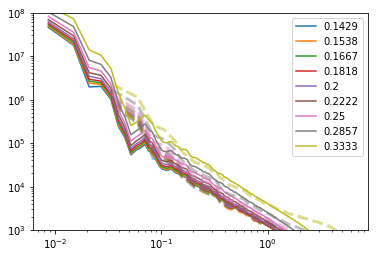

In [81]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/Halocat_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
    pk = np.loadtxt('../data/L1024/HI_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
    pk = np.loadtxt('../data/L0256/HI_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=3, alpha=0.5)
plt.legend()
plt.ylim(1e3, 1e8)

../data/L1024/HI_bias_0.2500.txt not found.


(0, 5)

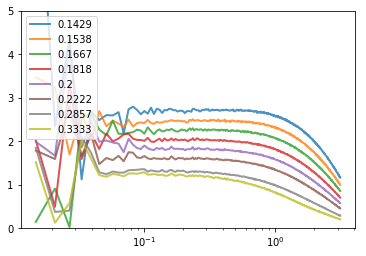

In [60]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    try:
        pk = np.loadtxt(f'../data/L1024/HI_bias_{aa:.4f}.txt').T
        plt.semilogx(pk[0][1:], pk[1][1:], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    except Exception as e: print(e)
#     pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
#     pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
plt.legend()
plt.ylim(0, 5)
# plt.ylim(10, 1e7)

In [ ]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    try:
        pk = np.loadtxt(f'../data/L1024/HI_bias_{aa:.4f}.txt').T
        plt.semilogx(pk[0][1:], pk[1][1:], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    except Exception as e: print(e)
#     pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
#     pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
plt.legend()
plt.ylim(0, 5)
# plt.ylim(10, 1e7)

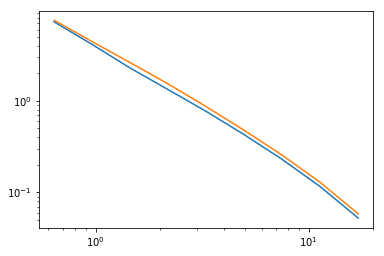

In [16]:
# plt.plot(*np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/xih1mass.txt').T)
x, y = np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/ss-1000/xih1mass.txt').T
# plt.plot(x, y*x**2)
plt.loglog(x, y)
x, y = np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/ss_cm-10000/xigal_h1.txt').T
# plt.plot(x, y*x**2, '--')
plt.loglog(x, y)


# power law sampling

In [33]:

mh = 1e12
mmin = 1e9
mmax = mh/3.
alpha = -0.8

nsat = 100
def nsat_cd(x, xmin=mmin/mh, xmax=mmax/mh, alpha=alpha) : 
    C = nsat * alpha/(xmax**alpha - xmin**alpha)
    return C * (xmax**alpha - x**alpha)/ alpha

nmin = int(nsat_cd(mmin/mh))
nmax = int(nsat_cd(mmax/mh))
n = nmin - nmax
print(nmin, nmax, n)

##Analytic
mm = np.logspace(np.log10(mmin), np.log10(mmax), 1000)[::-1]
nsatcdmm = nsat_cd(mm/mh)/nsat_cd(mm[-1]/mh)

def assign_msat(x, xmin, xmax, alpha):
    return  (xmin**alpha + (xmax**alpha - xmin**alpha)*x)**(1/alpha)
    
msats = []
nhalo = 10000
for i in range(nhalo):
    xx = np.random.uniform(size=n)
    msats.append(mh*assign_msat(xx, mmin/mh, mmax/mh, alpha=alpha))
msats = np.array(msats)

100 0 100


In [4]:
mnum, mval = np.histogram(msats.flatten(), bins=1000, normed=False)
mval = mval[:-1]
mval = mval[::-1]
mnum = mnum[::-1]
mnumcum = np.cumsum(mnum)
mnumcumnorm = mnumcum/mnumcum[-1]
# mnumcum = mnumcum /mnumcum[-1]

# mm = mval[::-1]
# nsatcdmm = nsat_cd(mm)/nsat_cd(mm[0])


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  if __name__ == '__main__':


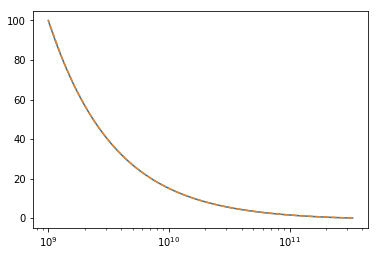

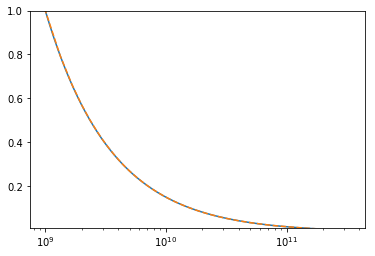

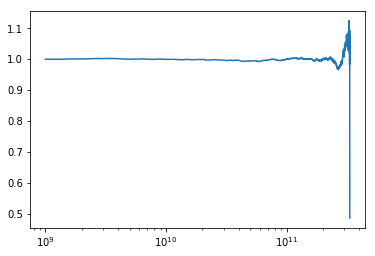

In [7]:
plt.plot(mm, nsat_cd(mm/mh))
# plt.plot(mval, mnum/nhalo)
plt.plot(mval, np.cumsum(mnum)/nhalo, '--')
plt.xscale('log')
plt.show()
plt.semilogx(mm, nsatcdmm)
plt.semilogx(mval, mnumcumnorm, '--')
plt.ylim(1e-2, 1)
plt.show()
from scipy.interpolate import interp1d
# plt.semilogx(mval, mnumcumnorm/np.interp(mval, mm, nsatcdmm), '.')
plt.semilogx(mval, mnumcumnorm/interp1d(mm, nsatcdmm)(mval), '-')
plt.show()


# Check my catalog

In [870]:
yscratch = '/global/cscratch1/sd/yfeng1/m3127/'
project = '/project/projectdirs/m3127/H1mass/'
myscratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'

# dpath = '../data/'

bs, nc = 256, 256
sim = '/lowres/%d-9100-fixed'%256
# sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]

suff = 'm1_00p3mh-alpha-0p8-subvol'
aa = 0.2500
halos = BigFileCatalog(yscratch + sim+ '/fastpm_%0.4f//'%aa, dataset='LL-0.200')
cen = BigFileCatalog(myscratch + sim+ '/fastpm_%0.4f/cencat-%s/'%(aa, suff))
sat = BigFileCatalog(myscratch + sim+ '/fastpm_%0.4f/satcat-%s/'%(aa, suff))
mp = halos.attrs['MassTable'][1]*1e10
hmass = halos['Length'].compute() * mp
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()
cmass = cen["Mass"].compute()
smass = sat["Mass"].compute()
hpos, cpos, spos = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
chid, shid = cen['GlobalID'].compute(), sat['GlobalID'].compute()
cnsat = cen['Nsat'].compute()


FileNotFoundError: /global/cscratch1/sd/yfeng1/m3127//highres/2560-9100-fixed/fastpm_0.3175//

In [255]:
ii = 12342
(shid==ii).sum()/cnsat[ii]

1.0

In [256]:
halos.attrs['BoxSize'] = np.broadcast_to(halos.attrs['BoxSize'], 3)


In [258]:
hmass

array([3.65422502e+13, 3.61991305e+13, 3.55128910e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [259]:
cmass

array([3.65422502e+13, 3.55128910e+13, 3.05376551e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [260]:
cen['HaloMass'].compute()

array([3.65422502e+13, 3.55128910e+13, 3.05376551e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [285]:
spos.shape, smass.shape


(3689456, 3)

In [292]:
indices = np.searchsorted(shid, np.arange(hmass.size), side='right')
splits = np.array_split(smass, indices)

In [317]:
splits = np.array_split(spos.flatten(), 3*indices)[:-1]

In [320]:
sspos = []
for i in splits:
    sspos.append( i.reshape(-1, 3))

In [327]:
ii = 10003
np.allclose(sspos[ii]/spos[shid==ii], 1)

True

In [328]:
sspos[ii], spos[shid==ii]

(array([[15.14880823, 46.15544921, 16.66642583],
        [15.28167188, 46.03170151, 16.71360528],
        [15.36256512, 46.08665412, 16.61748069],
        [15.27747168, 46.13225053, 16.58632025],
        [15.35324376, 46.13616865, 16.65576341],
        [15.29060327, 46.10778764, 16.64338269],
        [15.30347843, 46.1613814 , 16.78046727],
        [15.2861225 , 46.17692319, 16.72041962],
        [15.28961077, 46.12688135, 16.73081707],
        [15.26261232, 46.10643841, 16.71712486],
        [15.23132786, 46.13275866, 16.74322463],
        [15.25361219, 46.13411211, 16.71375407],
        [15.28895403, 46.19960464, 16.74554113],
        [15.30350457, 46.04751201, 16.6307104 ],
        [15.2153586 , 46.09464689, 16.74806597]]),
 array([[15.14880823, 46.15544921, 16.66642583],
        [15.28167188, 46.03170151, 16.71360528],
        [15.36256512, 46.08665412, 16.61748069],
        [15.27747168, 46.13225053, 16.58632025],
        [15.35324376, 46.13616865, 16.65576341],
        [15.290603

In [366]:
tosave = smass[shid==10000]
lsave = np.log10(tosave)
master = (np.array([10**i for i in range(lsave.size)])*lsave).sum()
extract = []

current = master
for i in range(lsave.size):
    extract .append( current //2**(lsave.size-i))
    current = master %10**(lsave.size-i)

In [379]:
(lsave[0] + lsave[1]*10) % 10, lsave[0]

(5.7828525985016626, 8.527329511503343)

In [361]:
master // 2**(lsave.size)

9.0

In [298]:
sathmass2 = []
for i in splits:
    sathmass2.append(i.sum())
sathmass2 = np.array(sathmass2)

In [143]:
(sathmass2[:-1]/sathmass).max()

NameError: name 'sathmass2' is not defined

In [261]:
# start = time()
# sathmass = np.zeros_like(hmass)
# unipos, unicount = np.unique(shid, return_inverse=True)

# for i in range(unicount.size):
#     sathmass[unipos[unicount[i]]] +=  smass[i]
# print(time() - start)

# start = time()
# sathmass2 = np.zeros_like(hmass)
# unipos, unicount = np.unique(shid, return_counts=True)

# index = 0 
# for i in range(unicount.size):
#     sathmass2[unipos[i]] =  smass[index:index+unicount[i]].sum()
#     index += unicount[i]
# print(time() - start)


# start = time()
# sathmass = np.zeros_like(hmass)

# index = 0 
# for i in range(shid.size):
#     sathmass[shid[i]] +=  smass[i]
# print(time() - start)


start = time()
sathmass = np.zeros_like(hmass)
tot = np.bincount(shid, smass)
sathmass[:shid[-1]+1] = tot
print(time()-start)

0.01728367805480957


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


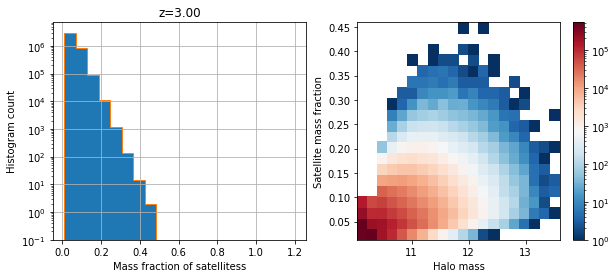

In [689]:
sathmass = np.zeros_like(hmass)
unipos, unicount = np.unique(shid, return_inverse=True)

for i in range(unicount.size):
    sathmass[unipos[unicount[i]]] +=  smass[i]
sathfrac = sathmass/hmass



fig, axar = plt.subplots(1, 2, figsize = (10, 4))
ax = axar[0]
ax.hist(sathmass/hmass, bins=20, range=(0.01, 1.2), log=True, normed=False)
ax.hist(1-cmass/hmass, bins=20, range=(0.01, 1.2), log=True, normed=False, histtype='step')
ax.set_xlabel('Mass fraction of satellitess')
ax.set_ylabel('Histogram count')
ax.set_title('z=%0.2f'%(1/aa-1))
ax.grid(which='major')

ax = axar[1]
im = ax.hist2d(np.log10(hmass[sathfrac > 0]),  sathfrac[sathfrac > 0], bins=20, norm=LogNorm(), cmap='RdBu_r')
plt.colorbar(im[3], ax=ax)
ax.set_xlabel('Halo mass')
ax.set_ylabel('Satellite mass fraction')
plt.show()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Distribution of satellites for 100 halos of mass around 1.21e+13')

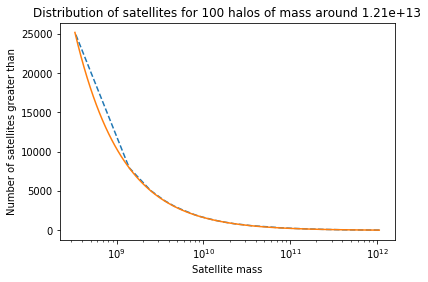

In [196]:
msats = smass[(shid>50) & (shid<150)]
mnum, mval = np.histogram(msats.flatten(), bins=1000, normed=False)
mval = mval[:-1]
mval = mval[::-1]
mnum = mnum[::-1]
mnumcum = np.cumsum(mnum)
mnumcumnorm = mnumcum/mnumcum[-1]
# plt.semilogx(mval, mnumcumnorm, '--')
plt.semilogx(mval, mnumcum, '--')


def nsat_func(x, nsat, xmin, xmax, alpha) : 
    C = nsat * alpha/(xmax**alpha - xmin**alpha)
    return C * (xmax**alpha - x**alpha)/ alpha

mm = np.logspace(np.log10(msats.min()), np.log10(msats.max()), 100)
mh = hmass[50:100].mean()
mmin, mmax = msats.min(), msats.max()
plt.semilogx(mm, nsat_func(mm/mh, msats.size, mmin/mh, mmax/mh, alpha=-0.8))
plt.xlabel('Satellite mass')
plt.ylabel('Number of satellites greater than')
plt.title('Distribution of satellites for 100 halos of mass around %0.2e'%mh)

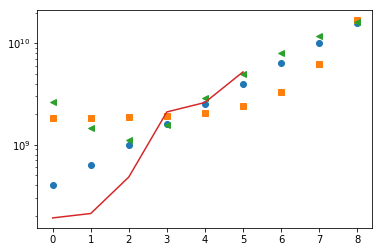

In [128]:
plt.plot( 10**(11-0.4*np.array(zzfiles)), 'o')
plt.plot(1e9*( 1.8 + 15*(3*np.array(aafiles))**8), 's')
plt.plot(1e10*(6.11-1.99*(np.array(zzfiles)+1)+0.165*(np.array(zzfiles)+1)**2), '<')
plt.plot(np.array((5.2e10, 2.6e10, 2.1e10, 4.8e9, 2.1e9, 1.9e9))[::-1] /10)
plt.yscale('log')

In [271]:
hbins = np.logspace(np.log10(hmass[-1])-0.01, np.log10(hmass[0])-0.01)
hcount, hm, ch1 = [np.zeros_like(hbins) for i in range(3)]
ranks = []
for i in range(hbins.size-1):
    r1, r2 = np.where(hmass>hbins[i])[0][-1]+1, np.where(hmass>hbins[i+1])[0][-1]+1
    ranks.append([r1, r2])
    hcount[i] = (r1-r2)
    hm[i] = (hmass[r2:r1].sum())
    ch1[i] = (cmass[(chid < r1) & (chid > r2)].sum())

ranks= np.array(ranks)


In [259]:
# # %%timeit
# ranks = []
# for i in range(hbins.size-1):
#     r1, r2 = np.where(hmass>hbins[i])[0][-1], np.where(hmass>hbins[i+1])[0][-1]
#     ranks.append([r1, r2])
#     hcount[i] = (r1-r2)
#     hm[i] = (hmass[r2:r1].sum())
# #     ch1[i] = (cmass[(chid < r1) & (chid > r2)].sum())



In [260]:
# %%timeit
indices = (np.searchsorted(hmass[::-1], hbins))
splits = np.split(hmass[::-1], indices)
hc2 = np.array([i.size for i in splits])[1:]
hm2 = np.array([i.sum() for i in splits])[1:]


hc2/hcount, hm2/hm

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., inf]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., inf]))

In [263]:
np.searchsorted(shid, (hmass.size - indices)[::-1])

array([     704,     4970,     6040,     9648,    13772,    21526,
          34159,    53762,    82583,   121526,   160461,   218728,
         289593,   381622,   484179,   607531,   756111,   921158,
        1113456,  1326853,  1562923,  1823795,  2110821,  2424182,
        2767631,  3138261,  3538084,  3953633,  4401042,  4866335,
        5350193,  5862795,  6384132,  6902761,  7440475,  8046095,
        8460650,  8967661,  9580104, 10319157, 10319157, 10319157,
       10319157, 10319157, 10319157, 10319157, 10319157, 10319157,
       10319157, 10319157])

In [281]:
splits = np.split(cmass[::-1], np.searchsorted(hmass.size-chid[::-1], indices))
ch2 = np.array([i.sum() for i in splits])

In [273]:
splits = np.split(cmass, np.searchsorted(chid, (hmass.size - indices)[::-1]))
ch2 = np.array([i.sum() for i in splits])

In [282]:
ch2

array([0.00000000e+00, 9.29103103e+15, 7.61211802e+15, 9.41735699e+15,
       8.94945741e+15, 8.42211903e+15, 9.47005975e+15, 8.44175440e+15,
       9.22384339e+15, 9.36092323e+15, 9.17195802e+15, 8.90006318e+15,
       8.74836996e+15, 8.95798092e+15, 9.07860248e+15, 8.84999933e+15,
       8.79208053e+15, 8.71074522e+15, 8.56910680e+15, 8.41306190e+15,
       8.28394551e+15, 8.07851731e+15, 7.91951865e+15, 7.60484670e+15,
       7.46843371e+15, 7.16112497e+15, 6.84279818e+15, 6.45952367e+15,
       6.11128650e+15, 5.76574182e+15, 5.39399442e+15, 5.06613775e+15,
       4.73108987e+15, 4.21098270e+15, 3.93870627e+15, 3.40684997e+15,
       2.93870070e+15, 2.74252276e+15, 2.18832435e+15, 1.88716943e+15,
       1.30779539e+15, 1.35389520e+15, 1.04456191e+15, 7.34348559e+14,
       4.91376480e+14, 3.19149128e+14, 1.74321584e+14, 1.57950204e+14,
       4.55305832e+13, 1.91447437e+14, 6.75629702e+13])

In [272]:
ch1

array([9.29103103e+15, 7.61211639e+15, 9.41735502e+15, 8.94945492e+15,
       8.42211594e+15, 9.47005598e+15, 8.44174968e+15, 9.22383764e+15,
       9.36091611e+15, 9.17194919e+15, 8.90005229e+15, 8.74835724e+15,
       8.95796532e+15, 9.07858246e+15, 8.84997444e+15, 8.79205095e+15,
       8.71070882e+15, 8.56906475e+15, 8.41300688e+15, 8.28387905e+15,
       8.07843659e+15, 7.91941572e+15, 7.60474228e+15, 7.46827592e+15,
       7.16093563e+15, 6.84256816e+15, 6.45923160e+15, 6.11093903e+15,
       5.76531436e+15, 5.39344013e+15, 5.06545557e+15, 4.73028322e+15,
       4.20993423e+15, 3.93748390e+15, 3.40528007e+15, 2.93684097e+15,
       2.74015787e+15, 2.18556857e+15, 1.88367185e+15, 1.30345422e+15,
       1.34913910e+15, 1.03766989e+15, 7.26526864e+14, 4.81072678e+14,
       3.06933013e+14, 1.59257600e+14, 1.42267188e+14, 2.48817063e+13,
       1.64774633e+14, 0.00000000e+00])

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan])

0.83335 10.22499906916894 6.949834722312099
0.6250281257031426 10.22499906916894 6.949834722312099


[]

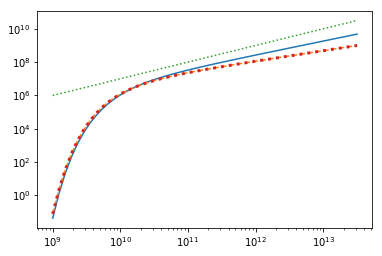

In [102]:
def HI_Hod(mhalo,aa):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(2+2*zz)
    mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    print(alp, np.log10(mcut), np.log10(norm))
    return(mHI)

#                                                                                                                                                                                                                                                                                     
def HI_masscutfiddle(mhalo,aa):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(4+2*zz)
    mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    print(alp, np.log10(mcut), np.log10(norm))
    return(mHI)
    #                                                                                                                                                                                                                                                                                     
#     


mm = np.logspace(9, 13.5)
plt.plot(mm, HI_Hod(mm, 0.3333))
plt.plot(mm, HI_masscutfiddle(mm, 0.3333), '--')
plt.plot(mm, mm/1e3, ':')
plt.plot(mm, HIm(mm), ':', lw=3)

plt.loglog()

In [862]:
(0.91/0.017)**-1/0.91

0.02052892162782273

In [295]:
10**-1.43

0.03715352290971726



Sure, it makes sense to me why we would like to model the infall subhalo mass for HI.
We can then go the self similar way.
Looking at fig 1 of Frank's paper, and the first paragraph of section 2, it seems that the \f~0.02 for us.
However Raul quotes 0.037 in the second paragraph of section 3.2.
They also say that it is independent of redshift, but I find that to be inconsistent with their values of A in the legend of figure 1.
To be conservative, I would rather take the fraction to be 0.0, so M1 = 0.03Mh and make it slightly redshift
dependent so that higher redshifts have more substructure.




# Normalization of satellites

In [863]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 128
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

hpos, hmass, h1mass = {}, {}, {}
cpos, cmass, ch1mass = {}, {}, {}
spos, smass, sh1mass = {}, {}, {}
chid, shid = {}, {}
# halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()

for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    print(zz)
    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    hmass[zz] = halos["Mass"].compute()
    hpos[zz] = halos['Position'].compute()
    
    
dmesh, pkm = {}, {}
start = time()
for iz, zz in enumerate(zzfiles):
    #measure power                                                                                                                                                          
    dmesh[zz] = BigFileMesh(dpath + sim + '/fastpm_%0.4f/'%aafiles[iz] + '/dmesh_N%04d'%nc, '1').paint()
    pk = FFTPower(dmesh[zz]/dmesh[zz].cmean(), mode='1d').power
    k, pkm[zz] = pk['k'], pk['power']



6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [172]:


bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    bias_table.append(np.loadtxt(dpath + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
btable = np.array(bias_table)


In [173]:
# aa = 1/6
# alpha = -0.9
# mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
# mh = np.logspace(9, 13)
# mmax = mh/10.
# mmin = 0.1*mcut + 0*mh

# def mtotsat(m1, mh=mh, mmin=mmin, mmax=mmax, alpha=alpha):
#     mask = mmin > mmax/2
#     mmin[mask] = mmax[mask]/2
#     return -alpha * (mmin/m1)**-alpha * mh**-alpha * (mmax**(alpha + 1) - mmin**(alpha + 1))/(alpha + 1) 

# mtot = mtotsat(mcut)

# plt.plot(mh, mtot/mh)
# plt.xscale('log')

In [174]:
mh = np.logspace(9, 14)
betaf = lambda zz: (1+2*zz)/(2+2*zz)
mcutf = lambda zz : 1e9*( 1.8 + 15*(3/(zz+1))**8 )
normf = lambda zz : 3e5*(1+(3.5/zz)**6)


def nsat(f, mh, alpha, mmin=None, mcut=None):
    if mmin == None and mcut==None:
        print('Give mmnin of satellites')
        return None
    elif mcut is not None: mmin = 0.1*mcut + 0*mh
    return (mmin/f/mh)**alpha - (0.1/f)**alpha


def mtotsat2(f, mh, alpha, mmax=None, mmin=None, mcut=None):
    if mmin == None and mcut==None:
        print('Give mmnin of satellites')
        return None
    elif mcut is not None: mmin = 0.1*mcut + 0*mh
    if mmax is None: mmax = mh/10.

    if type(mh) == np.ndarray:
        mask = mmin > mmax/2
        mmin[mask] = mmax[mask]/2
        return -alpha/(alpha+1)/f**alpha *((mmax/mh)**(alpha + 1) - (mmin/mh)**(alpha + 1))*mh
    else:
        return -alpha/(alpha+1)/f**alpha *((mmax/mh)**(alpha + 1) - (mmin/mh)**(alpha + 1))*mh

    


def mtotsat(f, mh, alpha, mmax=None, mmin=None, mcut=None):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    mmin[mmin > mmax] = mmax[mmin > mmax]


    fac = -alpha/f**alpha/mh**alpha    

    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha )
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret
    

    


def mtotsatHI(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    elif type(mmax) is not np.ndarray:  mmax = mmax*(mh/10.>mmax)
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha + beta - 1)* np.exp(-(mcut/mm)**mcutp)
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret



def mtotsatHIexp(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    elif type(mmax) is not np.ndarray:  mmax = mmax*(mh/10.>mmax)
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha + beta - 1)
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret

def mtotsatHI2(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):

    mh = mh.reshape(-1, 1)
    mmin = 0.1*mcut
    mmax = mh/10.
    #mmin[mmin > mmax] = mmax[mmin > mmax]
    
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    #mmax = mh.reshape(1, -1)/10
    mmaxint = mh.max()/10.
    mm = np.logspace(np.log10(mmin), np.log10(mmaxint), 200).reshape(1, -1)
    mask = mm <= mmax
#     print(mask.sum(axis=-1))
#     print(mask)
    y = (mm**(alpha + beta - 1)* np.exp(-(mcut/mm)**mcutp))*mask
    toret = fac.reshape(1, -1) * simps(y, np.squeeze(mm), axis=1) 
    return toret.flatten()




/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


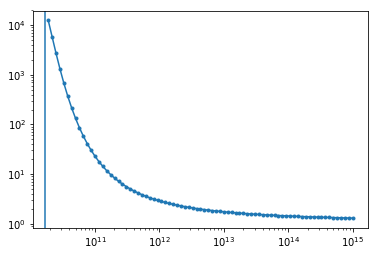

In [175]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 15, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHIexp(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.loglog()
# plt.xscale('log')
plt.axvline(mcut)
# plt.axvline(mcut*10, ls="--")
# plt.axhline(1)
# plt.ylim(0.9, 1.1)
# plt.grid()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/function_base.py:117: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: invalid value encountered in multiply
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


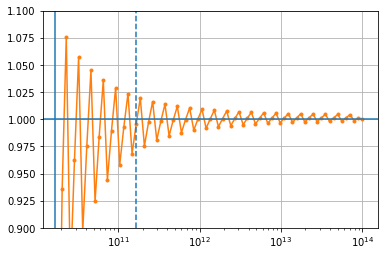

In [176]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 14, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHI(f, mh, mcut, beta, norm, alpha, mmax=mcut)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.plot(mh, mtotsatHI2(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
# plt.loglog()
plt.xscale('log')
plt.axvline(mcut)
plt.axvline(mcut*10, ls="--")
plt.axhline(1)
plt.ylim(0.9, 1.1)
plt.grid()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: invalid value encountered in multiply
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


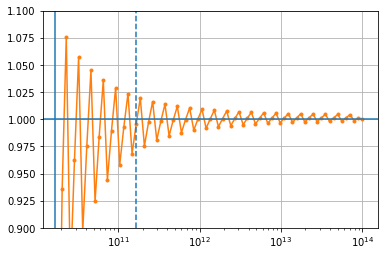

In [177]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 14, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHI(f, mh, mcut, beta, norm, alpha, mmax=mcut)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.plot(mh, mtotsatHI2(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
# plt.loglog()
plt.xscale('log')
plt.axvline(mcut)
plt.axvline(mcut*10, ls="--")
plt.axhline(1)
plt.ylim(0.9, 1.1)
plt.grid()

In [178]:
%timeit mtotsatHI(f, mh, mcut, beta, norm, alpha)
%timeit mtotsatHI2(f, mh, mcut, beta, norm, alpha)

21.6 ms ± 814 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
566 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [180]:
# start = time()
# sathmass = np.zeros_like(hmass[zz])

# index = 0 
# for i in range(shid[zz].size):
#     sathmass[shid[zz][i]] +=  smass[zz][i]
# print(time() - start)

In [181]:

mtotsatHI(f, mh, mcut, beta, norm, alpha)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.61171830e+00, 1.27629499e+01, 4.19890464e+01,
       1.17480283e+02, 2.95173176e+02, 6.80676165e+02, 1.45879304e+03,
       2.93194959e+03, 5.56675015e+03, 1.00469518e+04, 1.73305964e+04,
       2.87090049e+04, 4.58657846e+04, 7.09347828e+04, 1.06556849e+05,
       1.55936156e+05, 2.22897568e+05, 3.11947038e+05, 4.28337325e+05,
       5.78141402e+05, 7.68335918e+05, 1.00689699e+06, 1.30291050e+06,
       1.66669895e+06, 2.10996701e+06, 2.64596776e+06, 3.28969198e+06,
       4.05808261e+06, 4.97027730e+06, 6.04788167e+06, 7.31527665e+06,
      

In [182]:

aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

def nmsat(m, mh, f, alpha):
    return -alpha * m**(alpha-1) / (f*mh)**alpha

def nsattot(mh, f, alpha, mmin, mmax=None):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmax is None: mmax = mh/10.
    if type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 100000)
        y = nmsat(mm, mh[i], f, alpha)
        toret[i] = simps(y, mm)
    toret[np.isnan(toret)] = 0
    return toret


def HIm(mhalo, mcut, beta, A, mcutp=1.0):
    """Returns the 21cm "mass" for a box of halo masses."""
    xx  = mhalo/mcut+1e-10
    mHI = xx**beta * np.exp(-1/xx**mcutp)
    mHI*= A
    return(mHI)



def massweightedsum(mh, mmin, numf, massf):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    mmax = mh/10.
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = numf(mm, mh[i]) * massf(mm)
        toret[i] = np.trapz(y, mm)
    return toret





In [183]:
# # numf = lambda m, mh : -alpha * m**(alpha-1)/(f*mh)**alpha
# numf = lambda m, mh: nmsat(m, mh, f, alpha)
# massf = lambda m : HIm(m, mcut, beta, A)
# tmp = mtotsatHI(f, mh, mcut, beta, A, alpha, )
# tmp2 = massweightedsum(mh, mmin=mcut/10., numf=numf, massf=massf)
# tmp/tmp2

In [184]:

# ff = 0.02
# alpha = -0.9
# mh = np.logspace(9, 13.2)

# for im, mm in enumerate(np.logspace(9, 15, 7)):
#     mtots = []
#     for iz, zz in enumerate(zzfiles):
#         mcut= mcutf(zz)
#         mtot = mtotsat2(0.03, mm, alpha,  mmin=mm/1e4)
#         mtots.append(mtot)
#     plt.plot(zzfiles, np.array(mtots)/mm, 'k')

#     mtots = []
#     for iz, zz in enumerate(zzfiles):
#         mcut= mcutf(zz)
#         mtot = mtotsat(ff*(1+0.3*zz), mm, alpha,  mmin=mm/1e4)
# #         mtot = mtotsat(ff*(1+0.25*zz), mm, alpha,  mmin=mcut*0.1)
#         mtots.append(mtot)
#     plt.plot(zzfiles, np.array(mtots)/mm, 'C%d--'%im, marker='o', lw=3, alpha=0.8, label='Mh=%0.e'%mm)

# # plt.xscale('log')
# plt.legend(ncol=2)
# # plt.ylim(-0.05, 0.3)
# plt.grid()
# plt.xlabel('z')
# plt.ylabel('f_subhalo')


In [185]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d

def getfun(pts, k=2):
    xx = np.array([i[0] for i in pts])
    yy = np.array([i[1] for i in pts])
    args = np.argsort(xx)
    return ius(xx[args], yy[args], k=k)
#     return interp1d(xx[args], yy[args])

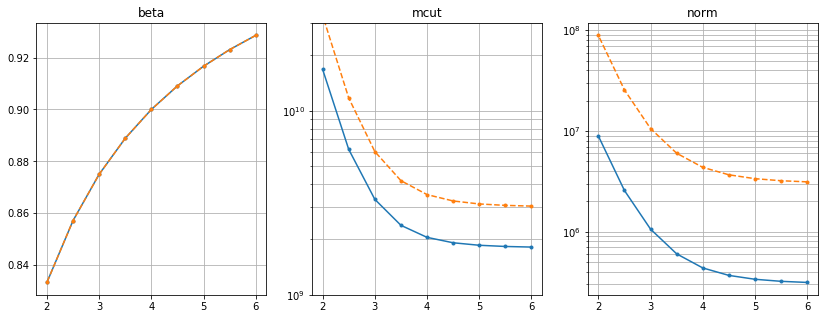

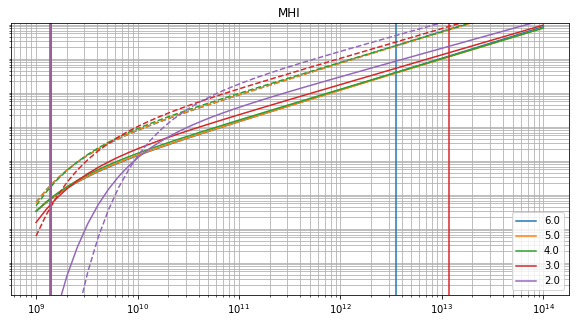

In [218]:

betaf = lambda zz: (1+2*zz)/(2+2*zz)
mcutf = lambda zz : 1e9*( 1.8 + 15*(3/(zz+1))**8 )
normf = lambda zz : 3e5*(1+(3.5/zz)**6)


# betaf2 = lambda zz: (1+3*zz)/(4+3*zz)
# betaf2 = lambda zz: getfun([[6, 0.87], [4, 0.84], [2, 0.75]])(zz)
# betaf2 = lambda zz: betaf(zz)/(1 + 0.3/zz)/1.2
betaf2 = lambda zz: betaf(zz)
# betaf2 = lambda zz: (1+0*zz)

mcutf2 = lambda zz : 3e9*( 1 + 10*(3/(zz+1))**8)
# mcutf2 = lambda zz : getfun([[6, 1e9], [3, 3e9], [4, 2e9], [2, 3e10]], k=3)(zz)
# mcutf2 = lambda zz : 10**9.*(1. + 10*(2.5/(zz+1))**10 )

normf2 = lambda zz : normf(zz)*10

fig, axar = plt.subplots(1,3 , figsize = (14, 5))
ax = axar.flatten()
ax[0].plot(zzfiles, betaf(zzfiles), marker='.')
ax[0].plot(zzfiles, betaf2(zzfiles), '--', marker='.')
ax[0].set_title('beta')
ax[1].plot(zzfiles, mcutf(zzfiles), marker='.')
ax[1].plot(zzfiles, mcutf2(zzfiles), '--', marker='.')
ax[1].set_yscale('log')
ax[1].set_title('mcut')
ax[1].set_ylim(1e9, 3e10)
ax[2].plot(zzfiles, normf(zzfiles), marker='.')
ax[2].plot(zzfiles, normf2(zzfiles), '--', marker='.')
ax[2].set_yscale('log')
ax[2].set_title('norm')
for axis in axar.flatten(): axis.grid(which='both')
plt.show()

plt.figure(figsize = (10, 5))
for iz, zz in enumerate(zzfiles[::2]): 
    plt.plot(mh, HIm(mh, mcutf(zz), betaf(zz), normf(zz) ), 'C%d'%iz, label=zz)
    plt.plot(mh, HIm(mh, mcutf2(zz), betaf2(zz), normf2(zz) ), 'C%d--'%iz)
    plt.axvline(btable[iz, 1][-1], color='C%d'%iz)
    plt.axvline(btable[iz, 1][0], color='C%d'%iz)
plt.grid(which='both')
plt.loglog('log')
plt.ylim(1e2, 1e10)
plt.title('MHI')
plt.legend()
plt.show()

Constraints
- match Paco-Ema plot of HI
- DM mass fraction in satellites <20%
- HI_halo >= HI_cen + HI_sat
- get bias=2 at z=2, and relatively flat

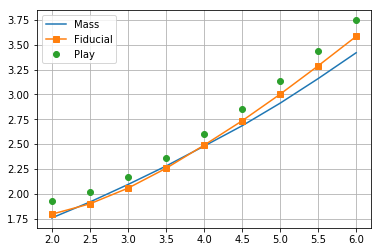

In [213]:
bmass = [((btable[i, 5]*btable[i, 1]*btable[i, 2]).sum()/(btable[i, 1]*btable[i, 2]).sum()) for i in range(9)]

bmh1f, bmh1 = [], []
for iz, zz in enumerate(zzfiles[:]):
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1.append(num/den)

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1f.append(num/den)

    
plt.plot(zzfiles, bmass, label='Mass')
plt.plot(zzfiles, bmh1f, marker='s', label='Fiducial')
plt.plot(zzfiles, bmh1, 'o', label='Play')
plt.grid()
plt.legend()

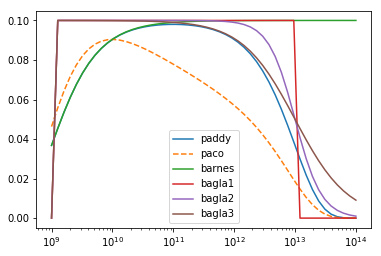

In [214]:

def paddy(m, mlow=1e9, mhigh=1e13, f=0.1, alpha=1):
    return f*m**alpha * np.exp(-mlow/m)*np.exp(-m/mhigh)

def bagla1(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*(m<mhigh)

def bagla2(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*1/(1+ (m/mhigh)**2)

def bagla3(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*1/(1+ m/mhigh)

def paco(m, alpha=1, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m **alpha*np.exp(-mlow/m)

plt.plot(mh, paddy(mh)/mh, label='paddy')
plt.plot(mh, paddy(mh, alpha=0.9, f=1)/mh, '--', label='paco')
plt.plot(mh, paddy(mh, mhigh=1e20)/mh, label='barnes')
plt.plot(mh, bagla1(mh)/mh, label='bagla1')
plt.plot(mh, bagla2(mh)/mh, label='bagla2')
plt.plot(mh, bagla3(mh)/mh, label='bagla3')
# plt.plot(mh, HIm(mh)/mh, label='bagla3')
plt.xscale('log')
plt.legend()

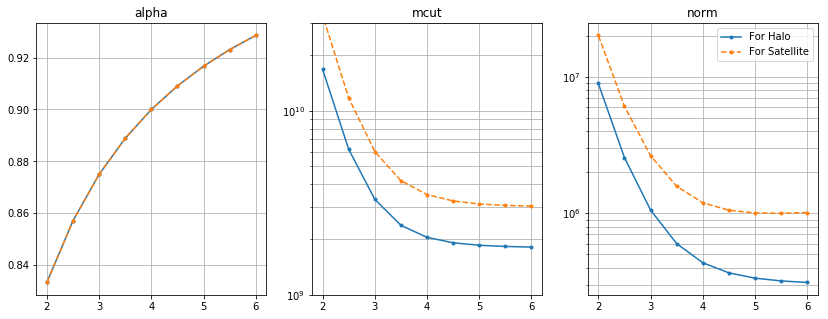

In [220]:
# betaf2 = lambda zz: betaf(zz)*0 + 1
# mcutf2 = lambda zz : mcutf(zz)/(1 + 0.2*zz)
betaf2 = lambda zz: betaf(zz)
mcutf2 = lambda zz : 3e9*( 1 + 10*(3/(zz+1))**8)
normf2 = lambda zz : normf(zz)*(1.75 + 0.25*zz)

fig, axar = plt.subplots(1,3 , figsize = (14, 5))
ax = axar.flatten()
ax[0].plot(zzfiles, betaf(zzfiles), marker='.')
ax[0].plot(zzfiles, betaf2(zzfiles), '--', marker='.')
ax[0].set_title('alpha')
ax[1].plot(zzfiles, mcutf(zzfiles), marker='.')
ax[1].plot(zzfiles, mcutf2(zzfiles), '--', marker='.')
ax[1].set_yscale('log')
ax[1].set_title('mcut')
ax[1].set_ylim(1e9, 3e10)
ax[2].plot(zzfiles, normf(zzfiles), marker='.', label='For Halo')
ax[2].plot(zzfiles, normf2(zzfiles), '--', marker='.', label='For Satellite')
ax[2].set_yscale('log')
ax[2].set_title('norm')
plt.legend()
for axis in axar.flatten(): axis.grid(which='both')
plt.show()


In [221]:
# for iz, zz in enumerate(zzfiles):
#     beta = betaf(zz)
#     mcut = mcutf(zz)
#     norm = normf(zz)
#     tmp = HIm(mh, mcut, beta, norm)
# #     plt.plot(mh, HIm(mh, mcut, beta, norm), 'C%d:'%iz)
    
#     beta2 = betaf2(zz)
#     mcut2 = mcutf2(zz)
#     norm2 = normf2(zz)
#     tmp2 = paddy(mh, mlow=mcut2, mhigh=1e12, f=0.0005)
#     plt.plot(mh, tmp2/tmp, label=zz)
# #     plt.plot(mh, HIm(mh, mcut2, beta2, norm2), 'C%d--'%iz)
# #     plt.plot(mh, paddy(mh, mlow=mcut2, mhigh=1e12, f=0.0005),  'C%d'%iz)
    
# plt.xscale('log')
# plt.ylim(0, 10)
# plt.legend()

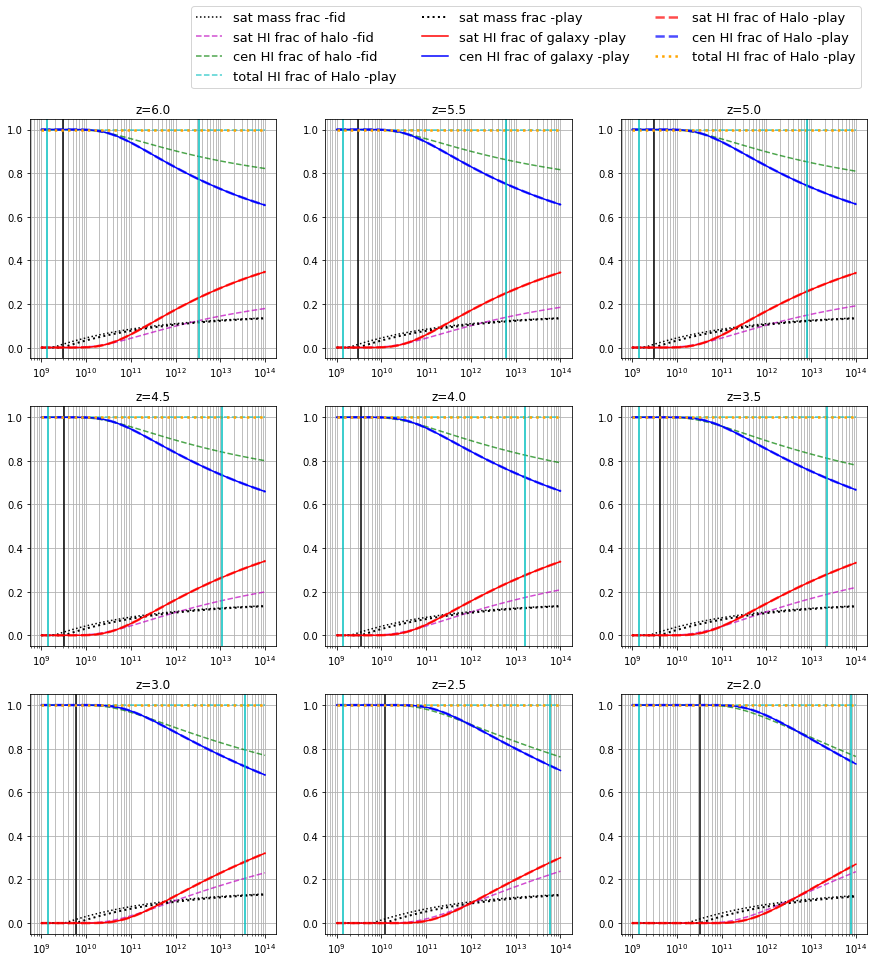

In [222]:

fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# fig2, ax2 = plt.subplots()

f = 0.03
alpha = -0.8
mh = np.logspace(9, 14)

for iz, zz in enumerate(zzfiles[::]):

    axis = ax.flatten()[iz]
    aa = 1/(zz+1)

    beta = betaf(zz)
    mcut = mcutf(zz)
    norm = normf(zz)
    numf = lambda m, mm: nmsat(m, mm, f, alpha)
    mtot = massweightedsum(mh, mmin=mcut/10., numf=numf, massf= lambda m: m)
#     mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
#     mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
    mHIcen = mHIhalo - mHIsat
    
    axis.plot(mh, mtot/mh, 'k:', lw=1.5, label='sat mass frac -fid')
#     axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'm', lw=1.2, label='sat HI frac of galaxy -fid')
#     axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'g', lw=1.2, label='cen HI frac of galaxy -fid')
    axis.plot(mh, mHIsat/mHIhalo, 'm--', lw=1.5, alpha=0.7, label='sat HI frac of halo -fid')
    axis.plot(mh, mHIcen/mHIhalo, 'g--', lw=1.5, alpha=0.7, label='cen HI frac of halo -fid')
    axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'c--', lw=1.5, alpha=0.7, label='total HI frac of Halo -play')
    
    
    ##
    beta2 = betaf2(zz)
    mcut2 = mcutf2(zz)
    norm2 = normf2(zz)
    axis.axvline(mcut2, color='k')
    
    numf = lambda m, mm: nmsat(m, mm, f, alpha)
    mtot = massweightedsum(mh, mmin=mcut2/10., numf=numf, massf= lambda m: m)
    massfhsat = lambda m: HIm(m, mcut2, beta2, norm2)
#     massfhcen = lambda m: HIm(m, mcut, beta, norm)
#     massfhsat = lambda m: paddy(m, mlow=mcut2, mhigh=1e14, f=0.01, alpha=beta2)
#     massfhcen = lambda m: paddy(m, mlow=mcut, mhigh=1e14, f=0.0009, alpha=beta)
    
    mHIsat = massweightedsum(mh, mmin=mcut2/10., numf=numf, massf=massfhsat)
    mtmp = mtotsatHI(f, mh, mcut2, beta2, norm2, alpha)  
#     mHIcen = massfhcen(mh-mtot)
#     mHIcen = mHIhalo - mHIsat
    mHIcen = mHIhalo - mtmp
    
    axis.plot(mh, mtot/mh, 'k:', lw=2, label='sat mass frac -play')
    axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'r', lw=1.5, label='sat HI frac of galaxy -play')
    axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'b', lw=1.5, label='cen HI frac of galaxy -play')
    axis.plot(mh, mHIsat/mHIhalo, 'r--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, mHIcen/mHIhalo, 'b--', lw=2.5, alpha=0.7, label='cen HI frac of Halo -play')
    axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'orange', ls=":", lw=2.5, alpha=1, label='total HI frac of Halo -play')
    
    axis.set_xscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')
    axis.grid(which='both')

    

ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
# ax2.loglog()


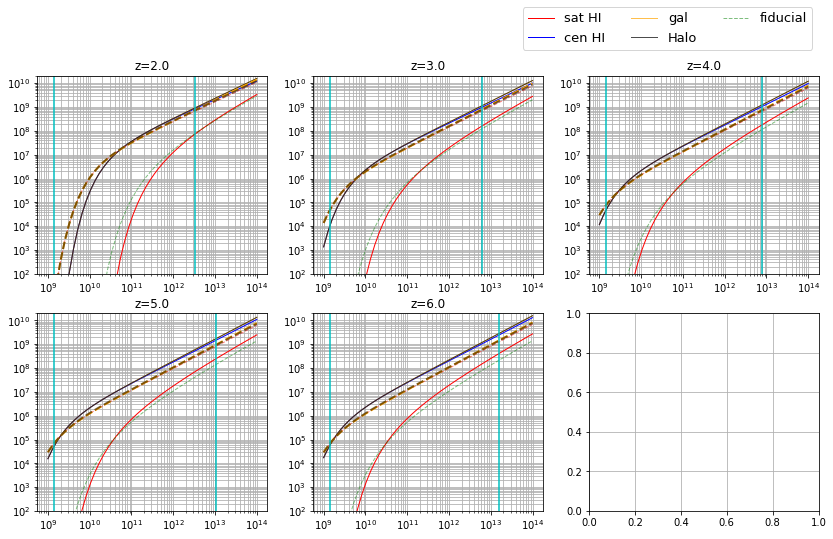

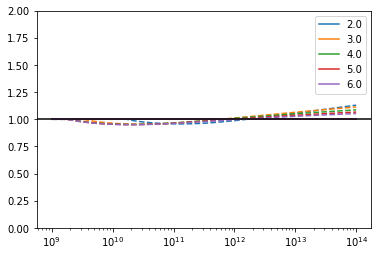

In [223]:

fig, ax = plt.subplots(2, 3, figsize = (14, 8))
fig2, ax2 = plt.subplots()

for iz, zz in enumerate(zzfiles[::2][::-1]):
    aa = 1/(zz+1)
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)

    axis = ax.flatten()[iz]

    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
    mHIcen = mHIhalo - mHIsat

    axis.plot(mh, mHIsat, 'r', lw=1, label='sat HI')
    axis.plot(mh, mHIcen, 'b', lw=1, label='cen HI')
    axis.plot(mh, mHIsat+mHIcen, 'orange', lw=1, alpha=0.7, label='gal')
    axis.plot(mh, mHIhalo, 'k', lw=1, alpha=0.7, label='Halo')
    ax2.plot(mh, (mHIsat+mHIcen)/mHIhalo, 'C%d'%iz, label=zz)
    
    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)


    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
#     mHIcen = mHIhalo - mHIsat

    axis.plot(mh, mHIsat, 'g--', lw=1, alpha=0.5, label='fiducial')
    axis.plot(mh, mHIcen, 'r--', lw=1, alpha=0.5)
    axis.plot(mh, mHIsat+mHIcen, 'orange', ls="--", lw=2, label='')
    axis.plot(mh, mHIhalo, 'k--', lw=2, alpha=0.5)
    ax2.plot(mh, (mHIsat+mHIcen)/mHIhalo, 'C%d--'%iz)

    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.set_ylim(1e2, 2e10)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')

for axis in ax.flatten(): axis.grid(which='both')
ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
ax2.set_xscale('log')
ax2.legend()
ax2.set_ylim(0, 2)
ax2.axhline(1, color='k')

6.0


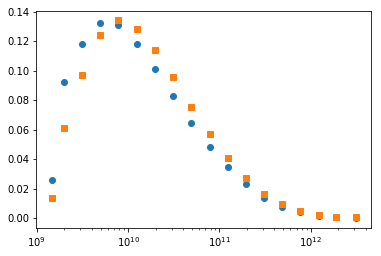

In [239]:
ii = 0
zz = zzfiles[ii]
print('%0.1f'%zz)

tmp = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/HI_dist_%0.4f.txt'%aafiles[ii]).T
h1 = HIm(tmp[0], mcutf(zz), betaf(zz), normf(zz))*tmp[1]
plt.plot(tmp[0], h1/h1.sum(), 'o')
plt.plot(tmp[0], tmp[1]*tmp[2]/(tmp[1]*tmp[2]).sum(), 's')
plt.xscale('log')

In [252]:
h1[mask]/h1.sum()

array([0.02598179, 0.09239563, 0.11820958, 0.13217198, 0.13073555,
       0.11800793, 0.10108927, 0.08287459, 0.06448291, 0.04835546,
       0.03454419, 0.0229733 , 0.0137563 , 0.00784781, 0.0038974 ,
       0.00158423, 0.00068184, 0.00041025])

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


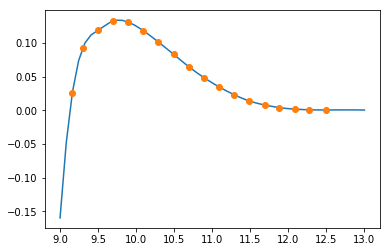

In [258]:
mask = tmp[1]!=0
ih1frac = ius(np.log10(tmp[0][mask]), h1[mask]/h1.sum())
xx = np.linspace(9, 13)
plt.plot(xx, ih1frac(xx))
plt.plot(np.log10(tmp[0]), h1/h1.sum(), 'o')


In [ ]:
# # pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])

# # bias = []
# # biasf = []
# # biasm = []
# # for iz, zz in enumerate(zzfiles[:]):
# #     print(zz)
# #     beta = betaf2(zz)
# #     mcut= mcutf2(zz)
# #     norm= normf2(zz)
# #     h1mass = HIm(hmass[zz], mcut=mcut, beta=beta, A=norm)
# #     h1mesh = pm.paint(hpos[zz], mass=h1mass)
# #     pkh = FFTPower(h1mesh/h1mesh.cmean(), mode='1d').power['power']
# #     bias.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())
    
# #     hmesh = pm.paint(hpos[zz], mass=hmass[zz])
# #     pkh = FFTPower(hmesh/hmesh.cmean(), mode='1d').power['power']
# #     biasm.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())
    
# #     beta = betaf(zz)
# #     mcut= mcutf(zz)
# #     norm= normf(zz)
# #     h1mass = HIm(hmass[zz], mcut=mcut, beta=beta, A=norm)
# #     h1mesh = pm.paint(hpos[zz], mass=h1mass)
# #     pkh = FFTPower(h1mesh/h1mesh.cmean(), mode='1d').power['power']
# #     biasf.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())


# plt.plot(zzfiles, biasm, marker='o')
# plt.plot(zzfiles, bias, 'o', ms=8)
# plt.plot(zzfiles, biasf, 's', alpha=0.5)
# plt.grid()

## Get bias

In [60]:



project = '/project/projectdirs/m3127/H1mass/'
bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

bias_int = []
bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    pkm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkm.txt'%aa)[:, 1]
    pkhp = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhpos.txt'%aa)[:, 1]
    pkhm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmass.txt'%aa)[:, 1]
    pkhmx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmassxm.txt'%aa)[:, 1]
    pkhpx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhposxm.txt'%aa)[:, 1]
    biases = [(pkhm[1:n]/pkm[1:n]).mean()**0.5, (pkhp[1:n]/pkm[1:n]).mean()**0.5, (pkhmx[1:n]/pkm[1:n]).mean(), (pkhpx[1:n]/pkm[1:n]).mean()]
    bias_int.append(biases)
    bias_table.append(np.loadtxt(project + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
bias_int = np.array(bias_int)
bias_table = np.array(bias_table)

# bias_large = []
# for iz, zz in enumerate(zzfiles):
#     aa = aafiles[iz]
#     pkm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkm.txt'%aa)[:, 1]
#     pkhp = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhpos.txt'%aa)[:, 1]
#     pkhm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmass.txt'%aa)[:, 1]
#     pkhmx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmassxm.txt'%aa)[:, 1]
#     pkhpx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhposxm.txt'%aa)[:, 1]
#     biases = [(pkhm[1:n]/pkm[1:n]).mean()**0.5, (pkhp[1:n]/pkm[1:n]).mean()**0.5, (pkhmx[1:n]/pkm[1:n]).mean(), (pkhpx[1:n]/pkm[1:n]).mean()]
#     bias_int.append(biases)
#     bias_table.append(np.loadtxt(project + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)


In [61]:
from scipy.integrate import simps

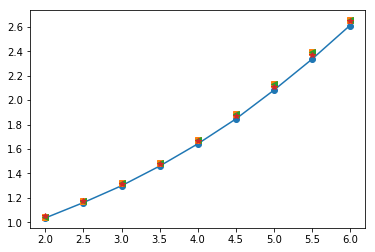

In [62]:
i = 1
ib = 4
def biashodfun(b, numwt, numx, denwt=None, denx=None):
    if denwt is None: denwt = numwt
    if denx is None: denx = numx
    return simps(b*numwt, numx) / simps(denwt, denx)

bt = bias_table

biashod = np.array([biashodfun(bt[j, ib], bt[j,2]/bt[j,0], bt[j, 0]) for j in range(zzfiles.size)])
biashod2 = np.array([biashodfun(bt[j, ib], bt[j, 2], np.log(bt[j, 0])) for j in range(zzfiles.size)])
biassum = np.array([(bt[j,ib]*bt[j,2]).sum()/(bt[j,2]).sum() for j in range(zzfiles.size)])

plt.plot(zzfiles, bias_int[:, i], marker='o')
plt.plot(zzfiles, biashod, 's')
plt.plot(zzfiles, biashod2, '<')
plt.plot(zzfiles, biassum, '*')


In [122]:
i = 2
ib = 5
def biashodfun(b, numwt, numx, denwt=None, denx=None):
    if denwt is None: denwt = numwt
    if denx is None: denx = numx
    return simps(b*numwt, numx) / simps(denwt, denx)

bt = bias_table.copy()
biashod = np.array([biashodfun(bt[j, ib], bt[j, 2]*bt[j,1]**1, np.log10(bt[j, 0])) for j in range(zzfiles.size)])
biashod2 = np.array([biashodfun(bt[j, ib], bt[j, 2], np.log(bt[j, 0])) for j in range(zzfiles.size)])
# biashod3 = np.array([biashodfun(bt[j, ib], bt[j, 2]**1*bt[j,1], (bt[j, 0])) for j in range(zzfiles.size)])
biassum = np.array([(bt[j,ib]*bt[j,2]*bt[j,1]).sum()/(bt[j,2]*bt[j,1]).sum() for j in range(zzfiles.size)])
biassum2 = np.array([(bt[j,ib]*bt[j,2]*bt[j,1]**2).sum()/(bt[j,2]*bt[j,1]**2).sum() for j in range(zzfiles.size)])

plt.plot(zzfiles, bias_int[:, i], marker='o')
plt.plot(zzfiles, biashod, 's')
plt.plot(zzfiles, biashod2, '<')
# plt.plot(zzfiles, biashod3, '>')
plt.plot(zzfiles, biassum, '*')
# plt.plot(zzfiles, biassum2, marker='*')
# plt.plot(zzfiles, np.stack((biashod , biassum), axis=1).mean(axis=1), '*')
plt.grid()

NameError: name 'bias_table' is not defined

Text(0.5, 0, 'z')

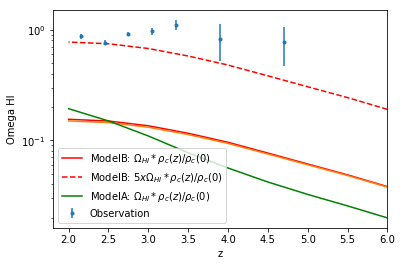

## power law + exponential cutoff

In [24]:
from scipy.interpolate import RectBivariateSpline as rbspline
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.integrate import simps

In [16]:
np.meshgrid(paramtablem0, paramtablezz)[0].shape, paramtabler0.shape

((6, 5), (6, 5))

In [17]:
paramtabler0 = []
paramtabler0.append([nan, -3.59, -2.8, -2.32, -1.71, -1.91])
# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0.append([nan, -3.72, -3.3, -2.32, -1.77, nan])
paramtabler0.append([nan, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0.append([-3.63, -3.1, -2.52, -2.09, nan, nan])
paramtabler0.append([-3.3, -2.46, -2.32, -2.04, nan, nan])
paramtabler0.append([-2.9, -2.28, -2.18, -2.02, nan, nan])
paramtabler0 = np.array(paramtabler0)
# paramtabler0 = paramtabler0[:-1]
paramtabler0 = paramtabler0[:, :-1]
# 
paramtablezz = np.array([0, 1, 2, 3, 4, 5])
paramtablem0 = np.array([9, 10, 11, 12, 13])
coordinates = np.array([(x,y) for x in paramtablezz for y in paramtablem0 ])
vals = paramtabler0.flatten()
mask = np.isnan(vals)

# r0spline = griddata(coordinates[~mask], vals[~mask], (4, 11), )
ir0pow = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], vals[~mask], kind='linear')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=0.002083 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [18]:
# plt.plot(paramtablem0, paramtabler0[5], 'o')
# plt.plot(paramtablezz, paramtabler0[:, 0], 'o')

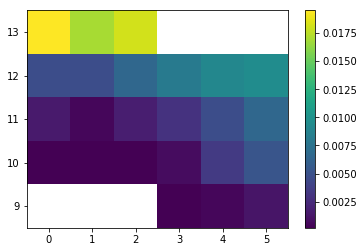

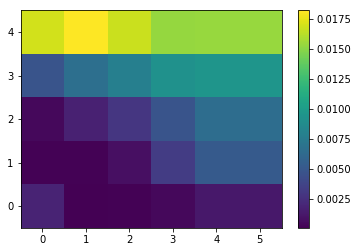

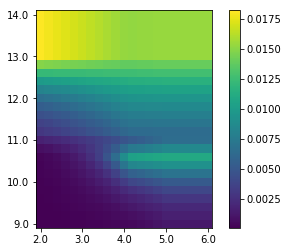

In [19]:
plt.imshow(10**paramtabler0.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(10**ir0pow(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower')
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(10**ir0pow(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

In [280]:

cosmo.scale_independent_growth_rate?

Docstring:
Background.scale_independent_growth_rate(self, z)

The scale invariant growth rate :math:`d\mathrm{ln}D/d\mathrm{ln}a` for
CDM perturbations.

This is the quantity defined by CLASS as ``index_bg_f`` in the
background module.
Type:      builtin_function_or_method


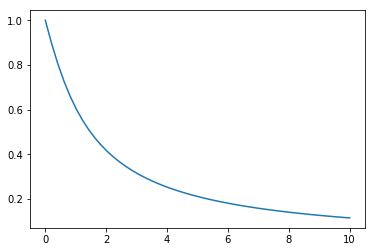

In [279]:
# plt.plot(np.linspace(0, 10), cosmo.scale_independent_growth_rate(np.linspace(0, 10)))
plt.plot(np.linspace(0, 10), cosmo.scale_independent_growth_factor(np.linspace(0, 10)))

In [3]:
def getrvir(m, z):
    '''https://halotools.readthedocs.io/en/latest/_modules/halotools/empirical_models/phase_space_models/analytic_models/halo_boundary_functions.html
    '''
#     rho_crit = 3 * 100**2 /(8 * math.pi * 43.007)
#     rho_crit *= 1e10 / cosmo.h**2
    rho_crit = cosmo.rho_crit(z)
    x = cosmo.Om(z) - 1.0
    delta = 18 * np.pi**2 + 82.0 * x - 39.0 * x**2
    rho = rho_crit * delta *1e10
    radius = (m * 3.0 / 4.0 / np.pi / rho)**(1.0 / 3.0)
    return radius *(1+z)
    
def nfw(r, m, z, c=7):
    rvir = getrvir(m, z)
    Rs = rvir/c
    mfac = 4*np.pi*Rs**3 *(np.log(1+c) - c/(1+c))
    rho0 = m/mfac
    r += 1e-5
    den = (r/Rs) * (1 + r/Rs)**2
    return rho0/den
#     return 1/den


def h1rhopowerlaw(r, m, z):
    alpha = 3
    r0 = ir0pow(z, np.log10(m))
    r0 = 10**r0
    rho = 1/(r+1e-5)**alpha * np.exp(-r0/(r+1e-5))
    return rho

def masspowlawexp(r, m, z, rho0=1):
    rho = rho0*h1rhopowerlaw(r, m, z)
#     scatter = np.random.normal(0, 0.1*np.log10(rho))
#     sample = rho + 10**abs(scatter)*np.sign(scatter)
    sample= rho #+ np.random.normal(0, 0.1*rho)
    n = nfw(r, m, z)
    return sample /n




No handles with labels found to put in legend.


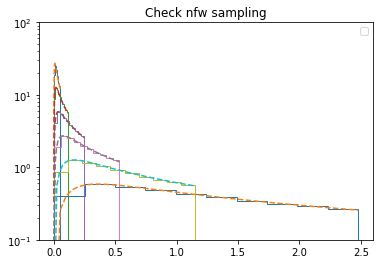

0.9995058388620428

In [131]:
zz = 3
for mm in np.logspace(10, 15, 6):
    rr = hod.sampleilogcdf(100000, hod.ilogcdfnfw())  
    rvir = getrvir(mm, zz)
    rr *= rvir
    plt.hist(rr, bins=10, histtype='step', density=True)
    rr = np.linspace(1e-4, rvir)
    nn = nfw(rr, mm, zz)
    plt.plot(rr, rr**2 * nn/np.trapz(rr**2 * nn, rr), '--')
#     print(rr[np.argmax(nfw(rr, mm, zz).max())])
#     plt.plot(rr, h1rhopowerlaw(rr, mm, zz), '.')
    
# plt.loglog()
plt.yscale('log')
plt.legend()
plt.ylim(1e-1, 1e2)
plt.title('Check nfw sampling')
plt.show()


mm = 1e13
rr = np.linspace(0, getrvir(mm, zz))
simps(4*np.pi*rr**2 *nfw(rr, mm, zz), rr)/mm

Text(0.5, 1.0, 'Check virial radius')

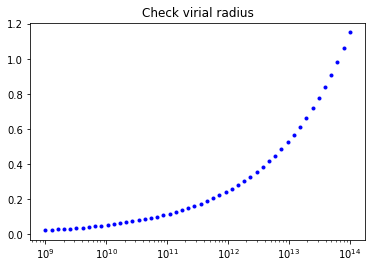

In [128]:
mh = np.logspace(9, 14)
for mm in mh:
    rvir = getrvir(mm, zz)
    plt.plot(mm, rvir, 'b.')
plt.xscale('log')
plt.title('Check virial radius')

Text(0.5, 1.0, 'Fraction outside 0.1rvir')

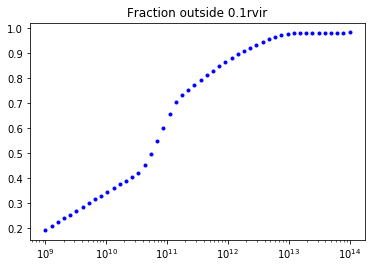

In [129]:
zz = 2
for mm in mh:
    rvir = getrvir(mm, zz)
    rr = np.linspace(0, rvir, 1000)
    rr1 = np.linspace(0.01, rvir, 1000)
#     rr1 = rr[100:]
    rhoh1all = h1rhopowerlaw(rr, mm, zz)
    rhoh1sat = h1rhopowerlaw(rr1, mm, zz)
    frac = simps(4*pi*rr1**2*rhoh1sat, rr1)/simps(4*pi*rr**2*rhoh1all, rr)
    plt.plot(mm, frac, 'b.')
plt.xscale('log')
plt.title('Fraction outside 0.1rvir')


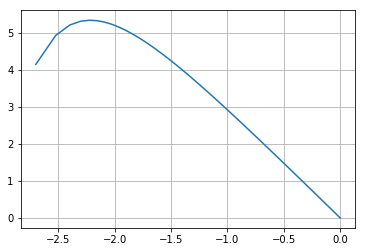

In [132]:
rho0 = 1e10
rr = np.linspace(10**-2.7, 1, 1000)
# plt.plot(rr, h1rho(rr, 1e13, 2, rho0=rho0))
plt.plot(np.log10(rr), np.log10(h1rhopowerlaw(rr, 1e13, 2)))
plt.grid()

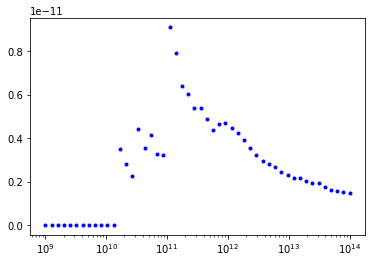

In [134]:
zz = 3
msat = []
nss = []
rhos = []
for m in mh:
    mcut = mcutf(zz)
    beta=betaf(zz)
    norm = normf(zz)

    #Halo properties
    mh1 = HIm(m, mcut, beta, A=norm)
    rvir = getrvir(m, zz)

    #normalization
    rr = np.linspace(0, rvir, 1000)
    h1 = 4*np.pi*rr**2 * h1rhopowerlaw(rr, m, zz)
    mh1unnorm = np.trapz(h1, rr)
    rho0 = mh1/mh1unnorm

    rhos.append(rho0)
    #sample satellites
    ns = int(nsattot(m, f=0.03, alpha=-0.8, mmin=mcut/10.))# int(nsat(f, m, alpha, mcut=mcut))
    nss.append(ns)
    sampling = []
    nsample = 10
    for i in range(nsample):
        rr = hod.sampleilogcdf(ns, hod.ilogcdfnfw())
        rr *= rvir
        msats = rho0*masspowlawexp(rr, m, zz)
        sampling.append(msats)
    msats = [i.sum() for i in sampling][0]/nsample
    #
    msat.append(msats)
    plt.plot(m, msats.sum()/mh1, 'b.')
plt.xscale('log')

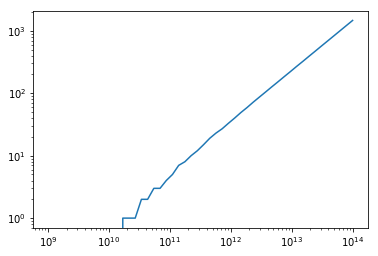

In [136]:
plt.plot(mh,  nss)
plt.yscale('log')
plt.xscale('log')

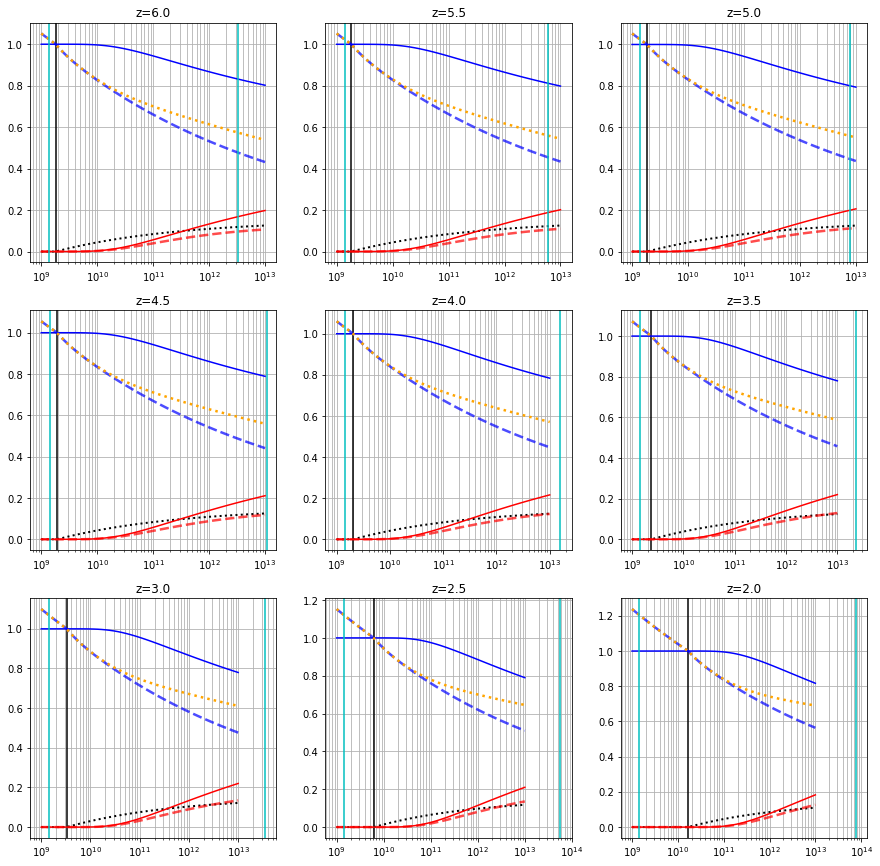

In [443]:


fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# fig2, ax2 = plt.subplots()

f = 0.03
alpha = -0.8
mh = np.logspace(9, 13)

for iz, zz in enumerate(zzfiles[::]):

    axis = ax.flatten()[iz]
    aa = 1/(zz+1)

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
 
    
    ##
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)
    axis.axvline(mcut, color='k')
    
    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
#     mHIcen = mHIhalo - mHIsat

    
    axis.plot(mh, mtot/mh, 'k:', lw=2, label='sat mass frac -play')
    axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'r', lw=1.5, label='sat HI frac of galaxy -play')
    axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'b', lw=1.5, label='cen HI frac of galaxy -play')
    axis.plot(mh, mHIsat/mHIhalo, 'r--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, mHIcen/mHIhalo, 'b--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'orange', ls=":", lw=2.5, alpha=1, label='total HI frac of Halo -play')
    
    axis.set_xscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')
    axis.grid(which='both')

    

# ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
# ax2.loglog()


## Modified nfw

In [808]:
# 
paramtablezz = np.array([0, 1, 2, 3, 4, 5])
paramtablem0 = np.array([9, 10, 11, 12, 13])
coordinates = np.array([(x,y) for x in paramtablezz for y in paramtablem0 ])


paramtabler0n = []
paramtabler0n.append([nan, -3.8, -3.4, -3.1, -1.8, -2.6])
# paramtabler0n.append([nan, -3.8, nan, -3.1, -1.8, -2.6])

# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0n.append([nan, -3.7, -3.6, -2.9, -2.4, nan])
paramtabler0n.append([nan, -3.5, -3.3, -2.6, -3.0, nan])

paramtabler0n.append([-3.5, -3.3, -3.0, -2.4, nan, nan])
paramtabler0n.append([-3.2, -3.0, -2.7, -2.4, nan, nan])
paramtabler0n.append([-3.1, -3.1, -3.3, -3.1, nan, nan])
paramtabler0n = np.array(paramtabler0n)
paramtabler0n = paramtabler0n[:, :-1]


vals = paramtabler0n.flatten()
mask = np.isnan(vals)
ir0nfw = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], 10**vals[~mask], kind='linear')


paramtablers = []
paramtablers.append([nan, -4., -3.7, -3.2, -3.0, -2.3])
# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtablers.append([nan, -4.0, -3.9, -3.0, -2.2, nan])
paramtablers.append([nan, -3.8, -3.6, -2.8, -1.8, nan])
paramtablers.append([-3.8, -3.6, -3.3, -2.8, nan, nan])
paramtablers.append([-3.6, -3.2, -2.9, -2.6, nan, nan])
paramtablers.append([-3.4, -2.7, -2.5, -2.2, nan, nan])
paramtablers = np.array(paramtablers)
# paramtabler0 = paramtabler0[:-1]
paramtablers = paramtablers[:, :-1]

vals = paramtablers.flatten()
mask = np.isnan(vals)
irsnfw = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], vals[~mask], kind='linear')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,8 m=24 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=0.009828 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


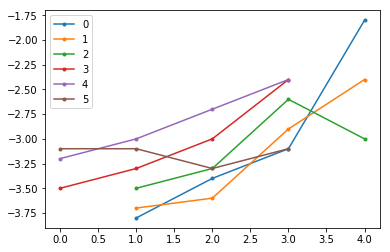

In [822]:
for i in range(6):
    plt.plot(paramtabler0n[i], marker='.', label=paramtablezz[i])
plt.legend()
# for i in range(5):
#     plt.plot(paramtabler0n.T[i], marker='.', label=paramtablem0[i])
# plt.legend()

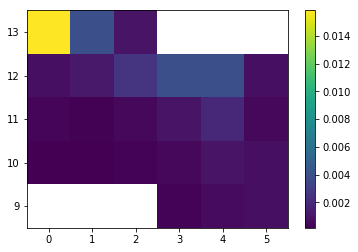

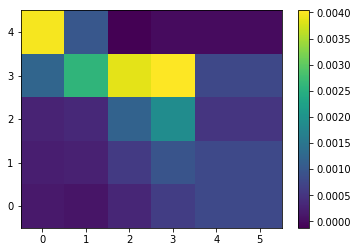

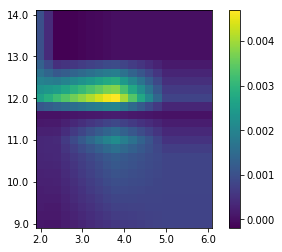

In [823]:
plt.imshow(10**paramtabler0n.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(ir0nfw(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower',)
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(ir0nfw(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

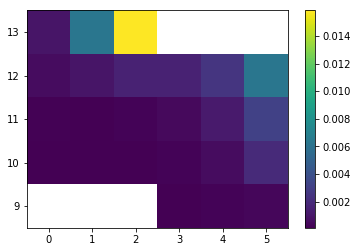

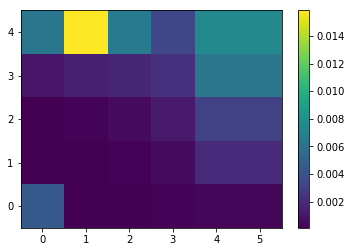

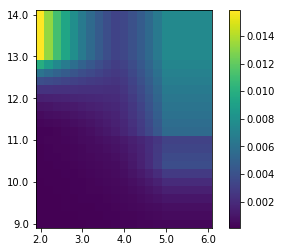

In [796]:
plt.imshow(10**paramtablers.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(10**irsnfw(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower')
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(10**irsnfw(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

## Velocity dispersion

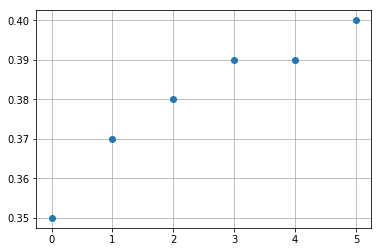

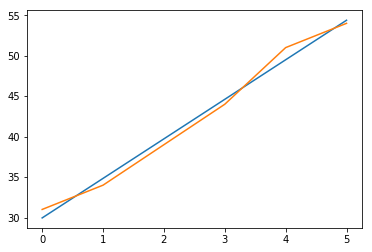

In [135]:
vdisp = np.array([31, 34, 39, 44, 51, 54])
vdispal = np.array([0.35, 0.37, 0.38, 0.39, 0.39, 0.40])
vdispz = np.arange(0, 6)
# plt.plot(vdispz, vdisp, 'o')
plt.plot(vdispz, vdispal, 'o')
plt.grid()
plt.show()

slope, intercept = np.polyfit(vdispz, vdisp, 1)
plt.plot(vdispz, slope*vdispz + intercept)
plt.plot(vdispz, vdisp)
plt.show()

Text(0, 0.5, 'Velocity dispersion')

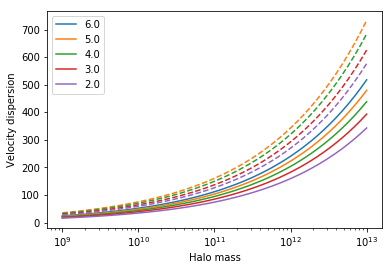

In [408]:
for iz, zz in enumerate(zzfiles[::2]):
    plt.plot(mh, 1100*(cosmo.efunc(zz)*mh/1e15)**0.333, 'C%d'%iz, label=zz)

paconorm = {2.0:59, 3.0:64, 4.0:70, 5.0:75}
for iz, zz in enumerate(zzfiles[::2]):
    try: plt.plot(mh, paconorm[zz]*(mh/1e10)**0.33, 'C%d--'%iz)
    except:pass

plt.legend()
plt.xscale('log')
plt.xlabel('Halo mass')
plt.ylabel('Velocity dispersion')
# plt.plot(mh, 1000*(0.70*mh/1e15)**0.33/(50*(mh/1e10)**0.33))
# plt.xscale('log')

#  Moster + Dave

In [7]:
import hodanalytics as hodanals

[]

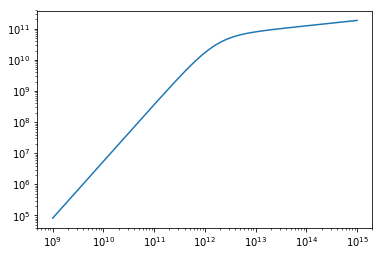

In [8]:
def moster(Mhalo,z,h=0.6776, scatter=None):
    """                                                                                                                                                                                                                                                                                   
    moster(Minf,z):                                                                                                                                                                                                                                                                       
    Returns the stellar mass (M*/h) given Minf and z from Table 1 and                                                                                                                                                                                                                       
    Eq. (2,11-14) of Moster++13 [1205.5807].                                                                                                                                                                                                                                              
    This version now works in terms of Msun/h units,
    convert to Msun units in the function
    To get "true" stellar mass, add 0.15 dex of lognormal scatter.                                                                                                                                                                                                                        
    To get "observed" stellar mass, add between 0.1-0.45 dex extra scatter.                                                                                                                                                                                                               
    """
    Minf = Mhalo/h
    zzp1  = z/(1+z)
    M1    = 10.0**(11.590+1.195*zzp1)
    mM    = 0.0351 - 0.0247*zzp1
    beta  = 1.376  - 0.826*zzp1
    gamma = 0.608  + 0.329*zzp1
    Mstar = 2*mM/( (Minf/M1)**(-beta) + (Minf/M1)**gamma )
    Mstar*= Minf
    if scatter is not None: 
        Mstar = 10**(np.log10(Mstar) + np.random.normal(0, scatter, Mstar.size))
    return Mstar*h
    #                                                                                                                                                                                                                                                                                     

    
mh = np.logspace(9, 15)
plt.plot(mh, moster(mh, 2))
plt.loglog()

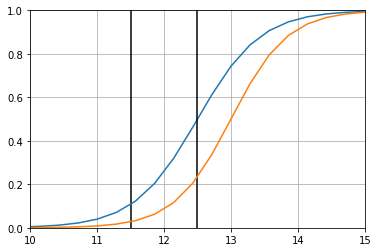

In [9]:
xx = np.linspace(1, 15)

ms = 8.5
msub = ms + 3
plt.axvline(msub, color='k')
# plt.plot(xx, np.exp((1-15/xx )*(msub**0.5 * 2)))
# plt.plot(xx, np.exp((1-15/xx )*(msub**0.5 * 2)))
mmid = 13 + (ms-9.5)/2
mscale = ms/4.
plt.plot(xx, 1/(1+np.exp(-mscale*(xx-mmid))))

ms = 9.5
msub = ms + 3
plt.axvline(msub, color='k')
mmid = 13 + (ms-9.5)/2
mscale = ms/4.
plt.plot(xx, 1/(1+np.exp(-mscale*(xx-mmid))))
# plt.plot(xx, np.exp((1-15/xx )*(msub**0.5 * 2)))
# plt.plot(xx, np.exp((1-15/xx )*10.5))


# plt.plot(xx, 0.5*(20-10/(xx+msub/20)))
# plt.plot(xx, 1/sqrt(xx))
# plt.plot(xx, 15/(xx)**2)
# plt.plot(xx, np.exp((1-15/xx )*10.5))

plt.ylim(0, 1)
plt.xlim(10, 15)
plt.grid(which='both')

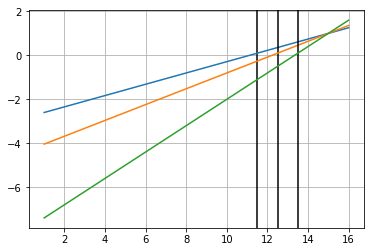

In [19]:
xx = np.linspace(1, 16)

ms = 8.5
msub = ms + 3
mscale = (1/(15-msub))
plt.axvline(msub, color='k')
plt.plot(xx, 0.1 + 0.9*mscale*(xx-msub))

ms = 9.5
msub = ms + 3
mscale = (1/(15-msub))
plt.axvline(msub, color='k')
plt.plot(xx, 0.1 + 0.9*mscale*(xx-msub))

ms = 10.5
msub = ms + 3
mscale = (1/(15-msub))
plt.axvline(msub, color='k')
plt.plot(xx, 0.1 + 0.9*mscale*(xx-msub))

# plt.ylim(0, 1)
# plt.xlim(10, 15)
plt.grid(which='both')

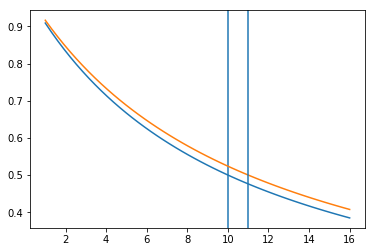

In [144]:
msub = 10
plt.plot(xx, msub/(xx+msub))
plt.axvline(msub)

msub = 11
plt.plot(xx, msub/(xx+msub))
plt.axvline(msub)

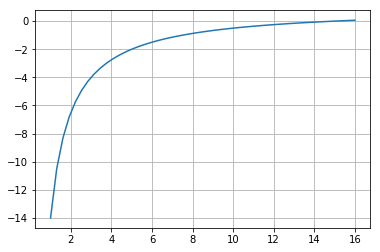

In [145]:
plt.plot(xx, 1-15/xx)
plt.grid(which='both')

In [146]:
prob = 0.9*mscale*(xx-msub)
np.array(list(map(lambda i: max(0.1, i), prob)))
# list(zip(prob, [0.1]))
# max(zip(prob, [0.1]))

array([0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.24489796,
       0.42857143, 0.6122449 , 0.79591837, 0.97959184, 1.16326531,
       1.34693878, 1.53061224, 1.71428571, 1.89795918, 2.08163265,
       2.26530612, 2.44897959, 2.63265306, 2.81632653, 3.        ])

In [147]:
h = 0.67
mstar = moster(1e13, 2)/h
m, c = np.polyfit([8.1, 11], [0.2, -1.], deg=1)
xx = np.log10(mstar)
yy = m* xx + c
mh1 = mstar * 10**yy

mstars = np.array((0.05, 0.05, 0.1, 0.2, 0.6))*mstar
xx = np.log10(mstars)
yy = m* xx + c
mh12 = mstars * 10**yy
mh12.sum()/mh1

1.7352254887341734

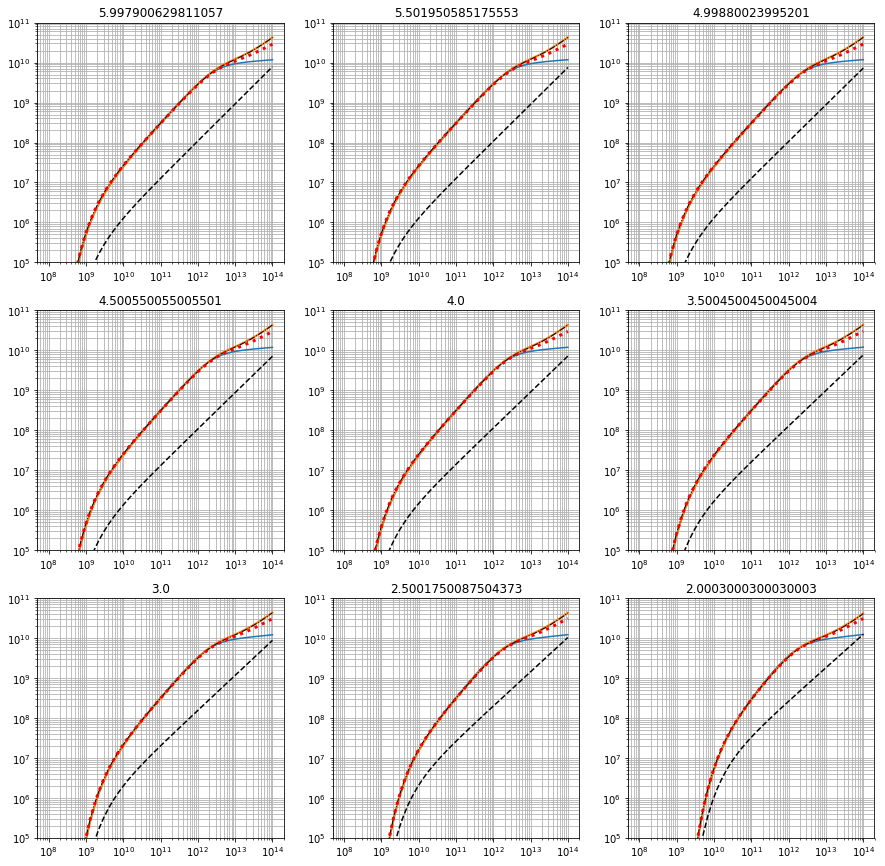

In [315]:

def dave(mhalo, zz, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    m, c = np.polyfit([8.2, 11], [0.2, -0.9], deg=1)
    xx = np.log10(mstar)
    yy = m* xx + c
    mh1 = mstar * 10**yy
    return mh1*h * np.exp(-mcut/mhalo)


def dave2(mhalo, zz, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    m, c = np.polyfit([8., 11.2], [0.3, -1.], deg=1)
    xx = np.log10(mstar)
    yy = m* xx + c
    mh1 = mstar * 10**yy
    return mh1*h * np.exp(-mcut/mhalo)


def davesat(msat, mhalo, zz,  h=0.6776, scatter=None):
    mdave = dave(msat, zz)
    mstellar = moster(msat, zz)/h
    mcut = np.log10(mstellar) + 3    
    mscale = (1/(15.5-mcut))
    poor = mscale*(np.log10(mhalo)-mcut)
    poor = np.array(list(map(lambda i: max(0.01, i), poor)))
    poor = np.array(list(map(lambda i: min(1, i), poor)))
    if (poor.max() > 1) or (poor.min() < 0):
        print(poor.min(), poor.max())
        return None
    mh1 = mdave * (1-poor)
    return mh1


def HIm(mhalo, mcut, beta, A, mcutp=1.0):
    """Returns the 21cm "mass" for a box of halo masses."""
    xx  = mhalo/mcut+1e-10
    mHI = xx**beta * np.exp(-1/xx**mcutp)
    mHI*= A
    return(mHI)



h = 0.6776
f = 0.03
alpha = -0.8

mh  = np.logspace(8, 14)
betaf = lambda zz: (1+2*zz)/(2+2*zz)
mcutf = lambda zz : 1e9*( 1.8 + 15*(3/(zz+1))**8 )
normf = lambda zz : 3e5*(1+(3.5/zz)**6) 
normf2 = lambda zz : normf(zz)*(1.75 + 0.25*zz)

plt.figure(figsize = (15, 15))
for i in range(0, 9, 1):
    aa = aafiles[i]
    zz = 1/aa-1
    mcut = mcutf(zz)
    beta = betaf(zz)
    norm = normf(zz) 

    ax = plt.subplot(3, 3, i+1)
    plt.plot(mh, dave(mh, zz))
    plt.plot(mh, HIm(mh, mcut, beta, norm), 'k--')

    mmin = mcut/10.
    numf = lambda m, mh : hodanals.nmsat(m, mh, f, alpha)
    massf = lambda m : m
    mtotsat = hodanals.massweightedsum(mh, mmin, numf, massf)
    cmass = mh - mtotsat

    massfBcen = lambda m :  dave(m, zz)
    mcenh1B = massfBcen(cmass)
    mtotsath1Bc = hodanals.massweightedsum(mh, mmin, numf, massfBcen)
    plt.plot(mh, (mcenh1B + mtotsath1Bc),  lw=2)

    massfBcen = lambda m :  dave2(m, zz)
    mcenh1B = massfBcen(cmass)
    mtotsath1Bc = hodanals.massweightedsum(mh, mmin, numf, massfBcen)
    plt.plot(mh, (mcenh1B + mtotsath1Bc), 'k-.', lw=1)

    mtotsath1B = []
    mtotsath1B2 = []
    for imh in mh:
        massfBsat = lambda m:  davesat(m, imh, zz)
        mtotsath1B.append(hodanals.massweightedsum(imh, mmin, numf, massfBsat))
        massfBsat2 = lambda m:  dave(m,  zz)
        mtotsath1B2.append(hodanals.massweightedsum(imh, mmin, numf, massfBsat2))
    mtotsath1B = np.array(mtotsath1B).flatten()
    mtotsath1B2 = np.array(mtotsath1B2).flatten()
#     plt.plot(mh, (mcenh1B ), 'y:', lw=3)
    plt.plot(mh, (mcenh1B + mtotsath1B), 'r:', lw=3)
#     plt.plot(mh, (mcenh1B + mtotsath1B2), 'c:', lw=3)

    
    plt.loglog()
    plt.ylim(1e5, 1e11)
    plt.title(zz)
    plt.grid(which='both')
plt.show()



In [316]:
10**-1.5


0.03162277660168379

In [317]:
print((zzfiles[::2]))
print(normf(zzfiles[::2])/1e7)
print(mcutf(zzfiles[::2])/1e9)
print(betaf(zzfiles[::2]))


[6. 5. 4. 3. 2.]
[0.03118201 0.03352947 0.04346386 0.10564879 0.89168701]
[ 1.81707171  1.85859375  2.0519424   3.30169373 16.8       ]
[0.92857143 0.91666667 0.9        0.875      0.83333333]


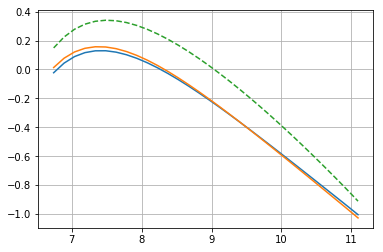

In [318]:
zz = 2

def dave3(mhalo, zz, m1 = 10**10, a1 = 0.3, a2= 0.6, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    mh1 = mstar*((mstar/m1)**a1 + (mstar/m1)**a2)**-1
    return mh1*h * np.exp(-mcut/mhalo)

mh  = np.logspace(10, 14)

plt.plot(np.log10(moster(mh, zz)), np.log10(dave(mh, zz)/moster(mh, zz)))
plt.plot(np.log10(moster(mh, zz)), np.log10(dave2(mh, zz)/moster(mh, zz)), '-')
plt.plot(np.log10(moster(mh, zz)), np.log10(dave3(mh, zz)/moster(mh, zz)), '--')
plt.grid()

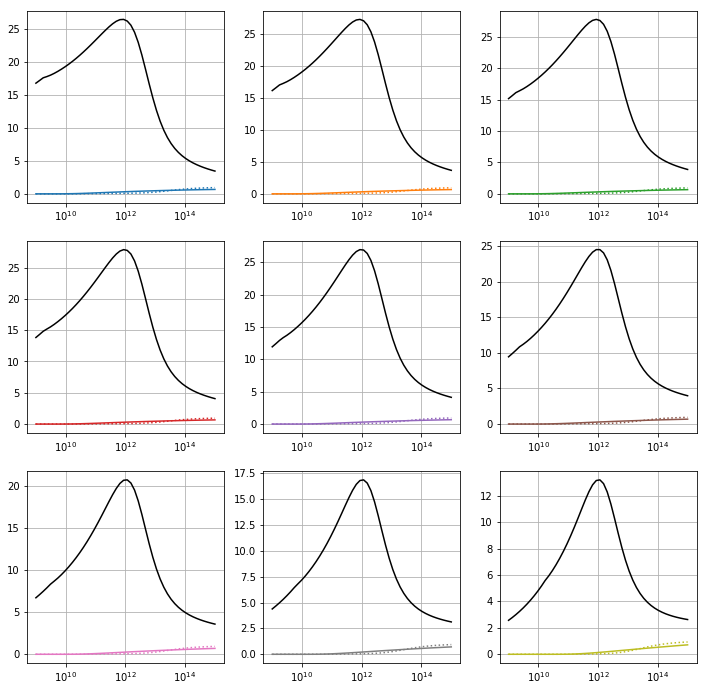

In [320]:
f = 0.03
alpha = -0.8
numf = lambda m, mh : hodanals.nmsat(m, mh, f, alpha)
mh = np.logspace(9, 15)


plt.figure(figsize = (12, 12))
for iz, zz in enumerate(zzfiles):

    mcut = mcutf(zz)
    norm = normf(zz)
    normsat = normf2(zz)
    beta = betaf(zz)

    mmin = mcut/10.
    massf = lambda m : m
    mtotsat = hodanals.massweightedsum(mh, mmin, numf, massf)
    cmass = mh - mtotsat
    

    ax = plt.subplot(3, 3, iz+1)

    massfA = lambda m :  HIm(m, mcut, beta, norm)
    mhaloh1A = massfA(mh)

    massfBcen = lambda m :  dave(m, zz)
    mcenh1B = massfBcen(cmass)
    massfBsat = lambda m :  dave(m, zz)
    mtotsath1B = hodanals.massweightedsum(mh, mmin, numf, massfBsat)
    plt.plot(mh, mtotsath1B/(mcenh1B + mtotsath1B), 'C%d:'%iz)
#     plt.plot(mh, massf(cmass)/massf(mh), 'C%d:'%iz)

    massfAsat = lambda m :  HIm(m, mcut, beta, normsat)
    mtotsath1A = hodanals.massweightedsum(mh, mmin, numf, massfAsat)
    mcenh1A = mhaloh1A - mtotsath1A
    plt.plot(mh, mtotsath1A/mhaloh1A, 'C%d-'%iz)

    plt.plot(mh, (mtotsath1B + mcenh1B)/mhaloh1A, 'k-')
    plt.xscale('log')
    plt.grid()
#     plt.ylim(0, 1.1)

../code/hodanalytics.py:92: RuntimeWarning: divide by zero encountered in log10
  mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/function_base.py:117: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start
../code/hodanalytics.py:53: RuntimeWarning: divide by zero encountered in power
  return -alpha * m**(alpha-1) / (f*mh)**alpha
../code/hodanalytics.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return -alpha * m**(alpha-1) / (f*mh)**alpha
../code/hodanalytics.py:53: RuntimeWarning: invalid value encountered in true_divide
  return -alpha * m**(alpha-1) / (f*mh)**alpha
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero en

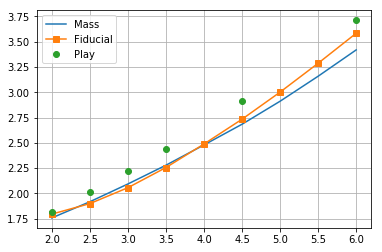

In [323]:
# Get bias

sim = '/highres/%d-9100-fixed'%2560

bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    bias_table.append(np.loadtxt(dpath + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
btable = np.array(bias_table)



bmass = [((btable[i, 5]*btable[i, 1]*btable[i, 2]).sum()/(btable[i, 1]*btable[i, 2]).sum()) for i in range(9)]

bmh1f, bmh1 = [], []
for iz, zz in enumerate(zzfiles[:]):

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1f.append(num/den)

    def mh1tmp(mh):
        mtotsat = hodanals.massweightedsum(mh, mmin, numf, lambda m: m)
        cmass = mh - mtotsat
        massfBcen = lambda m :  dave(m, zz)
        mcenh1B = massfBcen(cmass)
        massfBsat = lambda m :  dave(m, zz)
        mtotsath1B = hodanals.massweightedsum(mh, mmin, numf, massfBsat)
        return mcenh1B + mtotsath1B
    
    num = (btable[iz, 5]*mh1tmp(btable[iz, 1])*btable[iz, 2]).sum()
    den = (mh1tmp(btable[iz, 1])*btable[iz, 2]).sum()
    bmh1.append(num/den)
    
plt.plot(zzfiles, bmass, label='Mass')
plt.plot(zzfiles, bmh1f, marker='s', label='Fiducial')
plt.plot(zzfiles, bmh1, 'o', label='Play')
plt.grid()
plt.legend()

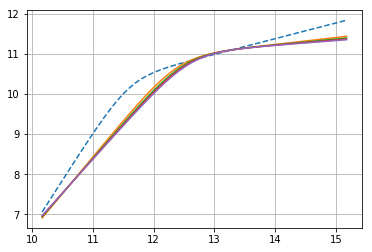

In [521]:
mh = np.logspace(10, 15)
plt.plot(np.log10(mh/h), np.log10(moster(mh, 0)/h), '--')
plt.plot(np.log10(mh/h), np.log10(moster(mh, 2)/h), '-')
plt.plot(np.log10(mh/h), np.log10(moster(mh, 3)/h), '-')
plt.plot(np.log10(mh/h), np.log10(moster(mh, 4)/h), '-')
plt.plot(np.log10(mh/h), np.log10(moster(mh, 5)/h), '-')
# plt.loglog()
plt.grid(which='both')

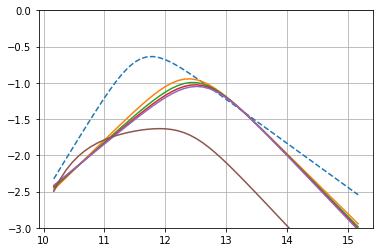

In [522]:
mh = np.logspace(10, 15)
plt.plot(np.log10(mh/h), np.log10(moster(mh, 0)/0.164/mh), '--')
plt.plot(np.log10(mh/h), np.log10(moster(mh, 2)/0.164/mh))
plt.plot(np.log10(mh/h), np.log10(moster(mh, 3)/0.164/mh))
plt.plot(np.log10(mh/h), np.log10(moster(mh, 4)/0.164/mh))
plt.plot(np.log10(mh/h), np.log10(moster(mh, 5)/0.164/mh))
plt.plot(np.log10(mh/h), np.log10(dave(mh, 2)/0.164/mh))
plt.ylim(-3, 0)
plt.grid(which='both')

Text(0, 0.5, 'M / (f$_b$ M$_h$)')

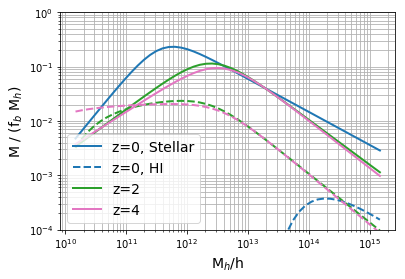

In [345]:
mh = np.logspace(10, 15)
plt.plot((mh/h), (moster(mh, 0)/0.164/mh), 'C0-', lw=2, label='z=0, Stellar')
plt.plot((mh/h), (dave(mh, 0)/0.164/mh), 'C0--', lw=2, label='z=0, HI')
plt.plot((mh/h), (moster(mh, 2)/0.164/mh), 'C2-', lw=2, label='z=2')
plt.plot((mh/h), (dave(mh,2)/0.164/mh), 'C2--', lw=2)
plt.plot((mh/h), (moster(mh, 4)/0.164/mh), 'C6-', lw=2, label='z=4')
plt.plot((mh/h), (dave(mh,4)/0.164/mh), 'C6--', lw=2)
plt.ylim(0.0001, 1)
plt.loglog()
plt.grid(which='both')
plt.legend( fontsize=14)
plt.xlabel('M$_h$/h', fontsize=14)
plt.ylabel('M / (f$_b$ M$_h$)', fontsize=14)

In [ ]:
mh = np.logspace(10, 15)
plt.plot(mh, moster(mh, 0))


# OMHI

In [3]:
def rhoCritCom(zz, omm=0.309167, omx=0.690833, hub=0.677):
    """Returns the critical density (in Msun/h and Mpc/h units) at                                                                      
       redshift zz, scaled by comoving volume."""
    rho = 2.7754e11*( omm*(1+zz)**3+omx )/(1+zz)**3
    return(rho)

cosmo.rho_crit(0)*1e10/rhoCritCom(0)

cosmo.rho_crit(3)*1e10/ rhoCritCom(3) #( 3 * 100**2 /(8 * math.pi * 43.007)*1e10/cosmo.h**2)




64.64196526221421

<ErrorbarContainer object of 3 artists>

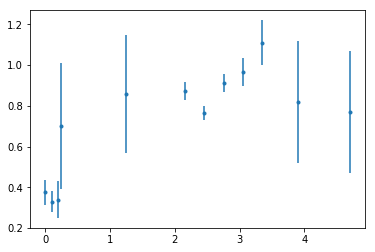

In [4]:
omh1data = np.loadtxt('../data/omega_HI_obs.txt').T
plt.errorbar(omh1data[0], omh1data[1], omh1data[2], fmt='.', label='Observation')


Text(0, 0.5, '$\\Omega\\ \\rm{HI}\\ x\\ 10^3$')

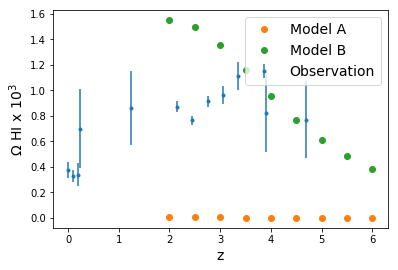

In [100]:
bs = 256

omh1data = np.loadtxt('../data/omega_HI_obs.txt').T
plt.errorbar(omh1data[0], omh1data[1], omh1data[2], fmt='.', label='Observation')

def disttoomh1(mod, bs):
    omh1 = []
    fname = '../data/outputs/m1_00p3mh-alpha-0p8-subvol/'
    if bs == 1024:
        fname = fname[:-1] + '-big/'
    fname = fname + '/Model%s/'%(mod)        
    for aa in aafiles:
        dist = np.loadtxt(fname + 'HI_dist_%0.4f.txt'%aa).T
        h1 = (dist[1]*dist[2]).sum()
        h1 /= bs**3
        h1 /= rhoCritCom(0)
        omh1.append(h1)
    return np.array(omh1)    

omh1 = disttoomh1('A', 256)
plt.plot(zzfiles, omh1*1e3, 'o', label='Model A')

omh1 = disttoomh1('B', 256)
plt.plot(zzfiles, 10*omh1*1e3, 'o', label='Model B')

plt.legend(fontsize=14)
plt.xlabel('z', fontsize=14)
plt.ylabel(r'$\Omega\ \rm{HI}\ x\ 10^3$', fontsize=14)

# omh1 = disttoomh1('A', 1024)
# plt.plot(zzfiles, omh1*1e3, 'k*', alpha=0.5)


In [17]:

# omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/OmHI.txt').T[1]
# plt.plot(zzfiles, omh1 * rhoCritCom(zzfiles)/rhoCritCom(0)*1e3, 'r-', label=r'ModelB: $\Omega_{HI}*\rho_c(z)/\rho_c(0)$')
# plt.plot(zzfiles, 5*omh1 * rhoCritCom(zzfiles)/rhoCritCom(0)*1e3, 'r--', label=r'ModelB: $5x\Omega_{HI}*\rho_c(z)/\rho_c(0)$')
# omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelB/OmHI2.txt').T[1]
# plt.plot(zzfiles, omh1*1e3 )


# omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/OmHI.txt').T[1]
# plt.plot(zzfiles, omh1 * rhoCritCom(zzfiles)/rhoCritCom(0)*1e3, 'g', label=r'ModelA: $\Omega_{HI}*\rho_c(z)/\rho_c(0)$')

# plt.xlim(1.8, 6)
# plt.yscale('log')
# autoscale(axis='y')
# plt.legend()
# plt.ylabel('Omega HI')
# plt.xlabel('z')
# plt.show()


# omh1data = np.loadtxt('../data/omega_HI_obs.txt').T
# plt.plot(omh1data[0], omh1data[1]/1e3, 'o')
# Ez = np.sqrt( 0.3*(1+omh1data[0])**3+0.7 )
# plt.plot(omh1data[0], omh1data[1]/1e3/Ez**2, 's')
# # 
# # omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/OmHI.txt').T[1]
# # plt.plot(zzfiles, omh1 )
# # plt.plot(zzfiles, omh1*2,'--' )
# omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelBold/OmHI.txt').T[1]
# plt.plot(zzfiles, omh1*3)
# # omh1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelB/OmHI2.txt').T[1]
# # plt.plot(zzfiles, omh1 )


# SMF

In [175]:
h = 0.6776
zzfiles[-1]

2.0

In [749]:
dpath = '/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/'
ii = -1
zz = zzfiles[ii]
aa = aafiles[ii]
print(zz)
ccat = BigFileCatalog(dpath + '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
cmass = ccat['Mass'].compute()
hmass = ccat['HaloMass'].compute()
# scat = BigFileCatalog('/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
# smass = scat['Mass'].compute()


ii = -2
zz2 = zzfiles[ii]
aa2 = aafiles[ii]
print(zz2)
ccat2 = BigFileCatalog(dpath + '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa2)
cmass2 = ccat2['Mass'].compute()
hmass2 = ccat2['HaloMass'].compute()
# scat2 = BigFileCatalog('/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa2)
# smass2 = scat2['Mass'].compute()


ii = -3
zz3 = zzfiles[ii]
aa3 = aafiles[ii]
print(zz3)
ccat3 = BigFileCatalog(dpath + '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa3)
cmass3 = ccat3['Mass'].compute()
hmass3 = ccat3['HaloMass'].compute()
# scat4 = BigFileCatalog('/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa4)
# smass4 = scat4['Mass'].compute()


ii = -5
zz4 = zzfiles[ii]
aa4 = aafiles[ii]
print(zz4)
ccat4 = BigFileCatalog(dpath + '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa4)
cmass4 = ccat4['Mass'].compute()
hmass4 = ccat4['HaloMass'].compute()
# scat4 = BigFileCatalog('/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa4)
# smass4 = scat4['Mass'].compute()


ii = -7
zz5 = zzfiles[ii]
aa5 = aafiles[ii]
print(zz5)
ccat5 = BigFileCatalog(dpath + '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa5)
cmass5 = ccat5['Mass'].compute()
hmass5 = ccat5['HaloMass'].compute()
# scat4 = BigFileCatalog('/global/cscratch1/sd/chmodi/m3127/H1mass/highres/2560-9100-fixed/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa4)
# smass4 = scat4['Mass'].compute()

2.0
2.5
3.0
4.0
5.0


In [831]:
stellarmass = moster(hmass, zz)/h
stellarmass2 = moster(hmass2, zz2)/h
stellarmass3 = moster(hmass3, zz3)/h
stellarmass4 = moster(hmass4, zz4)/h
stellarmass5 = moster(hmass5, zz5)/h

# cstellarmass = moster(cmass, zz)/h
# sstellarmass = moster(smass, zz)/h
# cstellarmass2 = moster(cmass2, zz2)/h
# sstellarmass2 = moster(smass2, zz2)/h


In [832]:
mbins = np.arange(8, 12, 0.2)

num, binedge = np.histogram(np.log10(stellarmass), mbins)
wts, _ = np.histogram(stellarmass, 10**mbins, weights=stellarmass)

num2, binedge = np.histogram(np.log10(stellarmass2), mbins)
wts2, _ = np.histogram(stellarmass2, 10**mbins, weights=stellarmass2)

num3, binedge = np.histogram(np.log10(stellarmass3), mbins)
wts3, _ = np.histogram(stellarmass3, 10**mbins, weights=stellarmass3)

num4, binedge = np.histogram(np.log10(stellarmass4), mbins)
wts4, _ = np.histogram(stellarmass4, 10**mbins, weights=stellarmass4)

num5, binedge = np.histogram(np.log10(stellarmass5), mbins)
wts5, _ = np.histogram(stellarmass5, 10**mbins, weights=stellarmass5)



In [848]:
np.diff(np.log10(10**mbins))

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [833]:
bsh = 256/h


In [ ]:
fig, ax 

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:17: R

Text(0, 0.5, 'N/Mpc$^3$/dex')

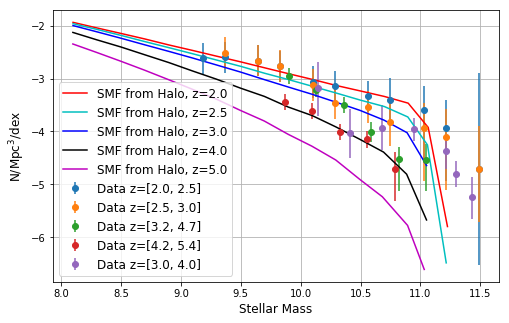

In [834]:
plt.figure(figsize=(8, 5))
smfpath = '/global/u1/c/chmodi/Programs/21cm/21cmhod/data/behroozi-2013-data-compilation/smf_ms/'
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz, zz2))
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz2).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz2, zz3))
data = np.loadtxt(smfpath + '/kslee_z%d.smf'%zz4).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3.19, 4.73))
data = np.loadtxt(smfpath + '/kslee_z%d.smf'%5).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(4.2, 5.4))
data = np.loadtxt(smfpath + '/marchesini_z3.5.smf').T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3, 4))

plt.plot(np.log10(wts/num), np.log10(num/0.2/bsh**3/np.log(10)), 'r-', label='SMF from Halo, z=%0.1f'%zz)  
plt.plot(np.log10(wts2/num2), np.log10(num2/0.2/bsh**3/np.log(10)), 'c-', label='SMF from Halo, z=%0.1f'%zz2)  
plt.plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3/np.log(10)), 'b-', label='SMF from Halo, z=%0.1f'%zz3)  
plt.plot(np.log10(wts4/num4), np.log10(num4/0.2/bsh**3/np.log(10)), 'k-', label='SMF from Halo, z=%0.1f'%zz4)  
plt.plot(np.log10(wts5/num5), np.log10(num5/0.2/bsh**3/np.log(10)), 'm-', label='SMF from Halo, z=%0.1f'%zz5)  

# plt.plot(np.log10(wtscen/numcen), np.log10(numcen/0.2/bsh**3/np.log(10)), 'r:', label='SMF from Centrals, z=%0.1f'%zz)  
plt.legend(fontsize=12)
plt.grid(which='both')
plt.xlabel('Stellar Mass', fontsize=12)
plt.ylabel('N/Mpc$^3$/dex', fontsize=12)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:32: R

Text(0, 0.5, 'N /Mpc$^3$/dex')

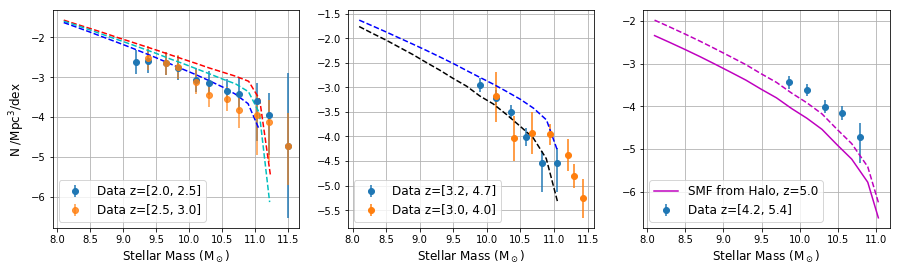

In [844]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ii = -1
zz = zzfiles[-1]
zz2 = zzfiles[-2]
zz3 = zzfiles[-3]
zz4 = zzfiles[-5]
zz5 = zzfiles[-7]

smfpath = '/global/u1/c/chmodi/Programs/21cm/21cmhod/data/behroozi-2013-data-compilation/smf_ms/'
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz).T
ax[0].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz, zz2))
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz2).T
ax[0].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz2, zz3), alpha=0.8)

# ax[0].plot(np.log10(wts/num), np.log10(num/0.2/bsh**3/np.log(10)), 'r-', label='SMF from Halo, z=%0.1f'%zz)  
# ax[0].plot(np.log10(wts2/num2), np.log10(num2/0.2/bsh**3/np.log(10)), 'c-', label='SMF from Halo, z=%0.1f'%zz2)  
# ax[0].plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3/np.log(10)), 'b-', label='SMF from Halo, z=%0.1f'%zz3)  

ax[0].plot(np.log10(wts/num), np.log10(num/0.2/bsh**3), 'r--')  
ax[0].plot(np.log10(wts2/num2), np.log10(num2/0.2/bsh**3), 'c--')  
ax[0].plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3), 'b--')  



data = np.loadtxt(smfpath + '/kslee_z%d.smf'%zz4).T
ax[1].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3.19, 4.73))
data = np.loadtxt(smfpath + '/marchesini_z3.5.smf').T
ax[1].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3, 4))
# ax[1].plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3/np.log(10)), 'b-', label='SMF from Halo, z=%0.1f'%zz3)  
# ax[1].plot(np.log10(wts4/num4), np.log10(num4/0.2/bsh**3/np.log(10)), 'k-', label='SMF from Halo, z=%0.1f'%zz4)  
ax[1].plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3), 'b--')  
ax[1].plot(np.log10(wts4/num4), np.log10(num4/0.2/bsh**3), 'k--')  


data = np.loadtxt(smfpath + '/kslee_z%d.smf'%5).T
ax[2].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(4.2, 5.4))
ax[2].plot(np.log10(wts5/num5), np.log10(num5/0.2/bsh**3/np.log(10)), 'm-', label='SMF from Halo, z=%0.1f'%zz5)  
ax[2].plot(np.log10(wts5/num5), np.log10(num5/0.2/bsh**3), 'm--')  

# plt.plot(np.log10(wtscen/numcen), np.log10(numcen/0.2/bsh**3/np.log(10)), 'r:', label='SMF from Centrals, z=%0.1f'%zz)  
for axis in ax: 
    axis.legend(fontsize=12)
    axis.grid(which='both')
    axis.set_xlabel('Stellar Mass (M$_\odot$)', fontsize=12)
ax[0].set_ylabel('N /Mpc$^3$/dex', fontsize=12)


In [764]:
import mymass_function as massfunc

In [765]:
cosmodef = {'omegam':0.309167, 'h':0.677, 'omegab':0.048}
omM =  cosmodef['omegam']
mf = massfunc.Mass_Func('../data/pk_Planck2018BAO_matterpower_z000.dat', M=omM)


# aa=np.array([0.0909, 0.1111, 0.1667, 0.2000, 0.2500, 0.2857])
# zz=(1/aa-1)
# na = len(aa)
# nmin, nmax, nn = 23.1, 1000, 8
# nv = np.array([23, 39, 68, 116, 200, 341, 584, 1000])

# mtest = np.logspace(8, 15, 1000)
# stnumd = [mf.STf(mtest, i) for i in aa]
# istcumnum = [interpolate(np.log(mtest), np.array([np.trapz(stnumd[j][i:]/mtest[i:], mtest[i:]) for i in range(mtest.size)])) for j in range(len(stnumd))]

In [766]:
hmass[0]/1e15, hmass[-1]/1e10

(0.08773571238865803, 0.13724788797600004)

In [767]:
# mf.match_abundance(hmass[:100], bs, 'Mice', a=aa, )
hmasscdf = mf.icdf_sampling(bs, mfunc='ST', hmass=hmass, zz=zz, lmmin=9, lmmax=15)
hmass3cdf = mf.icdf_sampling(bs, mfunc='ST', hmass=hmass3, zz=zz3, lmmin=9, lmmax=15)
hmass4cdf = mf.icdf_sampling(bs, mfunc='ST', hmass=hmass4, zz=zz4, lmmin=9, lmmax=15)
hmass5cdf = mf.icdf_sampling(bs, mfunc='ST', hmass=hmass5, zz=zz5, lmmin=9, lmmax=15)

In [466]:
# mbins2 = np.arange(9, 14, 0.2)
mbins2 = np.log(10**np.arange(9, 14, 0.2))


def nwhist(ar, lbins):
#     n = np.histogram(np.log10(ar), lbins)[0]
#     w = np.histogram(ar, 10**lbins, weights=ar)[0]
    n = np.histogram(np.log(ar), lbins)[0]
    w = np.histogram(ar, np.exp(lbins), weights=ar)[0]
    return n, w

n1, wt1 = nwhist(hmass, mbins2)
n1ic, wt1ic = nwhist(hmasscdf, mbins2)

n3, wt3 = nwhist(hmass3, mbins2)
n3ic, wt3ic = nwhist(hmass3cdf, mbins2)

n4, wt4 = nwhist(hmass4, mbins2)
n4ic, wt4ic = nwhist(hmass4cdf, mbins2)

n5, wt5 = nwhist(hmass5, mbins2)
n5ic, wt5ic = nwhist(hmass5cdf, mbins2)



NameError: name 'hmasscdf' is not defined

In [854]:
np.lhmass

array([8.77357124e+13, 8.77070619e+13, 8.56197789e+13, ...,
       1.37247888e+09, 1.37247888e+09, 1.37247888e+09])

In [465]:
bs = 256

# plt.plot(mbins2, mf.STf(10**mbins2, 1)/np.log(10), 'k')
# plt.plot(mbins2, mf.STf(10**mbins2, 1), 'k--')

plt.plot(mbins2, mf.STf(10**mbins2, aa), 'C0--')
plt.plot(mbins2, mf.STf(10**mbins2, aa3), 'C3--')
plt.plot(mbins2, mf.STf(10**mbins2, aa4), 'C4--')
plt.plot(mbins2, mf.STf(10**mbins2, aa5), 'C5--')

def tmpplot(w, n, i, label):
#     plt.plot(np.log10(w/n), n/0.2/bs**3/np.log(10), 'C%d'%i, label=label)
    plt.plot(np.log10(w/n), n/0.2/bs**3, 'C%d'%i, label=label)
    
tmpplot(wt1, n1, 0, label='z = %0.1f'%zz)
tmpplot(wt3, n3, 3, label='z = %0.1f'%zz3)
tmpplot(wt4, n4, 4, label='z = %0.1f'%zz4)
tmpplot(wt5, n5, 5, label='z = %0.1f'%zz5)


# plt.plot(np.log10(wt1/n1), n1/0.2/bs**3/np.log(10), 'C0')
# plt.plot(np.log10(wt3/n3), n3/0.2/bs**3/np.log(10), 'C3')
# plt.plot(np.log10(wt4/n4), n4/0.2/bs**3/np.log(10), 'C4')
# plt.plot(np.log10(wt5/n5), n5/0.2/bs**3/np.log(10), 'C5')

plt.yscale('log')
plt.grid()
plt.legend()
plt.ylim(1e-6, 2)
plt.xlabel('Halo Mass (M$_\odot$/h)', fontsize=12)
plt.ylabel('N /(Mpc/h)$^3$/dex', fontsize=12)


NameError: name 'mbins2' is not defined

In [860]:
np.diff(mbins2)

array([0.46051702, 0.46051702, 0.46051702, 0.46051702, 0.46051702,
       0.46051702, 0.46051702, 0.46051702, 0.46051702, 0.46051702,
       0.46051702, 0.46051702, 0.46051702, 0.46051702, 0.46051702,
       0.46051702, 0.46051702, 0.46051702, 0.46051702, 0.46051702,
       0.46051702, 0.46051702, 0.46051702, 0.46051702])

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'N /(Mpc/h)$^3$/dex')

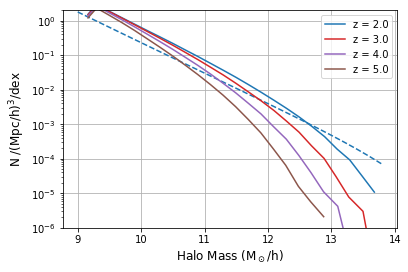

In [858]:
bs = 256

# plt.plot(mbins2, mf.STf(10**mbins2, 1)/np.log(10), 'k')
# plt.plot(mbins2, mf.STf(10**mbins2, 1), 'k--')

plt.plot(np.log10(np.exp(mbins2)), mf.STf(np.exp(mbins2), aa), 'C0--')
plt.plot(mbins2, mf.STf(10**mbins2, aa3), 'C3--')
plt.plot(mbins2, mf.STf(10**mbins2, aa4), 'C4--')
plt.plot(mbins2, mf.STf(10**mbins2, aa5), 'C5--')

def tmpplot(w, n, i, label):
#     plt.plot(np.log10(w/n), n/0.2/bs**3/np.log(10), 'C%d'%i, label=label)
    plt.plot(np.log10(w/n), n/0.2/bs**3, 'C%d'%i, label=label)
    
tmpplot(wt1, n1, 0, label='z = %0.1f'%zz)
tmpplot(wt3, n3, 3, label='z = %0.1f'%zz3)
tmpplot(wt4, n4, 4, label='z = %0.1f'%zz4)
tmpplot(wt5, n5, 5, label='z = %0.1f'%zz5)


# plt.plot(np.log10(wt1/n1), n1/0.2/bs**3/np.log(10), 'C0')
# plt.plot(np.log10(wt3/n3), n3/0.2/bs**3/np.log(10), 'C3')
# plt.plot(np.log10(wt4/n4), n4/0.2/bs**3/np.log(10), 'C4')
# plt.plot(np.log10(wt5/n5), n5/0.2/bs**3/np.log(10), 'C5')

plt.yscale('log')
plt.grid()
plt.legend()
plt.ylim(1e-6, 2)
plt.xlabel('Halo Mass (M$_\odot$/h)', fontsize=12)
plt.ylabel('N /(Mpc/h)$^3$/dex', fontsize=12)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


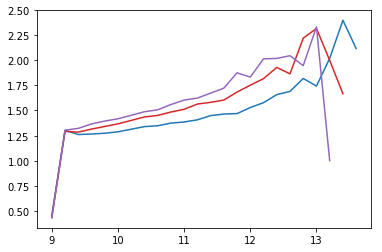

In [776]:
plt.plot(mbins2[:-1], n1/n1ic, 'C0')
plt.plot(mbins2[:-1], n3/n3ic, 'C3')
plt.plot(mbins2[:-1], n4/n4ic, 'C4')
# plt.plot(mbins2[:-1], n5/n5ic, 'C5')

In [507]:
stellarmasscdf = moster(hmasscdf, zz)/h
stellarmass3cdf = moster(hmass3cdf, zz3)/h
stellarmass4cdf = moster(hmass4cdf, zz4)/h
stellarmass5cdf = moster(hmass5cdf, zz5)/h

# cstellarmass = moster(cmass, zz)/h
# sstellarmass = moster(smass, zz)/h
# cstellarmass2 = moster(cmass2, zz2)/h
# sstellarmass2 = moster(smass2, zz2)/h


In [511]:
def nwhist(ar, lbins):
    n = np.histogram(np.log10(ar), lbins)[0]
    w = np.histogram(ar, 10**lbins, weights=ar)[0]
    return n, w

numic, wtsic = nwhist(stellarmasscdf, mbins)
numic3, wtsic3 = nwhist(stellarmass3cdf, mbins)
numic4, wtsic4 = nwhist(stellarmass4cdf, mbins)
numic5, wtsic5 = nwhist(stellarmass5cdf, mbins)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:18: R

Text(0, 0.5, 'N/Mpc$^3$/dex')

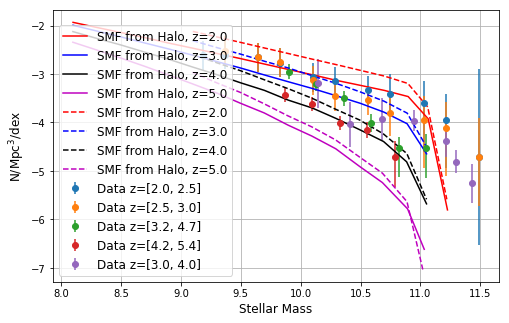

In [840]:
plt.figure(figsize=(8, 5))
smfpath = '/global/u1/c/chmodi/Programs/21cm/21cmhod/data/behroozi-2013-data-compilation/smf_ms/'
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz, zz2))
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%zz2).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz2, zz3))
data = np.loadtxt(smfpath + '/kslee_z%d.smf'%zz4).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3.19, 4.73))
data = np.loadtxt(smfpath + '/kslee_z%d.smf'%5).T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(4.2, 5.4))
data = np.loadtxt(smfpath + '/marchesini_z3.5.smf').T
plt.errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(3, 4))


plt.plot(np.log10(wts/num), np.log10(num/0.2/bsh**3/np.log(10)), 'r-', label='SMF from Halo, z=%0.1f'%zz)  
plt.plot(np.log10(wts3/num3), np.log10(num3/0.2/bsh**3/np.log(10)), 'b-', label='SMF from Halo, z=%0.1f'%zz3)  
plt.plot(np.log10(wts4/num4), np.log10(num4/0.2/bsh**3/np.log(10)), 'k-', label='SMF from Halo, z=%0.1f'%zz4)  
plt.plot(np.log10(wts5/num5), np.log10(num5/0.2/bsh**3/np.log(10)), 'm-', label='SMF from Halo, z=%0.1f'%zz5)  


plt.plot(np.log10(wtsic/numic), np.log10(numic/0.2/bsh**3), 'r--', label='SMF from Halo, z=%0.1f'%zz)  
plt.plot(np.log10(wtsic3/numic3), np.log10(numic3/0.2/bsh**3), 'b--', label='SMF from Halo, z=%0.1f'%zz3)  
plt.plot(np.log10(wtsic4/numic4), np.log10(numic4/0.2/bsh**3), 'k--', label='SMF from Halo, z=%0.1f'%zz4)  
plt.plot(np.log10(wtsic5/numic5), np.log10(numic5/0.2/bsh**3), 'm--', label='SMF from Halo, z=%0.1f'%zz5)  

# plt.plot(np.log10(wtscen/numcen), np.log10(numcen/0.2/bsh**3/np.log(10)), 'r:', label='SMF from Centrals, z=%0.1f'%zz)  
plt.legend(fontsize=12)
plt.grid(which='both')
plt.xlabel('Stellar Mass', fontsize=12)
plt.ylabel('N/Mpc$^3$/dex', fontsize=12)


### HIMF

In [369]:

def dave2(mhalo, zz, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    m, c = np.polyfit([8.2, 11], [0.2, -0.9], deg=1)
    xx = np.log10(mstar)
    yy = m* xx + c
    mh1 = mstar * 10**yy
    return mh1*h #* np.exp(-mcut/mhalo)

In [370]:
h1mass = dave(hmass, 2)/h
h1mass4 = dave(hmass4, 4)/h
# h1mass2 = dave(hmass, 2)/h
# h1mass42 = dave(hmass4, 4)/h
ch1mass = dave(cmass, 2)/h
ch1mass4 = dave(cmass4, 4)/h
sh1mass = dave(smass, 2)/h
sh1mass4 = dave(smass4, 4)/h


In [371]:
mbins = np.arange(8, 12, 0.2)
numh1, _ = np.histogram(np.log10(h1mass), mbins)
wtsh1, _ = np.histogram(h1mass, 10**mbins, weights=h1mass)
numh14, _ = np.histogram(np.log10(h1mass4), mbins)
wtsh14, _ = np.histogram(h1mass4, 10**mbins, weights=h1mass4)

numh12, _ = np.histogram(np.log10(h1mass2), mbins)
wtsh12, _ = np.histogram(h1mass2, 10**mbins, weights=h1mass2)
numh142, _ = np.histogram(np.log10(h1mass42), mbins)
wtsh142, _ = np.histogram(h1mass42, 10**mbins, weights=h1mass42)

gh1mass = np.concatenate((ch1mass, sh1mass))
numh1g, _ = np.histogram(np.log10(gh1mass), mbins)
wtsh1g, _ = np.histogram(gh1mass, 10**mbins, weights=gh1mass)

gh1mass4 = np.concatenate((ch1mass4, sh1mass4))
numh14g, _ = np.histogram(np.log10(gh1mass4), mbins)
wtsh14g, _ = np.histogram(gh1mass4, 10**mbins, weights=gh1mass4)


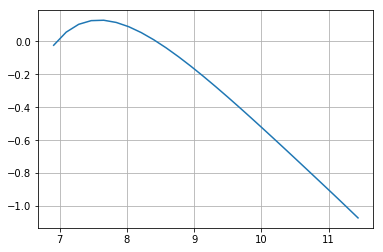

In [429]:
plt.plot(np.log10(moster(mh, 2)/h), np.log10(dave(mh, 2)/moster(mh, 2)))
plt.grid()

In [432]:
10**-0.6 

0.251188643150958

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


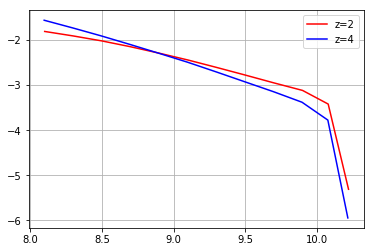

In [421]:
plt.plot(np.log10(wtsh1/numh1), np.log10(numh1/0.2/bsh**3/np.log(10)), 'r-',label='z=2')  
plt.plot(np.log10(wtsh14/numh14), np.log10(numh14/0.2/bsh**3/np.log(10)), 'b-',label='z=4')    


# plt.plot(np.log10(wtsh1g/numh1g), np.log10(numh1g/0.2/bsh**3), 'r--')  
# plt.plot(np.log10(wtsh14g/numh14g), np.log10(numh14g/0.2/bsh**3), 'b--')  

# plt.ylim(-5, 0)
plt.grid()
plt.legend()

# Match mass function


In [ ]:
np


In [642]:
h**3/np.log(10)

0.1351152917312856

In [647]:
hh = 1
hh2 = 0.67
(moster(mh, 0, hh)/hh)/(moster(mh, 0, hh2)/hh2)

array([0.38647597, 0.38672156, 0.38715062, 0.38789941, 0.38920375,
       0.39146837, 0.395378  , 0.40206186, 0.41329968, 0.43167508,
       0.46039462, 0.50225857, 0.55747165, 0.62141438, 0.68521101,
       0.74006384, 0.78151087, 0.809873  , 0.82798933, 0.83905706,
       0.84563557, 0.84948212, 0.85170972, 0.85299257, 0.85372897,
       0.85415092, 0.85439242, 0.85453057, 0.85460957, 0.85465473,
       0.85468055, 0.85469531, 0.85470374, 0.85470856, 0.85471132,
       0.85471289, 0.85471379, 0.85471431, 0.8547146 , 0.85471477,
       0.85471487, 0.85471492, 0.85471495, 0.85471497, 0.85471498,
       0.85471499, 0.85471499, 0.85471499, 0.85471499, 0.85471499])

1.0 0


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in true_divide


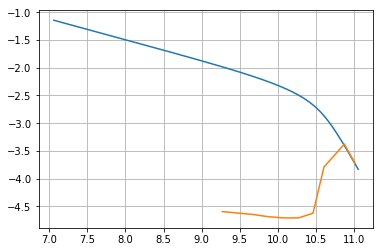

In [747]:
hh = h 

mh = np.logspace(10, 13, 1000)
zz = 0
aa = 1/(zz+1)
print(aa, zz)

mmin = 1e9
bs = 100
bsh = bs/h
numd = mf.STf(mh, aa)
num = numd*bs**3

mstarall, numall = [], []

mstarh = moster(mh, zz, h=hh)
mstarall.append(mstarh)
numall.append(num)

numsat = lambda m, x: hodanals.nmsat(m, x, 0.03, -0.8)
for im, mmh in enumerate(mh):
    mm = np.logspace(np.log10(mmin), np.log10(mmh/10.), 1000)
    if (diff(mm) < 0).sum(): print(im)
    nsat = numsat(mm[:-1], mmh)*num[im] *diff(mm)
    mstarsat = moster(mm[:-1], zz)
    numall.append(nsat)
    mstarall.append(mstarsat)
    

mstarall = np.concatenate(mstarall)
numall = np.concatenate(numall)

mbins = 10**np.arange(9, 12, 0.2)
count = np.histogram(mstarall, mbins)[0]
ncount = np.histogram(mstarall, mbins, weights=numall)[0]
ncount /= count
weights = np.histogram(mstarall, mbins, weights=mstarall)[0]
mx = weights/count

plt.plot(np.log10(mstarh/hh), np.log10(num/bsh**3))
plt.plot(np.log10(mx/hh), np.log10(ncount/bsh**3))
plt.grid()
# plt.xlim(7, 12)
# plt.ylim(-5.5, -0.5)


In [722]:
(nsat[:-1]*np.diff(mm)).sum()/num[-1]

3.8215853461894063

0.31746031746031744 2.15


Text(0, 0.5, 'M$_*$(M$_\\odot$)')

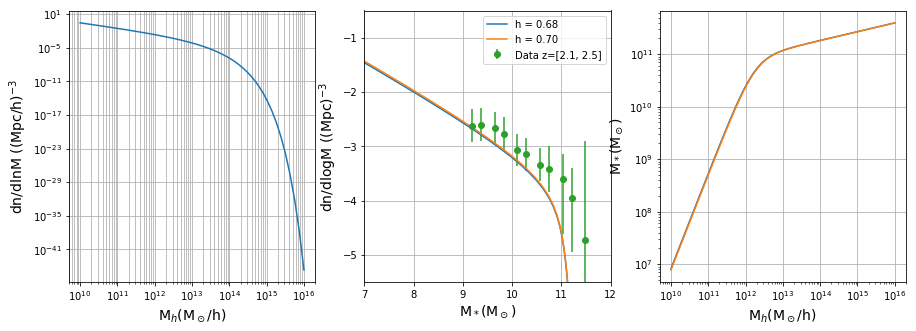

In [869]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


mh = np.logspace(10, 16)
zz = 2.15
aa = 1/(zz+1)
print(aa, zz)
num = mf.STf(mh, aa)
ax[0].loglog(mh, num)
ax[0].grid(which='both')
ax[0].set_xlabel('M$_h$(M$_\odot$/h)', fontsize=14)
ax[0].set_ylabel('dn/dlnM ((Mpc/h)$^{-3}$', fontsize=14)

hh = 0.6776
mstar = moster(mh, zz, h=hh)
ax[1].plot(np.log10(mstar/hh), np.log10(num*hh**3/np.log(10)), label='h = %0.2f'%hh)
ax[2].loglog(mh, mstar/hh)

hh = 0.7
mstar = moster(mh, zz, h=hh)
ax[1].plot(np.log10(mstar/hh), np.log10(num*hh**3/np.log(10)), label='h = %0.2f'%hh)
# ax[2].loglog(mh, moster(mh, zz, h=hh)/hh)# plt.plot(np.log10(mstar/hh), np.log10(num*hh**3/np.log(10)))
# plt.plot(np.log10(mstar/hh), np.log10(num*hh**3*np.log(10)))
ax[2].loglog(mh, mstar/hh)

# data = np.loadtxt(smfpath + '/moustakas_z0.105.smf').T
data = np.loadtxt(smfpath + '/moustakas_z0.105.smf').T
# ax[1].errorbar(data[0], np.log10(data[1]), fmt='o', label='Data z=[%0.1f, %0.1f]'%(0.0033, 0.2), alpha=0.5)
data = np.loadtxt(smfpath + '/mortlock_z%0.1f.smf'%2).T
ax[1].errorbar(data[0], data[1], [data[3], data[2]], fmt='o', label='Data z=[%0.1f, %0.1f]'%(zz, zz2))

ax[1].grid()
ax[1].set_xlim(7, 12)
ax[1].set_ylim(-5.5, -0.5)
ax[1].legend()
ax[1].set_xlabel('M$_*$(M$_\odot$)', fontsize=14)
ax[1].set_ylabel('dn/dlogM ((Mpc)$^{-3}$', fontsize=14)

ax[2].grid()
ax[2].set_xlabel('M$_h$(M$_\odot$/h)', fontsize=14)
ax[2].set_ylabel('M$_*$(M$_\odot$)', fontsize=14)




1.0 0


(-5.5, -0.5)

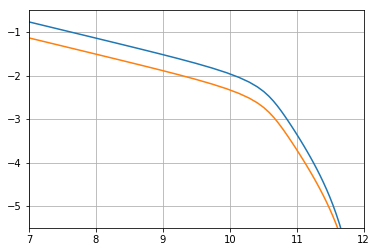

In [664]:

mm = np.logspace(10, 16)
# mh = np.logspace(10, 16)
zz = 0
aa = 1/(zz+1)
print(aa, zz)

hh = 1
mh = mm*hh
mstar = moster(mh, zz, h=hh)
num = mf.STf(mh, aa)
plt.plot(np.log10(mstar/hh), np.log10(num*hh**3))
# plt.plot(np.log10(mh), np.log10(num))


hh = 0.67
mh = mm*hh
mstar = moster(mh, zz, h=hh)

num = mf.STf(mh, aa)
plt.plot(np.log10(mstar/hh), np.log10(num*hh**3))
# plt.plot(np.log10(mh), np.log10(num))



plt.grid()
plt.xlim(7, 12)
plt.ylim(-5.5, -0.5)

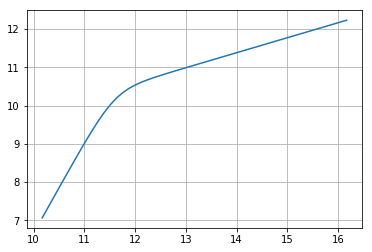

In [634]:
plt.plot(np.log10(mh/h), np.log10(moster(mh, 0)/h))
plt.grid()

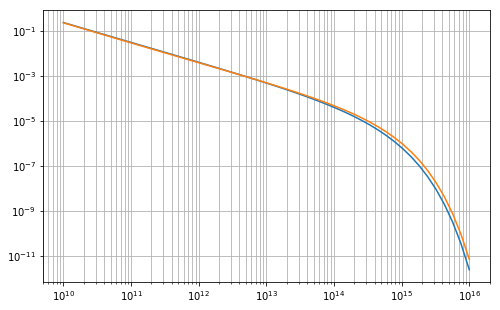

In [630]:
plt.figure(figsize=(8, 5))
num = mf.STf(mh, aa)
plt.plot(mh, num)
num = mf.Micef(mh, aa)
plt.plot(mh, num)
plt.loglog()
plt.grid(which='both')


# Cleaning


In [ ]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]

aa = 0.3333
halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
cen = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/cencat/'%aa)
sat = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/satcat-m1_5p0min-alpha_0p9/'%aa)
hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()
cmass, ch1mass = cen["Mass"].compute(), cen['H1mass'].compute()
smass, sh1mass = sat["Mass"].compute(), sat['H1mass'].compute()
hpos, cpos, spos = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
chid, shid = cen['HaloID'].compute(), sat['HaloID'].compute()



In [16]:
zzfiles

[6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0]

In [17]:
bs = 256
nc = 256
pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])

In [38]:
dm = BigFileMesh('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1429/dmesh_N0256', '1').paint()
meshpos = pm.paint(hpos)
mesh = pm.paint(hpos, mass=hmass)
meshposnn = pm.paint(hpos, resampler='nearest')
meshnn = pm.paint(hpos, mass=hmass, resampler='nearest')


In [42]:
cmesh = meshnn.r2c()
mask = [np.ones_like(ki) for ki in cmesh.x]
mask[2] *= abs(cmesh.x[2]) > 0.1
mask = prod(mask)
cmesh *= mask
mesh2 = cmesh.c2r()
mesh3 = cmesh.apply(lambda k, v: v*np.exp(-sum(ki**2 for ki in k)*1**2)).c2r()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


In [189]:
from matplotlib.colors import LogNorm, SymLogNorm

NameError: name 'dm' is not defined

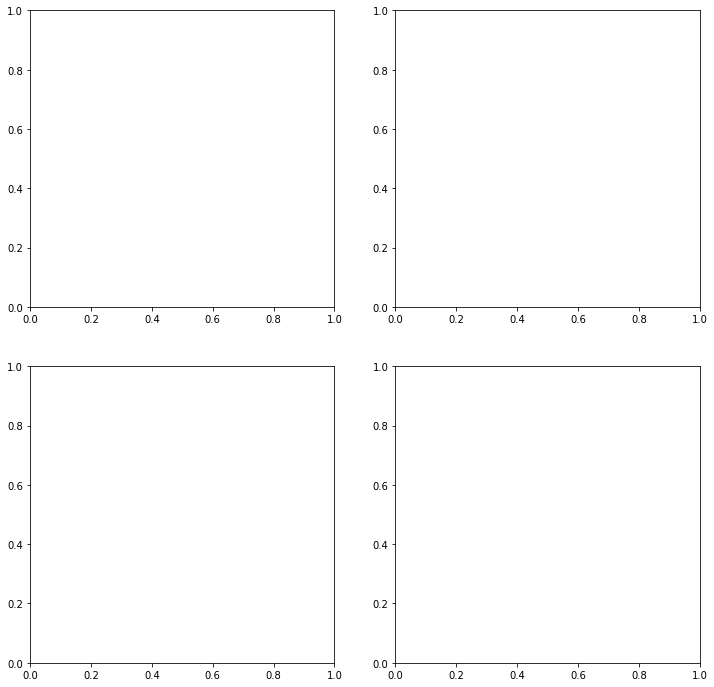

In [190]:
norm = LogNorm(1e5, 1e13)
# norm = None
x1, x2 = 5, 10
cmap = 'RdBu_r'

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
im = ax[0, 0].imshow(dm[...][x1:x2, :, :].sum(axis=0).T, cmap=cmap)
plt.colorbar(im, ax=ax[0, 0])
ax[0, 0].set_title('Dark Matter')
im = ax[0, 1].imshow(1+meshnn[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[0, 1])
norm = SymLogNorm(1e5)
ax[0, 1].set_title('H1')
im = ax[1, 0].imshow(1+mesh2[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 0])
ax[1, 0].set_title('H1 - k_par<0.1')
im = ax[1, 1].imshow(1+mesh3[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 1])
ax[1, 1].set_title('H1 - k_par<0.1, Gauss=1')
plt.show()
im = plt.imshow(meshposnn[...][x1:x2, :, :].sum(axis=0).T, cmap=cmap)
plt.colorbar(im)

In [24]:
%timeit sum([1, 2, 3])

9.17 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
%timeit np.array([1, 2, 3]).sum()

5.39 µs ± 98.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
hpos[0]/bs*nc

array([23.932821, 62.835903, 25.79345 ], dtype=float32)

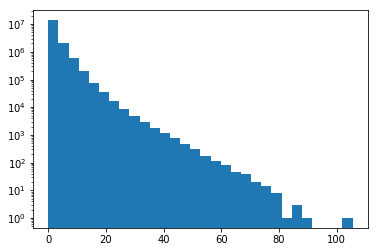

In [45]:
plt.hist(meshpos[...].flatten(), bins=30, log=True)
plt.show()

In [46]:
p1 = FFTPower(mesh/mesh.cmean(), mode='1d').power
p2 = FFTPower(mesh2/mesh.cmean(), mode='1d').power
p3 = FFTPower(mesh3/mesh.cmean(), mode='1d').power
p13 = FFTPower(mesh/mesh.cmean(), second=mesh3/mesh.cmean(), mode='1d').power

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1, 100000.0)

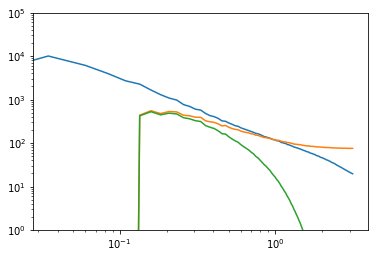

In [47]:
plt.loglog(p1['k'], p1['power'])
plt.loglog(p1['k'], p2['power'])
plt.loglog(p1['k'], p3['power'])
plt.ylim(1, 1e5)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


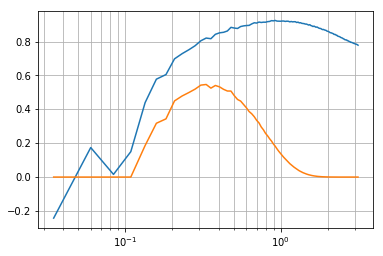

In [48]:
plt.semilogx(p1['k'], p13['power']*(p3['power']*p1['power'])**-0.5)
plt.semilogx(p1['k'], (p3['power']/p1['power'])**1)
plt.grid(which='both')
plt.show()

In [49]:
xx = np.log10(1+mesh[...].flatten())
yy = np.log10(1+mesh3[...].flatten())
yy2 = np.log10((1-mesh3[...]).flatten())

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


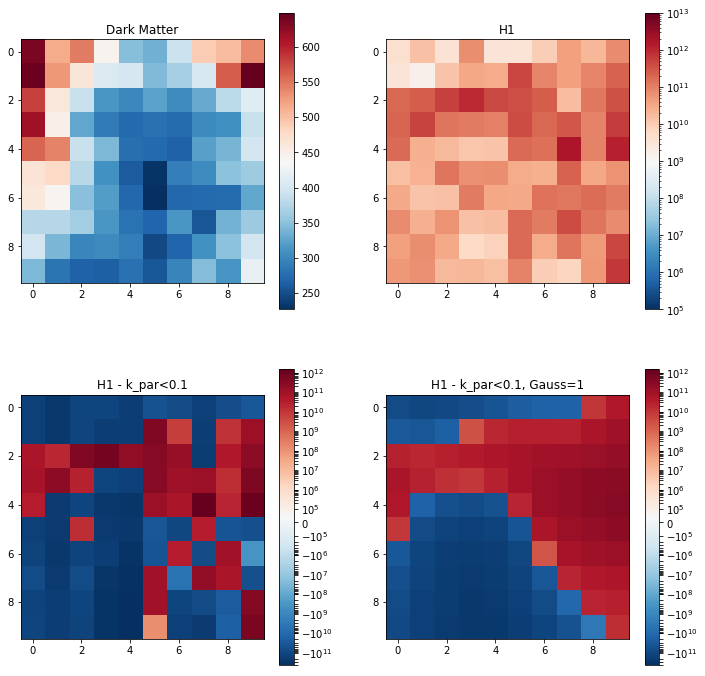

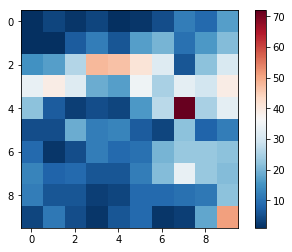

In [50]:
norm = LogNorm(1e5, 1e13)
# norm = None
x1, x2 = 5, 15
y1, y2 = 5, 15
z1, z2 = 5, 15
cmap = 'RdBu_r'

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
im = ax[0, 0].imshow(dm[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, cmap=cmap)
plt.colorbar(im, ax=ax[0, 0])
ax[0, 0].set_title('Dark Matter')
im = ax[0, 1].imshow(1+meshnn[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[0, 1])
norm = SymLogNorm(1e5)
ax[0, 1].set_title('H1')
im = ax[1, 0].imshow(1+mesh2[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 0])
ax[1, 0].set_title('H1 - k_par<0.1')
im = ax[1, 1].imshow(1+mesh3[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 1])
ax[1, 1].set_title('H1 - k_par<0.1, Gauss=1')
plt.show()
im = plt.imshow(meshposnn[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, cmap=cmap)
plt.colorbar(im)

In [41]:
(meshposnn[...][x1:x2, y1:y2, z1:z2] == 0).sum()

550

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


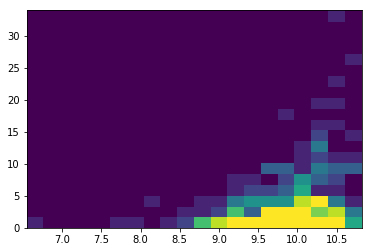

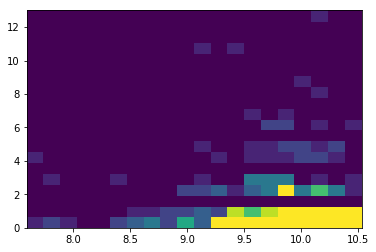

In [65]:
xx = np.log10(mesh3[...][x1:x2, y1:y2, z1:z2].flatten())
xxm = np.log10(-mesh3[...][x1:x2, y1:y2, z1:z2].flatten())
yy= meshposnn[...][x1:x2, y1:y2, z1:z2].flatten()
# plt.scatter(xx, yy)
mask = ~np.isnan(xx)
plt.hist2d(xx[mask], yy[mask], vmin=0, vmax=10, bins=20)
plt.show()
mask = np.isnan(xx)
im = plt.hist2d(xxm[mask], yy[mask], vmin=0, vmax=10, bins=20)
plt.show()

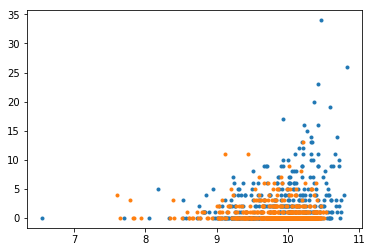

In [69]:
plt.plot(xx, yy, '.')
plt.plot(xxm, yy, '.')


In [175]:
# tab0 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/ema_ps/pk_Planck2018BAO_matterpower_z000_cleftqfunc_z150.dat').T
# tab1 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/RunPB/pklin_RunPB_cleftqfunc_z150.txt').T

tab0 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/ema_ps/pk_Planck2018BAO_matterpower_z000_cleftpk_z150.dat').T
tab1 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/RunPB/pklin_RunPB_cleftpk_z150.txt').T

In [119]:

# for ii in range(tab0.shape[0]):
#     plt.plot(tab0[0], tab0[ii], 'r')
#     plt.plot(tab0[0], -tab0[ii], 'r--')
#     plt.plot(tab1[0], tab1[ii], 'b', alpha=0.5)
#     plt.plot(tab1[0], -tab1[ii], 'b--', alpha=0.5)
#     plt.loglog()
#     plt.title(ii)
#     plt.show()

## RSD

In [7]:
pkmu = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelA/HI_pks_mu_0.1429.txt').T

[]

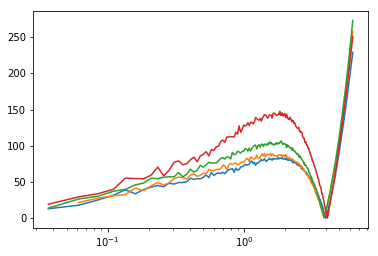

In [8]:
for i in range(1, 5):
    plt.plot(pkmu[0], pkmu[0]**2*pkmu[i])
plt.semilogx()

[]

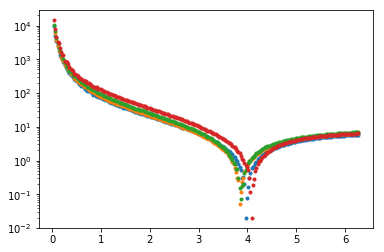

In [9]:
for i in range(1, 5):
    plt.plot(pkmu[0], pkmu[0]**0*pkmu[i], '.')
# plt.loglog()
plt.semilogy()

[]

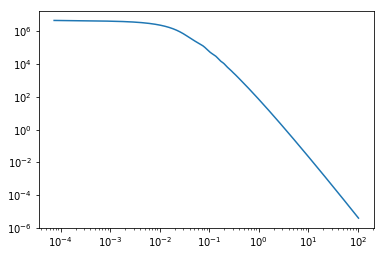

In [10]:
klin, plin = np.loadtxt('../data/pk_Planck2018BAO_matterpower_z000.dat', unpack=True)
# plt.plot(klin, plin)
plt.plot(klin, plin/klin**1)
plt.loglog()


In [11]:
ipklin = ius(klin, plin)

NameError: name 'ius' is not defined

In [12]:
for ia, aa in enumerate(aafiles):
    pkb = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/HI_bias_%.4f.txt'%aa)
    phh = pkb[:, 2]**2*pkb[:, 3]
    blin = phh/ipklin(pkb[:, 0])/cosmo.scale_independent_growth_factor(1/aa-1)**2
    plt.plot(pkb[:, 0], blin**0.5,'C%d'%ia)
    plt.plot(pkb[:, 0], pkb[:, 2], 'C%d--'%ia)
    plt.semilogx()
plt.ylim(1, 6)
plt.grid(which='both')
plt.show()


NameError: name 'ipklin' is not defined

In [13]:
np.arccos(0.75)*180/np.pi, np.cos(20*np.pi/180.)

(41.40962210927086, 0.9396926207859084)

In [197]:
from scipy.optimize import curve_fit as cf
from scipy.optimize import minimize

(0, 2)

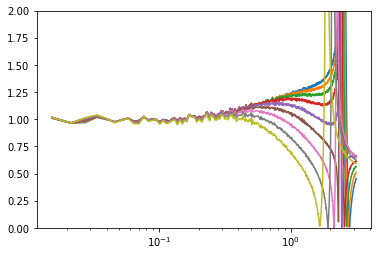

In [215]:

dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'

for iz, zz in enumerate(zzfiles):

    aa = 1.0/(1.0+zz)
    ff = (0.31/(0.31+0.69*aa**3))**0.55

    # and the linear theory counterparts.                                                                                                                               
    klin, plin = np.loadtxt('../data/pk_Planck2018BAO_matterpower_z000.dat', unpack=True)
    pkd = np.loadtxt(dpath + "HI_pks_mu_{:06.4f}.txt".format(aa))[1:,:]
    pkb = np.loadtxt(dpath + "HI_bias_{:06.4f}.txt".format(aa))[1:,:]
    bh =  pkb[:, 2]
    bb = bh[1:6].mean()
    beta = ff/bb
    mu = 0.875 #0.94
    fac = (1 + beta*mu**2)**2
    k = pkd[:, 0]
    pk = ius(pkb[:, 0], bh**2*pkb[:, 3])(k)
    
    plt.plot(k, pkd[:, -1]/pk/(1+beta*mu**2)**2)
#     plt.plot(k, k**2*pkd[:, -1], 'C%d-'%iz)

#     def func(k, sig):
#         return k**2* fac*pk*1/(1+0.5*k**2*mu**2*sig**2)**2

#     wts = np.ones_like(k)
#     wts[[k>1]] = 100
#     def ftomin(sig):
#         y = func(k, sig)
#         return sum(((y - k**2*pkd[:, -1])/wts)**2)

# #     sig = cf(func, k, pkd[:, -1], p0=0.5, sigma=wts)[0][0]
#     sig = minimize(ftomin, 0.5).x[0]
#     print(zz, sig)
#     plt.plot(k, func(k, 0.5), 'C%d--'%iz)
#     plt.axvline(1.5)

plt.xscale('log')
# plt.yscale('log')
plt.ylim(0, 2)

6.0 4.690346694421785e-06
5.5 3.300698133792027e-06
5.0 -8.404690252305925e-06
4.5 7.398371447902424e-06
4.0 2.914870007146315e-07
3.5 2.3772169491950533e-06
3.0 5.340604063153176e-06
2.5 2.627952096479185e-07
2.0 -1.977348178212727e-06


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(0, 2)

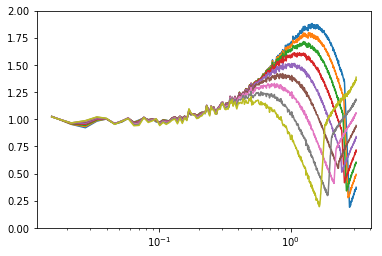

In [222]:

dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'

for iz, zz in enumerate(zzfiles):

    aa = 1.0/(1.0+zz)
    ff = (0.31/(0.31+0.69*aa**3))**0.55

    # and the linear theory counterparts.                                                                                                                               
    klin, plin = np.loadtxt('../data/pk_Planck2018BAO_matterpower_z000.dat', unpack=True)
    pkd = np.loadtxt(dpath + "HI_pks_mu_{:06.4f}.txt".format(aa))[1:,:]
    pkb = np.loadtxt(dpath + "HI_bias_{:06.4f}.txt".format(aa))[1:,:]
    bh =  pkb[:, 2]
    bb = bh[1:6].mean()
    beta = ff/bb
    mu = 0.875 #0.94
    fac = (1 + beta*mu**2)**2
    k = pkd[:, 0]

    diff = pkd[:, -1] - pkd[:, 1]
    pk = ius(klin, bb**2*plin)(k)*cosmo.scale_independent_growth_factor(zz)**2
#     pk = ius(pkb[:, 0], bh**2*pkb[:, 3])(k)
#     pk = ius(pkb[:, 0], bb**2*pkb[:, 3])(k)
    yy = (diff/pk + 1)/fac
    plt.plot(k, yy)
#     plt.plot(k, k**2*pkd[:, -1], 'C%d-'%iz)

    def func(k, sig):
        return 1/(1+0.5*k**2*mu**2*sig**2)**2

#     wts = np.ones_like(k)
#     wts[[k>1]] = 100
#     def ftomin(sig):
#         y = func(k, sig)
#         return sum(((y - k**2*pkd[:, -1])/wts)**2)

    sig = cf(func, k, yy, p0=0.5, sigma=wts)[0][0]
#     sig = minimize(ftomin, 0.5).x[0]
    print(zz, sig)
#     plt.plot(k, func(k, 0.5), 'C%d--'%iz)
#     plt.axvline(1.5)

plt.xscale('log')
# plt.yscale('log')
plt.ylim(0, 2)

## UV background

In [153]:
from matplotlib.colors import LogNorm, SymLogNorm

82.9419508021549


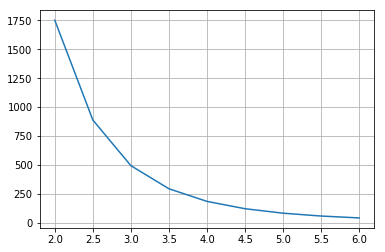

In [268]:
zz = 5
aa = 1/(1+zz)
mfpathz = lambda z: 37*((1+z)/5)**-5.4
plt.plot(zzfiles, mfpathz(zzfiles)*(1+zzfiles))
# plt.yscale('log')
mfpath = mfpathz(zz)*(1+zz)
# mfpath = mfpathz(zz) 
plt.grid()
print(mfpath)


In [155]:

dpath = '/project/projectdirs/m3127/H1mass/'
bs, nc = 256, 256
sim = '/lowres/%d-9100-fixed'%256
pm = ParticleMesh(BoxSize=bs, Nmesh=[nc]*3)

halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
hpos = halos['Position'].compute()
hmass = halos['Mass'].compute()
switchon = np.random.choice(np.arange(hmass.size), 100, replace=False)

In [156]:
gridpos = pm.generate_uniform_particle_grid(shift=0)
grid = gridpos*nc/bs

In [13]:
rr = []
for i in range(100):
    dist = abs(hpos[switchon[i]] - gridpos)
    dist[dist > bs/2] = dist[dist > bs/2] - bs
    dist = (dist**2).sum(axis=1)**0.5
    rr.append(dist)

In [387]:
rr;
# for r in rr:
#     print((r<mfpath).sum(), r.size)

In [434]:
hmesh = pm.paint(hpos[switchon], mass=hmass[switchon], resampler='cic')
# hmesh = pm.paint(hpos[switchon], mass=hmass[switchon], resampler='nearest')

meshc = hmesh.r2c()
kmesh = sum(i**2 for i in meshc.x)**0.5
wt = arctan(kmesh *mfpath)/kmesh/mfpath
wt[kmesh == 0] = 1
meshc*= wt
mesh2 = meshc.c2r()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


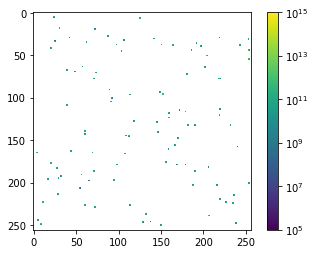

In [435]:
plt.imshow(hmesh[...].sum(axis=0), norm=LogNorm(1e5, 1e15))
colorbar()

In [436]:
mesh = pm.create('real', value=0)

for i in range(100):
    wt = hmass[switchon[i]]/rr[i]**2 * np.exp(-rr[i]/mfpath)
    mesh.paint(gridpos, mass=wt, hold=True)
    

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Use ParticleMesh.paint instead
  """


In [720]:
"{:}_bias_{:6.4f}.txt".format('hi', aa),

('hi_bias_0.3333.txt',)

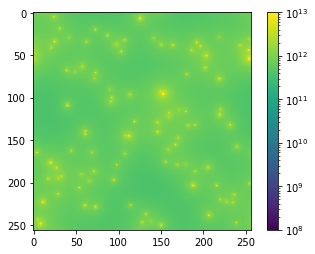

In [437]:
plt.imshow(mesh[...].sum(axis=0), norm=LogNorm(1e8, 1e13))
colorbar()

In [438]:
mesh2.cmean(), mesh.cmean()

(3180211.651325226, 2808352974.3185034)

In [439]:
mesh2[...].std(), mesh[...].std()

(9495129.558121022, 26030422589.819958)

In [440]:
mesh2.cmean()/mesh.cmean(), mesh2[...].std()/mesh[...].std()

(0.0011324116592206365, 0.00036477047290943334)

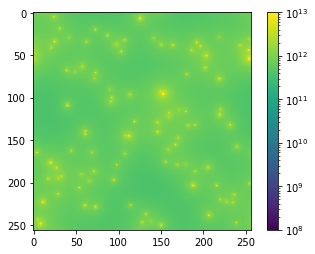

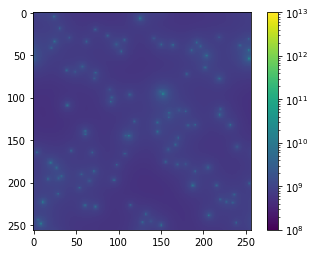

In [441]:
plt.imshow(mesh[...].sum(axis=0), norm=LogNorm(1e8, 1e13))
colorbar()
plt.show()
plt.imshow(mesh2[...].sum(axis=0), norm=LogNorm(1e8, 1e13))
colorbar()

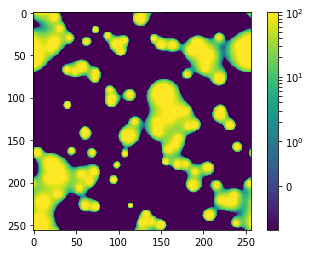

In [442]:
plt.imshow(((mesh[...]-mesh[...].mean())/mesh[...].mean()).sum(axis=0), vmin=-1, vmax=100, norm=SymLogNorm(1))
colorbar()

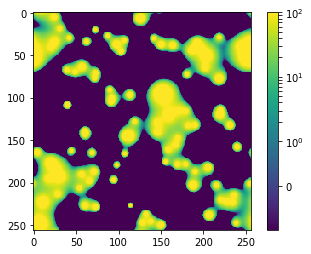

In [443]:
# plt.imshow((mesh2[...]).sum(axis=0), vmin=-1, vmax=100, norm=SymLogNorm(1))
# colorbar()
plt.imshow(((mesh2[...]-mesh2[...].mean())/mesh2[...].mean()).sum(axis=0), vmin=-1, vmax=100, norm=SymLogNorm(1))
colorbar()

In [444]:
kk1 = FFTPower(mesh/mesh.cmean(), mode='1d').power['k']
pk1 = FFTPower(mesh/mesh.cmean(), mode='1d').power['power']
pk2 = FFTPower(mesh2/mesh2.cmean(), mode='1d').power['power']
pkx = FFTPower(mesh/mesh.cmean(), second=mesh2/mesh2.cmean(), mode='1d').power['power']
# pk2 = FFTPower(mesh2, mode='1d').power['power']
# pkx = FFTPower(mesh/mesh.cmean(), second=1+mesh2, mode='1d').power['power']


[]

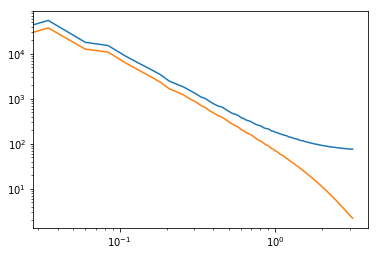

In [445]:
plt.plot(kk1, pk1)
plt.plot(kk1, pk2)
plt.loglog()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


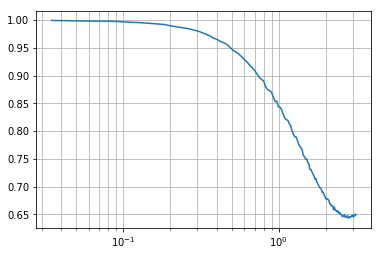

In [446]:
plt.plot(kk1, pkx/(pk1*pk2)**0.5)
plt.semilogx()
plt.grid(which='both')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


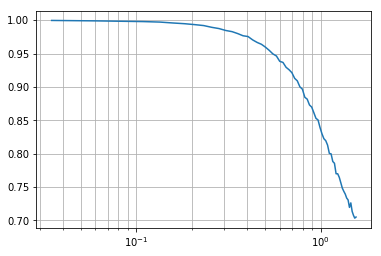

In [430]:
plt.plot(kk1, pkx/(pk1*pk2)**0.5)
plt.semilogx()
plt.grid(which='both')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


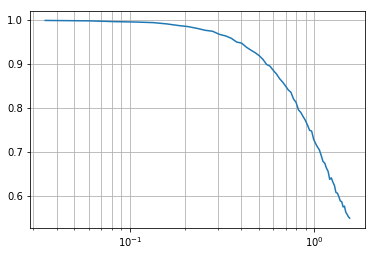

In [421]:
plt.plot(kk1, pkx/(pk1*pk2)**0.5)
plt.semilogx()
plt.grid(which='both')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


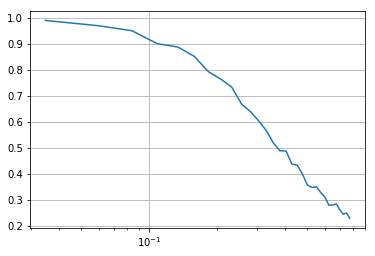

In [383]:
plt.plot(kk1, pkx/(pk1*pk2)**0.5)
plt.semilogx()
plt.grid()

In [82]:
rat = (mesh2/mesh)[...]
rat.mean(), rat.std()

(62.52075182871636, 165167982.77526635)

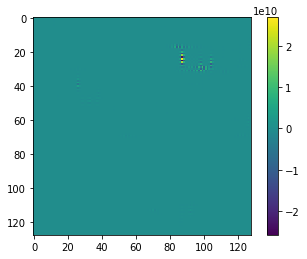

In [83]:
plt.imshow((mesh2/mesh)[...].sum(axis=0))
colorbar()

## blackholes & QLF

In [99]:
def moster(Mhalo,z,h=0.6776, scatter=None):
    """                                                                                                                                                                                                                                                                                   
    moster(Minf,z):                                                                                                                                                                                                                                                                       
    Returns the stellar mass (M*/h) given Minf and z from Table 1 and                                                                                                                                                                                                                       
    Eq. (2,11-14) of Moster++13 [1205.5807].                                                                                                                                                                                                                                              
    This version now works in terms of Msun/h units,
    convert to Msun units in the function
    To get "true" stellar mass, add 0.15 dex of lognormal scatter.                                                                                                                                                                                                                        
    To get "observed" stellar mass, add between 0.1-0.45 dex extra scatter.                                                                                                                                                                                                               
    """
    Minf = Mhalo/h
    zzp1  = z/(1+z)
    M1    = 10.0**(11.590+1.195*zzp1)
    mM    = 0.0351 - 0.0247*zzp1
    beta  = 1.376  - 0.826*zzp1
    gamma = 0.608  + 0.329*zzp1
    Mstar = 2*mM/( (Minf/M1)**(-beta) + (Minf/M1)**gamma )
    Mstar*= Minf
    if scatter is not None: 
        Mstar = 10**(np.log10(Mstar) + np.random.normal(0, scatter, Mstar.size))
    return Mstar*h
    #                                                                                                                                                                                                                                                                                     



def qlf(M, zz, alpha=-2.03, beta=-4, Ms=-27.21, lphi6 = -8.94):
    phis = 10**(lphi6 -0.47*(zz-6))
    f1 = 10**(0.4*(alpha+1)*(M - Ms))
    f2 = 10**(0.4*(beta+1)*(M - Ms))
    return phis/(f1+f2)


def mbh(mg, alpha=-3.5, beta=1, scatter=False):
    m = mg/h
    mb = 1e10 * 10**alpha * (m/1e10)**beta
    if scatter: mb = 10**(np.log10(mb) + np.random.normal(scale=scatter, size=mb.size))
    return mb*h

def lq(mb, eta=0.1, scatter=False):
    m = mb/h
    lsun = 3.28e26
    if scatter: eta = np.random.lognormal(eta, scatter, m.size)
    return 3.3e4*eta*m *lsun

In [79]:
qlfdat = np.loadtxt('../data/qlf.dat').T



array([[0.5215, 0.2964, 0.5215, 0.2252, 0.2252, 0.1877, 0.204 , 0.254 ,
        0.254 , 0.1402, 0.5215, 0.3658],
       [0.7658, 0.3397, 0.7658, 0.2448, 0.2448, 0.1993, 0.2188, 0.2817,
        0.2817, 0.1452, 0.7658, 0.4506]])

In [128]:
qlfdat[[10, 11]][mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 339

(-11, -3)

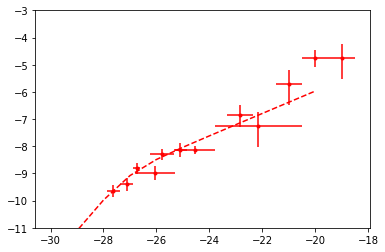

In [146]:
magbins = np.linspace(-30, -20, 11)
plt.plot(magbins, np.log10(qlf(magbins, 6)), 'r--')
mask = (qlfdat[5] > 5.6) & (qlfdat[5] < 6.5)
# plt.plot(qlfdat[6][mask], qlfdat[9][mask], 'r.')
plt.errorbar(qlfdat[6][mask], qlfdat[9][mask], qlfdat[[11,10]].T[mask].T, qlfdat[[7,8]].T[mask].T, fmt='.', color='r')

# plt.plot(magbins, np.log10(qlf(magbins, 5)), 'b--')
# mask = (qlfdat[5] > 4.6) & (qlfdat[5] < 5.5)
# plt.plot(qlfdat[6][mask], qlfdat[9][mask], 'b.')

# magbins = np.linspace(-30, -20, 11)
# plt.plot(magbins, np.log10(qlf(magbins, 6)), 'r--')
# mask = (qlfdat[5] > 5.6) & (qlfdat[5] < 6.5)
# plt.plot(qlfdat[6][mask], qlfdat[9][mask], 'r.')

# plt.plot(magbins, np.log10(qlf(magbins, 5)), 'b--')
# mask = (qlfdat[5] > 4.6) & (qlfdat[5] < 5.5)
# plt.plot(qlfdat[6][mask], qlfdat[9][mask], 'b.')

plt.ylim(-11, -3)

In [356]:
zz = 5
aa = 1/(1+zz)
dpath = '/project/projectdirs/m3127/H1mass/'
scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
bs, nc = 256, 128
sim = '/highres/%d-9100-fixed'%2560
pm = ParticleMesh(BoxSize=bs, Nmesh=[nc]*3)

halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
hpos = halos['Position'].compute()
hmass = halos['Mass'].compute()
cmass = cencat['Mass'].compute()
smass = satcat['Mass'].compute()
# switchon = np.random.choice(np.arange(hmass.size), 100, replace=False)


In [357]:
allmass = np.concatenate((cmass, smass))
mgal = moster(allmass, zz, scatter=0.3)


In [ ]:
# for alpha in [ -3.5]:
#     mb = mbh(mgal, scatter=0.0, alpha=alpha)
#     plt.plot(mgal[::100], mb[::100], '.')

# plt.plot(mgal[::100], 10**(7.45 + 1.05*np.log10(mgal[::100]/10**11)), '.')
# plt.loglog()

(0.1, 1000000.0)

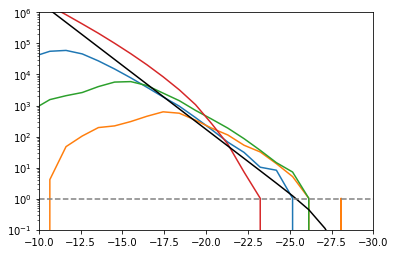

In [161]:
magbins = np.linspace(-30, -1, 31)


# fon = 1e-4
# for alpha in [-4,  -3.5, -3]:
for fon, alpha in [[1e-2, -3.5], [1e-4, -1], [1e-3, -2], [1e0, -5]]:
    mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
    mb = mbh(mgalon, scatter=0.3, alpha=alpha)
    lum = lq(mb, eta=0.1, scatter=0.3)
    mag14 = 72.5+0.29- 2.5*np.log10(lum)
    
    nmag14, xmag14 = np.histogram(mag14, magbins)
    xmag14 = xmag14[:-1]
    nmag14 = nmag14/np.diff(magbins)[0]

#     plt.plot(xmag14,(nmag14/(bs/h)**3 ))
    plt.plot(xmag14, nmag14)


plt.plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'k')

plt.axhline(1, color='grey', ls='--')

plt.yscale('log')
plt.xlim(-10, -30)
plt.ylim(0.1, 1e6)
# plt.ylim(1e-9, 1e-4)
# plt.xlim(magbins[-1], magbins[0])

In [292]:
# for iz, zz in enumerate([2, 3, 4, 5, 6]):
    
#     aa = 1/(1+zz)
#     dpath = '/project/projectdirs/m3127/H1mass/'
#     scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
#     bs, nc = 256, 128
#     sim = '/highres/%d-9100-fixed'%2560

#     halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
#     cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
#     satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
#     hmass = halos['Mass'].compute()
#     cmass = cencat['Mass'].compute()
#     smass = satcat['Mass'].compute()

#     allmass = np.concatenate((cmass, smass))
#     mgal = moster(allmass, zz, scatter=0.3)

#     for fon, alpha in [[1e-2, -3.5]]:
#         mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
#         mb = mbh(mgalon, scatter=0.3, alpha=alpha)
#         lum = lq(mb, eta=0.1, scatter=0.3)
#         mag14 = 72.5+0.29- 2.5*np.log10(lum)

#         nmag14, xmag14 = np.histogram(mag14, magbins)
#         xmag14 = xmag14[:-1]
#         nmag14 = nmag14/np.diff(magbins)[0]

#         plt.plot(xmag14, nmag14, 'C%d'%iz, label='z = %d'%zz)


#     plt.plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

# plt.axhline(1, color='grey', ls='--')

# plt.yscale('log')
# plt.xlim(-10, -30)
# plt.ylim(0.1, 1e6)
# plt.legend()


No handles with labels found to put in legend.


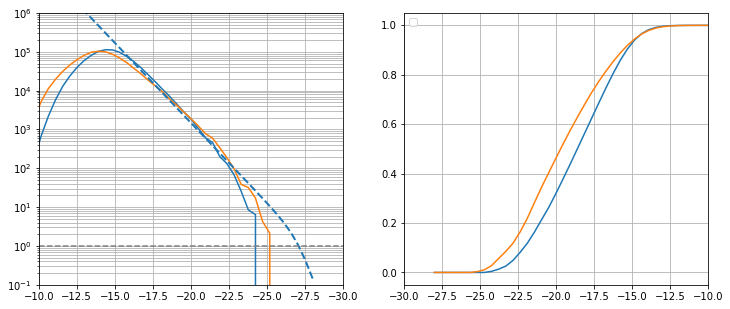

In [220]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([3]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560

    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

    for fon, alpha, beta in [ [1e-2, -3.7, 0.6], [1e-2, -3.5, 0.7]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)


ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

No handles with labels found to put in legend.


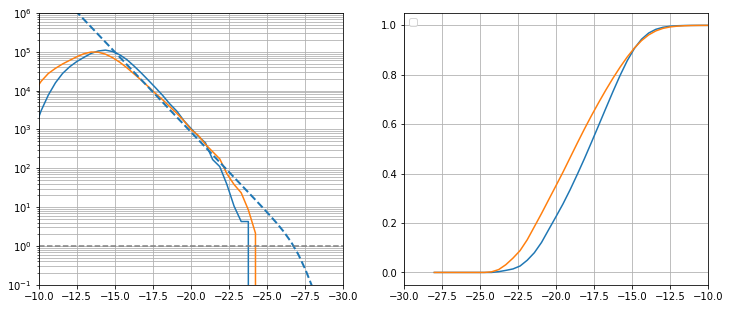

In [222]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([3.5]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560

    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

    for fon, alpha, beta in [ [1e-2, -3.8, 0.6], [1e-2, -3.65, 0.7]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

No handles with labels found to put in legend.


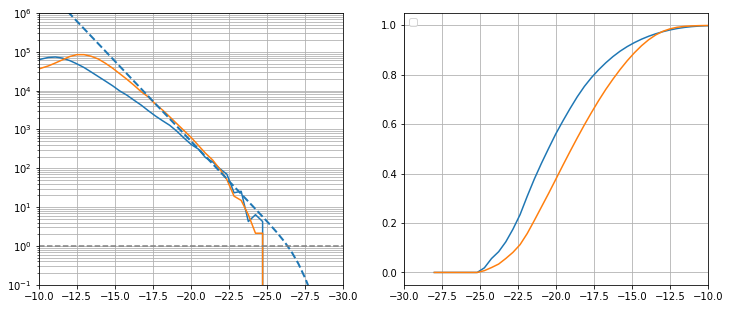

In [223]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([4]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560

    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

    for fon, alpha, beta in [ [1e-2, -3.5, 1], [1e-2, -3.6, 0.8]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

No handles with labels found to put in legend.


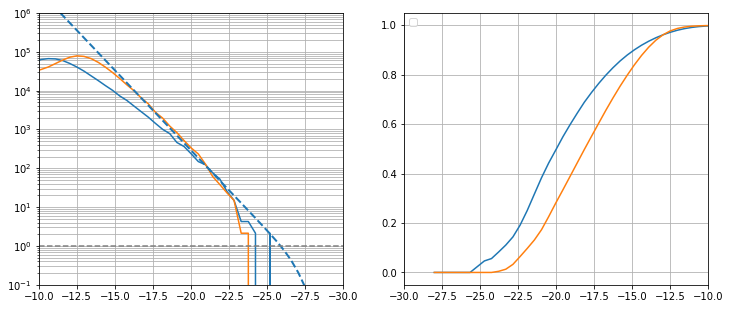

In [224]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([4.5]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560

    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

    for fon, alpha, beta in [ [1e-2, -3.6, 1], [1e-2, -3.7, 0.8]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

No handles with labels found to put in legend.


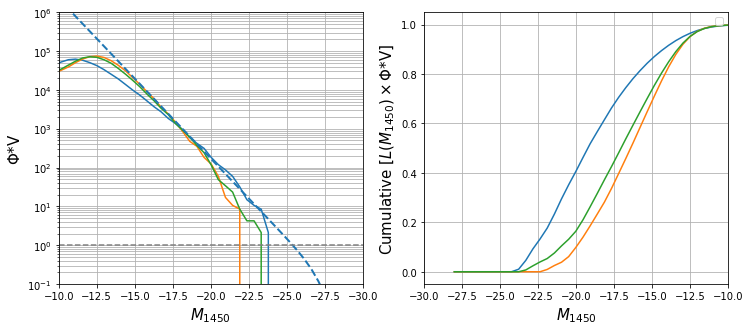

In [152]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([5]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560

    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

    for fon, alpha, beta in [ [1e-2, -3.5, 1], [1e-2, -4, 0.75], [1e-2, -3.9, 0.8]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
ax[0].set_xlabel('$M_{1450}$', fontsize=15)
ax[1].set_xlabel('$M_{1450}$', fontsize=15)
ax[0].set_ylabel('$\Phi$*V', fontsize=15)
ax[1].set_ylabel(r'Cumulative [$L(M_{1450}) \times \Phi$*V]', fontsize=15)

for axis in ax: axis.grid(which='both')

No handles with labels found to put in legend.


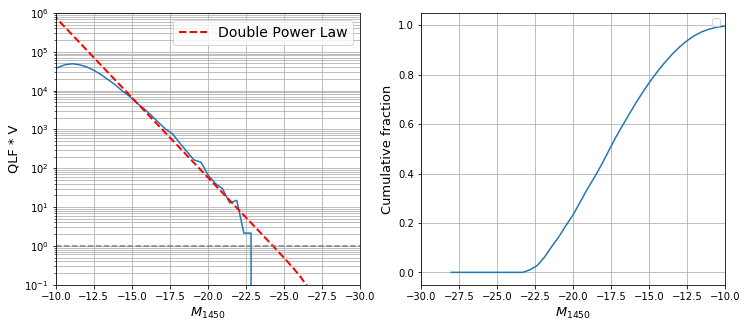

In [941]:
magbins = np.linspace(-28, -5, 50)

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

for iz, zz in enumerate([6]):
    
    aa = 1/(1+zz)
    dpath = '/project/projectdirs/m3127/H1mass/'
    scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
    bs, nc = 256, 128
    sim = '/highres/%d-9100-fixed'%2560
#     bs, nc = 1024, 128
#     sim = '/highres/%d-9100-fixed'%10240

#     halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
    satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
#     hmass = halos['Mass'].compute()
    cmass = cencat['Mass'].compute()
    smass = satcat['Mass'].compute()

    allmass = np.concatenate((cmass, smass))
#     allmass = hmass
    mgal = moster(allmass, zz, scatter=0.3)

#     for fon, alpha, beta in [ [1e-2, -3.5, 1], [1e-2, -3.8, 0.90]]:
    for fon, alpha, beta in [ [1e-2, -3.5, 1]]:
        mgalon = np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
        mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
        lum = lq(mb, eta=0.1, scatter=0.3)
        mag14 = 72.5+0.29- 2.5*np.log10(lum)

        nmag14, xmag14 = np.histogram(mag14, magbins)
        xmag14 = xmag14[:-1]
        nmag14 = nmag14/np.diff(magbins)[0]

        lmag14, _ = np.histogram(mag14, magbins, weights=lum)
        frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(1, len(lmag14)+1)]
#         frac = (lmag14*nmag14)/(lmag14*nmag14).sum()
        frac /= np.diff(magbins)[0]

        ax[0].plot(xmag14, nmag14, )
        ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'r--', lw=2, label='Double Power Law')

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[0].legend(fontsize=14)
ax[0].set_xlabel('$M_{1450}$', fontsize=13)
ax[0].set_ylabel('QLF * V', fontsize=13)
ax[1].set_xlabel('$M_{1450}$', fontsize=13)
ax[1].set_ylabel('Cumulative fraction', fontsize=13)
ax[1].set_xlim(-30, -10)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

In [930]:
neff = lum.sum()**2 / (lum**2).sum()
bs**3/neff, bs**3 / lum.size

(39129.34024865599, 72.68275945725821)

In [929]:
# neff = allmass.sum()**2 / (allmass**2).sum()
# bs**3/neff, bs**3 / allmass.size

(5.9405115072323715, 0.726825925720707)

In [360]:
zz = 6
aa = 1/(1+zz)
mfpath = mfpathz(zz)*(1+zz)

dpath = '/project/projectdirs/m3127/H1mass/'
scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
bs, nc = 256, 256
sim = '/highres/%d-9100-fixed'%2560
cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
#     hmass = halos['Mass'].compute()
cmass = cencat['Mass'].compute()
smass = satcat['Mass'].compute()

allmass = np.concatenate((cmass, smass))
#     allmass = hmass
mgal = moster(allmass, zz, scatter=0.3)

fon, alpha, beta = [1e-2, -3.5, 1]
switchon = np.random.choice(np.arange(mgal.size), replace=False, size=int(fon*mgal.size))
mgalon = mgal[switchon] #np.random.choice(mgal, replace=False, size=int(fon*mgal.size))
mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
lum = lq(mb, eta=0.1, scatter=0.3)


lmesh = pm.paint(hpos[switchon], mass=lum, resampler='cic')


meshc = lmesh.r2c()
kmesh = sum(i**2 for i in meshc.x)**0.5
wt = arctan(kmesh *mfpath)/kmesh/mfpath
wt[kmesh == 0] = 1
meshc*= wt
gmesh = meshc.c2r()



/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [370]:
gmesh2 = gmesh + 100*gmesh.cmean()

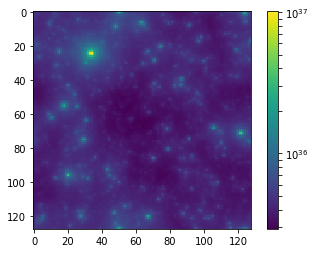

In [366]:
plt.imshow(gmesh[...].sum(axis=0), norm=SymLogNorm(1e30))
plt.colorbar()

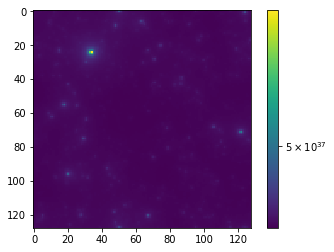

In [373]:
plt.imshow(gmesh2[...].sum(axis=0), norm=SymLogNorm(1e35))
plt.colorbar()

In [374]:
p1 = FFTPower(gmesh/gmesh.cmean(), mode='1d').power
p2 = FFTPower(gmesh2/gmesh2.cmean(), mode='1d').power


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[]

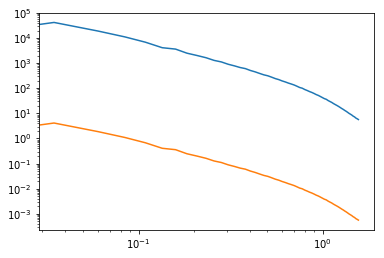

In [375]:
plt.plot(p1['k'], p1['power'])
plt.plot(p1['k'], p2['power'])
plt.loglog()

## Get bias from files

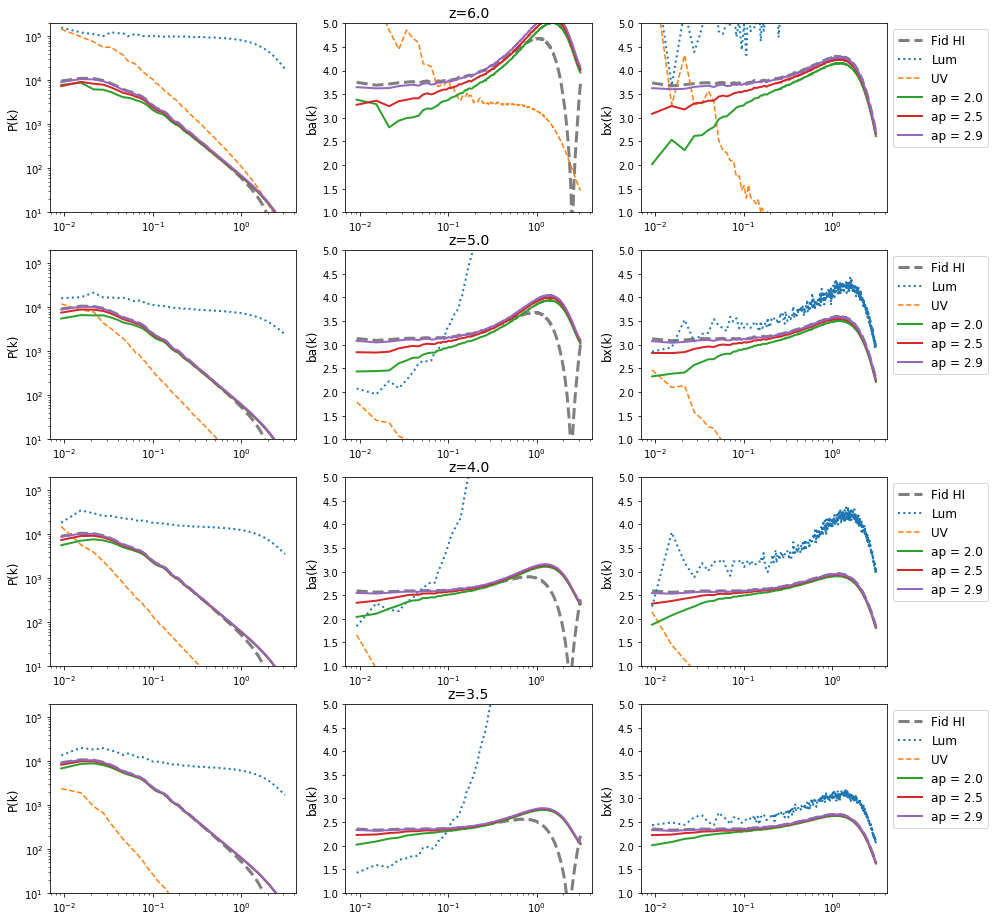

In [467]:
zz= 6
fig, axall = plt.subplots(4, 3, figsize = (15, 16))

for iz, zz in enumerate([6, 5, 4., 3.5]):
    axar = axall[iz]
    aa = 1/(zz+1)

    dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'
    h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
    lum = np.loadtxt(dpath + 'uvbg/Lum_bias_{:.4f}.txt'.format(aa)).T
    uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T

    k, p = h1fid[0], h1fid[3]



    ax = axar[0]
    ax.plot(k, h1fid[2]**2 * p, 'k--', label='Old HI', lw=3, alpha=0.5)
    ax.plot(k, lum[2]**2 * p, label='Lum', ls=':', lw=2)
    ax.plot(k, uv[2]**2 * p, label='UV', ls='--')
    ax.set_ylabel('P(k)', fontsize=12)
    ax.set_ylim(10, 2e5)
    ax.set_yscale('log')


    ax = axar[1]
    ax.plot(k, h1fid[2], 'k--', label='Old HI', lw=3, alpha=0.5)
    ax.plot(k, lum[2]/2, label='Lum/2', ls=':', lw=2)
    ax.plot(k, uv[2]/2, label='UV/2', ls='--')

    ax.set_ylabel('ba(k)', fontsize=12)
    ax.set_ylim(1, 5)
    # ax.set_yscale('log')

    ax = axar[2]
    ax.plot(k, h1fid[1], 'k--', label='Fid HI', lw=3, alpha=0.5)
    ax.plot(k, lum[1], label='Lum', ls=':', lw=2)
    ax.plot(k, uv[1], label='UV', ls='--')

    ax.set_ylabel('bx(k)', fontsize=12)
    ax.set_ylim(1, 5)
    # ax.set_yscale('log')


    for profile in [2.0, 2.5, 2.9]:
        ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
        h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_{}_bias_{:6.4f}.txt'.format( ap, aa)).T
        axar[0].plot(k, h1uv[2]**2 * p, label='ap = {:.1f}'.format(profile), ls='-', lw=2)
        axar[1].plot(k, h1uv[2], label='ap = {:.1f}'.format(profile), ls='-', lw=2)
        axar[2].plot(k, h1uv[1], label='ap = {:.1f}'.format(profile), ls='-', lw=2)

    for ax in axar:
        ax.set_xscale('log')
        if ax == axar[2]: ax.legend(ncol=1,  fontsize=12, bbox_to_anchor=(1, 1))
        if iz == 4: ax.set_xlabel('k (h/Mpc)', fontsize=12)

    axar[1].set_title('z=%.1f'%zz, fontsize=14)
plt.show()

In [ ]:
HuberRegressor().fit()

In [527]:
from scipy.optimize import minimize

zz = 4
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
h1uv2 = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T

def fitfunc(p, kmax=6):
    b1, bg = p
    return sum((b1 + bg*uv[1][1:kmax] - h1uv[1][1:kmax])**2)

b1, bg = minimize(fitfunc, [1, 1]).x
b1, h1fid[1][1:6].mean(), bg

(2.6021157371431833, 2.578782, -0.15470478281200928)

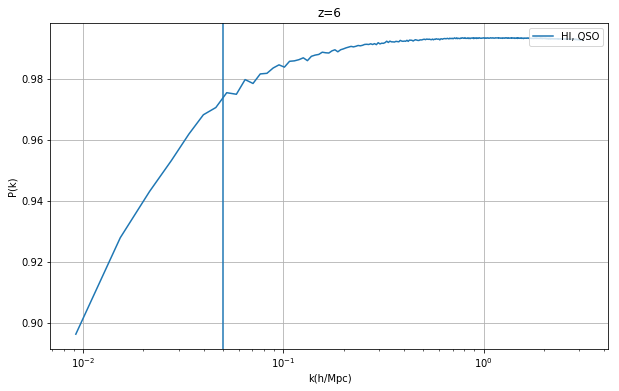

In [485]:
plt.figure(figsize = (10, 6))

zz = 4
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T


h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
h1uv2 = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T
# plt.plot(k, uv[2]**2*uv[3], label='QSO UV')
# plt.plot(k, h1uv[2]**2*h1uv[3], '--', label='HI QSO')
plt.plot(k, h1uv[1]/h1fid[1], '-', label='HI, QSO')
# plt.plot(k, h1uv2[1]/h1fid[1], '-', label='HI, QSO+Star')

plt.xscale('log')
plt.legend(loc=1)
# plt.ylim(1e3, 2e5)
plt.title('z=6')
plt.xlabel('k(h/Mpc)')
plt.ylabel('P(k)')
plt.grid()
plt.axvline(0.05)

2.34394
294.10654333099683


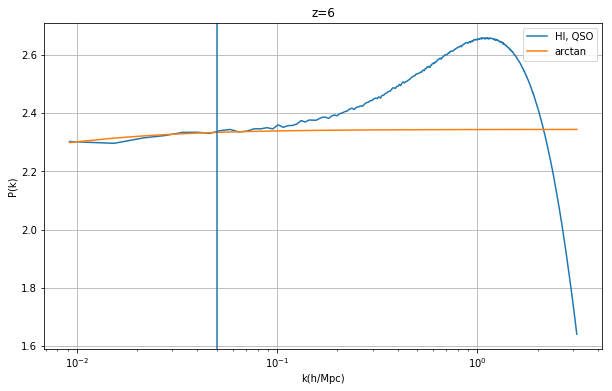

In [518]:
plt.figure(figsize = (10, 6))

zz = 3.5
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
bb = h1fid[1][1:6].mean()
print(bb)
mfpath = mfpathz(zz)*(1+zz)
print(mfpath)

h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T
# plt.plot(k, uv[2]**2*uv[3], label='QSO UV')
# plt.plot(k, h1uv[2]**2*h1uv[3], '--', label='HI QSO')
plt.plot(k, h1uv[1], '-', label='HI, QSO')
# plt.axhline(h1uv[1][1:6].mean())
# plt.axhline(h1fid[1][1:6].mean(), color='r')
# plt.plot(k, bb - uv[1]*0.12, '-', label='HI, QSO')
plt.plot(k, bb - arctan(k*mfpath)/k/mfpath*0.1, '-', label='arctan')

# plt.plot(k, h1uv2[1]/h1fid[1], '-', label='HI, QSO+Star')

plt.xscale('log')
plt.legend(loc=1)
# plt.ylim(1e3, 2e5)
plt.title('z=6')
plt.xlabel('k(h/Mpc)')
plt.ylabel('P(k)')
plt.grid()
plt.axvline(0.05)
# plt.xlim(1e-2, 1e-1)

Text(0, 0.5, 'b(k)')

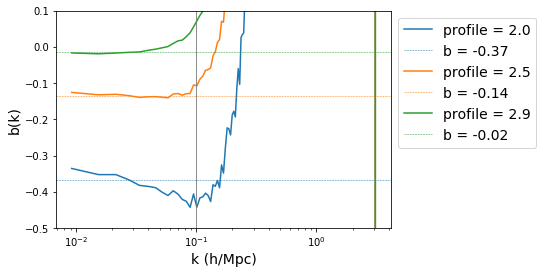

In [388]:
zz = 4
aa = 1/(zz+1)
aa
stellar = True

dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'
h1fid = np.loadtxt(dpath + '/HI_bias_{:.4f}.txt'.format(aa)).T
lum = np.loadtxt(dpath + 'uvbg/Lum_bias_{:.4f}.txt'.format(aa)).T
if stellar :
    uv = np.loadtxt(dpath + 'uvbg/UVbg_star_bias_{:.4f}.txt'.format(aa)).T
else: 
    uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T

k, p = h1fid[0], h1fid[3]

def solvequad(a, b, c, plus=True):
    if plus: return (-b + (b**2 - 4*a*c)**0.5) / 2 /a
    else: return (-b - (b**2 - 4*a*c)**0.5) / 2 /a

pg = uv[1]**2*uv[3]
pmg = uv[1]*uv[3]
ph1 = h1fid[2]**2*h1fid[3]
b1m = h1fid[1]
pm  = uv[3]

for ip, profile in enumerate([2.0, 2.5, 2.9]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    h1uv = np.loadtxt(dpath + 'HI_UVbg_{}_star_bias_{:6.4f}.txt'.format( ap, aa)).T
    ph1g = h1uv[2]**2*h1uv[3]
    bb = np.zeros_like(pg)
    for i in range(pg.size):
        bb[i] = solvequad(pg[i], 2*b1m[i]*pmg[i], ph1[i]-ph1g[i])
    plt.plot(k, bb, label='profile = %.1f'%profile)
#     bmean = bb[k<0.1][1:].mean()
    bmean = bb[1:6].mean()
    plt.axhline(bmean, color='C%d'%ip, lw=0.5, ls='--', label = 'b = %0.2f'%bmean)
    plt.axvline(.1, color='gray', lw=0.5)

plt.xscale('log')
plt.ylim(-.5, .1)    
plt.legend(fontsize=fsize, ncol=1, bbox_to_anchor=(1, 1))
plt.xlabel('k (h/Mpc)', fontsize=fsize)
plt.ylabel('b(k)', fontsize=fsize)

Text(0, 0.5, 'P(k)')

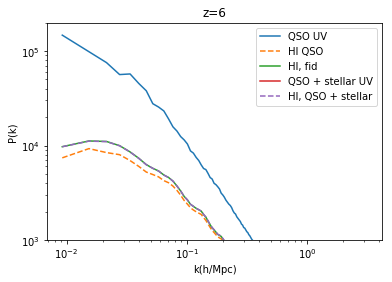

In [447]:

zz = 6
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
h1uv2 = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T
plt.plot(k, uv[2]**2*uv[3], label='QSO UV')
plt.plot(k, h1uv[2]**2*h1uv[3], '--', label='HI QSO')
plt.plot(k, h1fid[2]**2*h1fid[3], '-', label='HI, fid')

uv = np.loadtxt(dpath + 'uvbg/UVbg_star_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T
plt.plot(k, uv[2]**2*uv[3], label='QSO + stellar UV')
plt.plot(k, h1uv[2]**2*h1uv[3], '--', label='HI, QSO + stellar')
plt.loglog()

plt.legend(loc=1)
plt.ylim(1e3, 2e5)
plt.title('z=6')
plt.xlabel('k(h/Mpc)')
plt.ylabel('P(k)')

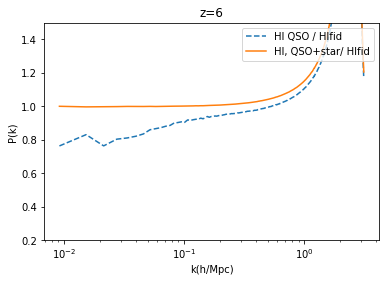

In [452]:

zz = 6
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
h1uv2 = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_star_bias_{:.4f}.txt'.format(aa)).T

pfid = h1fid[2]**2*h1fid[3]
p1 = h1uv[2]**2*h1uv[3]
p2 = h1uv2[2]**2*h1uv2[3]

plt.plot(k, p1/pfid, '--', label='HI QSO / HIfid')
plt.plot(k, p2/pfid , '-', label='HI, QSO+star/ HIfid')

plt.legend(loc=1)
plt.ylim(.2, 1.5)
plt.title('z=6')
plt.xlabel('k(h/Mpc)')
plt.ylabel('P(k)')
plt.xscale('log')

(10, 20000.0)

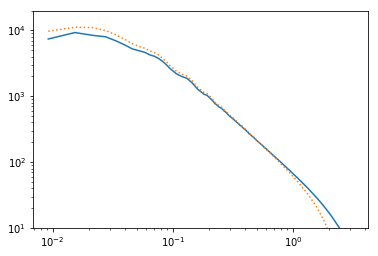

In [429]:
zz = 6
aa = 1/(zz+1)
uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
# plt.plot(k, uv[2]**2*uv[3])
plt.plot(k, h1uv[2]**2*h1uv[3])
plt.plot(k, h1fid[2]**2*h1fid[3], ':')

# zz = 3.5
# aa = 1/(zz+1)
# uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T
# h1fid = np.loadtxt(dpath + 'HI_bias_{:.4f}.txt'.format(aa)).T
# h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_ap2p5_bias_{:.4f}.txt'.format(aa)).T
# # plt.plot(k, uv[2]**2*uv[3])
# plt.plot(k, h1uv[2]**2*h1uv[3], '-')
# plt.plot(k, h1fid[2]**2*h1fid[3], ':')

plt.loglog()
plt.ylim(10, 2e4)

[3.72723517 0.1306005 ]
[3.7062595  0.64065998]
[ 3.73015209 -0.36568178]


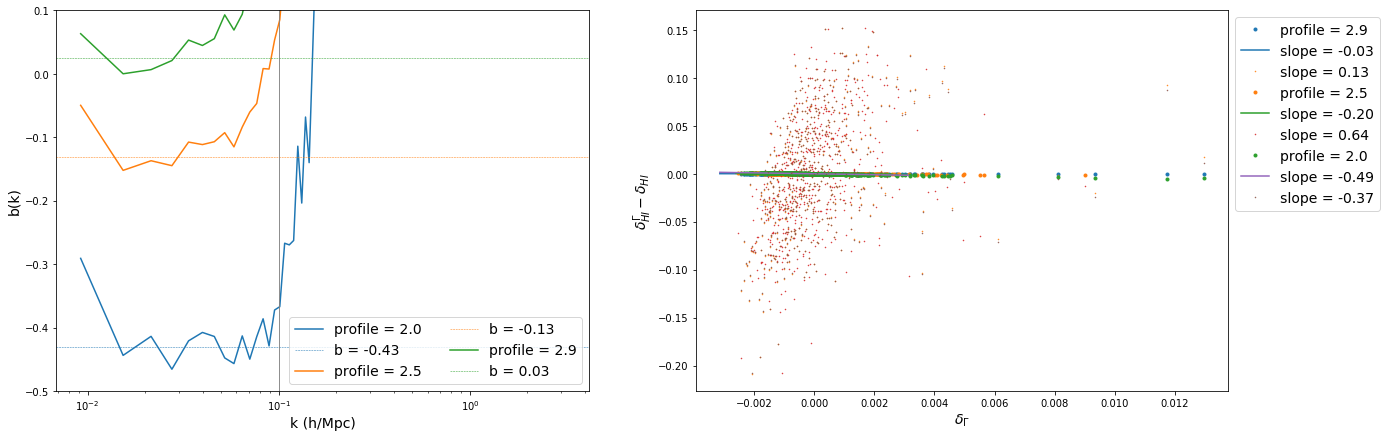

In [565]:
zz = 6
aa = 1/(zz+1)
aa
stellar = True

dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'
h1fid = np.loadtxt(dpath + '/HI_bias_{:.4f}.txt'.format(aa)).T
lum = np.loadtxt(dpath + 'uvbg/Lum_bias_{:.4f}.txt'.format(aa)).T
if stellar :
    uv = np.loadtxt(dpath + 'uvbg/UVbg_star_bias_{:.4f}.txt'.format(aa)).T
else: 
    uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T

k, p = h1fid[0], h1fid[3]


fsize = 14

plt.figure(figsize = (21, 7))

ax = plt.subplot(1, 2, 1)
pg = uv[1]**2*uv[3]
pmg = uv[1]*uv[3]
ph1 = h1fid[2]**2*h1fid[3]
b1m = h1fid[1]

for ip, profile in enumerate([2.0, 2.5, 2.9]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    if stellar:
        h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_{}_star_bias_{:6.4f}.txt'.format( ap, aa)).T
    else: 
        h1uv = np.loadtxt(dpath + 'uvbg/HI_UVbg_{}_bias_{:6.4f}.txt'.format( ap, aa)).T
    ph1g = h1uv[2]**2*h1uv[3]
    bb = np.zeros_like(pg)
    for i in range(pg.size):
        bb[i] = solvequad(pg[i], 2*b1m[i]*pmg[i], ph1[i]-ph1g[i])
    plt.plot(k, bb, label='profile = %.1f'%profile)
#     bmean = bb[k<0.1][1:].mean()
    bmean = bb[1:6].mean()
    plt.axhline(bmean, color='C%d'%ip, lw=0.5, ls='--', label = 'b = %0.2f'%bmean)
    plt.axvline(.1, color='gray', lw=0.5)
    
plt.xscale('log')
plt.ylim(-.5, .1)    
plt.legend(fontsize=fsize, ncol=2)
plt.xlabel('k (h/Mpc)', fontsize=fsize)
plt.ylabel('b(k)', fontsize=fsize)



ax = plt.subplot(1, 2, 2)
# for ip, profile in enumerate([2.0, 2.5, 2.9]):
for ip, profile in enumerate([2.9, 2.5, 2.0]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    if stellar: 
        scat = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/uvbg/scatter_star_n08_{}_{:6.4f}.txt'.format(ap, aa)).T
    else: 
        scat = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/uvbg/scatter_n08_{}_{:6.4f}.txt'.format(ap, aa)).T
    
    for i in range(scat.shape[0]): scat[i] = scat[i]/scat[i].mean()-1
    mean, std = scat[7].mean(), scat[7].std()
#     mask = (scat[7] > mean - 2*std) & (scat[7] < mean + 2*std)
    
    m, c = np.polyfit(scat[7][mask], (scat[5][mask]-scat[4][mask]), deg=1)
    fit = HuberRegressor().fit(scat[7].reshape(-1,1), scat[5]-scat[4])
    m, c = fit.coef_, fit.intercept_
    plt.plot(scat[7][mask], (scat[5][mask]-scat[4][mask]), 'C%d.'%ip, label='profile = %0.1f'%profile)
    
    xx = np.linspace(mean - 2*std, mean+2*std)
    plt.plot(xx, xx*m +c, '', label='slope = %.2f'%m, ms=1)    
    
#     tmp = HuberRegressor().fit(scat[[3, 7]].T[mask], scat[5][mask])
    tmp = HuberRegressor().fit(scat[[3, 7]].T, scat[5])
    m1, m2 = tmp.coef_
    plt.plot(scat[7], scat[3]*m1 + scat[7]*m2  +tmp.intercept_, '.', label='slope = %.2f'%m2, ms=1)    
    print(tmp.coef_    )

    plt.legend(bbox_to_anchor=(1, 1), fontsize=fsize)
    plt.xlabel('$\delta_\Gamma$', fontsize=fsize)
    plt.ylabel('$\delta^\Gamma_{HI}-\delta_{HI}$', fontsize=fsize)

b1 percent change - -2.036
b1 percent change - -2.074
b1 percent change - -2.092


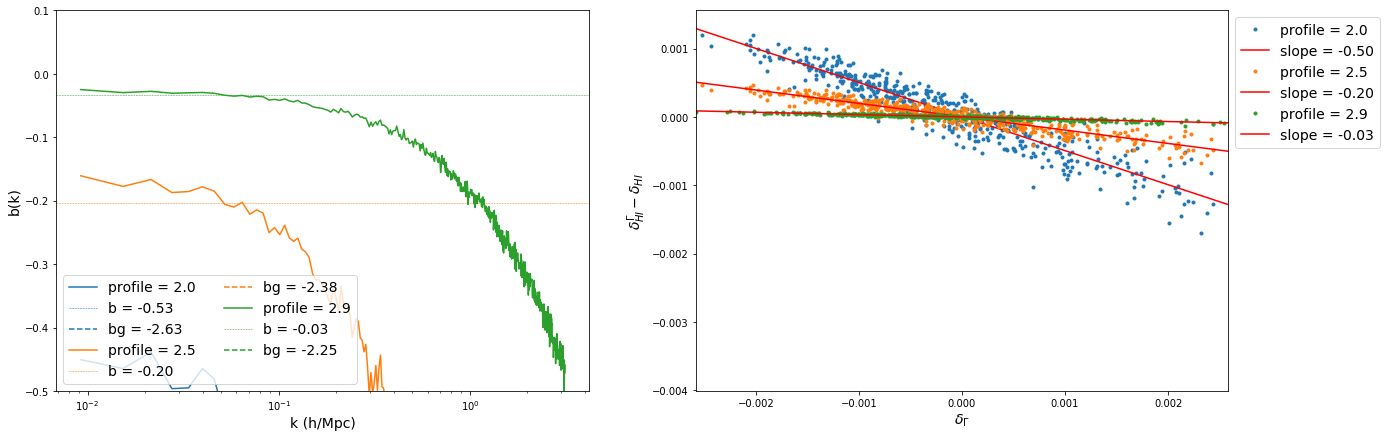

In [672]:
from sklearn.linear_model import LinearRegression, HuberRegressor

zz = 6
aa = 1/(zz+1)
aa
stellar = True
mfpath = mfpathz(zz)*(1+zz)

dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/'
h1fid = np.loadtxt(dpath + '/HI_bias_{:.4f}.txt'.format(aa)).T
lum = np.loadtxt(dpath + 'uvbg/Lum_bias_{:.4f}.txt'.format(aa)).T
if stellar :
    uv = np.loadtxt(dpath + 'uvbg/UVbg_star_bias_{:.4f}.txt'.format(aa)).T
else: 
    uv = np.loadtxt(dpath + 'uvbg/UVbg_bias_{:.4f}.txt'.format(aa)).T

k, p = h1fid[0], h1fid[3]



fsize = 14

plt.figure(figsize = (21, 7))

ax = plt.subplot(1, 2, 1)
pg = uv[1]**2*uv[3]
pmg = uv[1]*uv[3]
ph1 = h1fid[2]**2*h1fid[3]
b1m = h1fid[1]
pm  = uv[3]
b1fid = b1m[1:6].mean()

for ip, profile in enumerate([2.0, 2.5, 2.9]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    if stellar: h1uv = np.loadtxt(dpath + 'HI_UVbg_{}_star_bias_{:6.4f}.txt'.format( ap, aa)).T
    else: h1uv = np.loadtxt(dpath + 'HI_UVbg_{}_bias_{:6.4f}.txt'.format( ap, aa)).T
    ph1g = h1uv[2]**2*h1uv[3]
    
#     bb = np.zeros_like(pg)
#     for i in range(pg.size):
#         bb[i] = solvequad(pg[i], 2*b1m[i]*pmg[i], ph1[i]-ph1g[i])
#     plt.plot(k, bb, label='profile = %.1f'%profile)
#     bmean = bb[k<0.1][1:].mean()
#     plt.axhline(bmean, color='C%d'%ip, lw=0.5, ls='--', label = 'b = %0.2f'%bmean)
    
    bb = (h1uv[1] - h1fid[1])/uv[1]
    plt.plot(k, bb, label='profile = %.1f'%profile)
    bmean = bb[k<0.1][1:].mean()
    plt.axhline(bmean, color='C%d'%ip, lw=0.5, ls='--', label = 'b = %0.2f'%bmean)

    kmax = 10
    kmax = np.where(k>0.05)[0][0]
    wts = True
    def fitfunc(p, kmax=kmax, wts=wts):
        b1, bg = p
        if wts is None: wt = 1
        else: wt = k[1:kmax]
        return sum(wt*(b1 + bg*uv[1][1:kmax] - h1uv[1][1:kmax])**2)
    b1new, bg = minimize(fitfunc, [b1fid, 0], method='Nelder-Mead').x
    plt.axhline(bg, ls='--', color='C%d'%ip, label = 'bg = %0.2f'%bg)
#     print('qso, spectrum', b1fid, b1new, bg)      
    print('b1 percent change - %.3f'% (100*(b1fid- b1new)/b1fid))      


plt.xscale('log')
plt.ylim(-.5, .1)    
plt.legend(fontsize=fsize, ncol=2)
plt.xlabel('k (h/Mpc)', fontsize=fsize)
plt.ylabel('b(k)', fontsize=fsize)

ax = plt.subplot(1, 2, 2)
for ip, profile in enumerate([2.0, 2.5, 2.9]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    if stellar : scat = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/scatter_star_n08_{}_{:6.4f}.txt'.format(ap, aa)).T
    else: scat = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/scatter_n08_{}_{:6.4f}.txt'.format(ap, aa)).T
    
    for i in range(scat.shape[0]): scat[i] = scat[i]/scat[i].mean() - 1
    mean, std = scat[7].mean(), scat[7].std()
    xx = np.linspace(mean - 2*std, mean+2*std)

    mask = np.ones_like(scat[7]).astype('bool')
#     mask = (scat[7] > mean - 2*std) & (scat[7] < mean + 2*std)
    plt.plot(scat[7][mask], (scat[5][mask]-scat[4][mask]), 'C%d.'%ip, label='profile = %0.1f'%profile)

#     tmp = LinearRegression().fit(scat[7].reshape(-1,1), scat[5]-scat[4])
#     m, c = tmp.coef_, tmp.intercept_ 
#     print(m, c)
#     plt.plot(xx, xx*m +c, 'k-', label='slope = %.2f'%m, ms=1)    
    
    tmp = HuberRegressor().fit(scat[7].reshape(-1,1), scat[5]-scat[4])
    m, c = tmp.coef_, tmp.intercept_
    plt.plot(xx, xx*m +c, 'r-', label='slope = %.2f'%m, ms=1)    

#     tmp = HuberRegressor().fit(scat[7].reshape(-1,1), scat[5]-b1new*scat[3])
#     m, c = tmp.coef_, tmp.intercept_
#     plt.plot(xx, xx*m +c, 'r-', label='slope = %.2f'%m, ms=1)    

#     tmp = HuberRegressor().fit(scat[[3, 7]], scat[5])
#     m1, c = tmp.coef_, tmp.intercept_
#     plt.plot(xx, xx*m +c, 'r-', label='slope = %.2f'%m, ms=1)    

    plt.xlim(xx.min(), xx.max())
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=fsize)
    plt.xlabel('$\delta_\Gamma$', fontsize=fsize)
    plt.ylabel('$\delta^\Gamma_{HI}-\delta_{HI}$', fontsize=fsize)

3.2176099999999996


[]

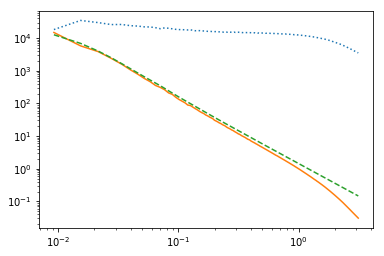

In [670]:
bb = lum[1][1:6].mean()
print(bb)
pm = uv[3].copy()
fac = np.arctan(k*mfpath)/k/mfpath

plt.plot(k, lum[2]**2*lum[3], ':')
plt.plot(k, uv[2]**2*uv[3], '-')
plt.plot(k, (bb**2*pm + 2e4)*fac**2, '--')

# plt.plot(k, h1fid[1])
# plt.plot(k, h1uv[1])
# # plt.plot(k, (h1uv[1] - b1fid))
# # plt.plot(k, (h1uv[1] - b1fid)/uv[1])
plt.loglog()

In [253]:
tmp = LinearRegression().fit(scat[7].reshape(-1,1), scat[4]-scat[5])
tmp.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [255]:
tmp.coef_, tmp.intercept_

(array([0.02079542]), -0.020795422568534252)

In [209]:

from scipy.optimize import curve_fit as cf

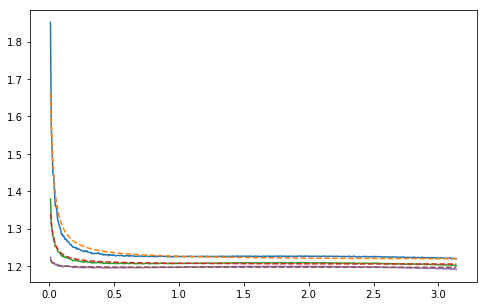

In [214]:
fsize = 14
mfpath = mfpathz(zz)*(1+zz)

plt.figure(figsize = (8, 5))

# ax = plt.subplot(1, 2, 1)
pg = uv[1]**2*uv[3]
pmg = uv[1]*uv[3]
ph1 = h1fid[2]**2*h1fid[3]
b1m = h1fid[1]
pm  = uv[3]

def tmpf(x, a, b):
    return a*x + b

for ip, profile in enumerate([2.0, 2.5, 2.9]):
    ap = 'ap{:1.0f}p{:1.0f}'.format((profile*10)//10, (profile*10)%10)
    h1uv = np.loadtxt(dpath + 'HI_UVbg_{}_bias_{:6.4f}.txt'.format( ap, aa)).T
    
    plt.plot(k, h1fid[1]/h1uv[1])
    
    xx = (arctan(k*mfpath)/k/mfpath)**1
    fa, fb = cf(tmpf, xx, h1fid[1]/h1uv[1])[0]
#     print(fa, fb)
    plt.plot(k, fb+fa*xx, '--')

### Blackhole minimize

In [ ]:
from scipy.optimize import minimize


In [28]:
zz = 5   
aa = 1/(1+zz)
dpath = '/project/projectdirs/m3127/H1mass/'
scratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'
bs, nc = 256, 128
sim = '/highres/%d-9100-fixed'%2560

halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
cencat = BigFileCatalog(scratch + sim+ '/fastpm_%0.4f/cencat-m1_00p3mh-alpha-0p8-subvol/'%aa)
satcat = BigFileCatalog(scratch  + sim+ '/fastpm_%0.4f/satcat-m1_00p3mh-alpha-0p8-subvol/'%aa)
hmass = halos['Mass'].compute()
cmass = cencat['Mass'].compute()
smass = satcat['Mass'].compute()

#     allmass = np.concatenate((cmass, smass))
allmass = hmass
mgal = moster(allmass, zz, scatter=0.3)
mgalshuffle = np.random.permutation(mgal)


NameError: name 'moster' is not defined

In [259]:
from scipy.optimize import Bounds

In [ ]:
Bounds()

In [250]:


def qlftomin(p):
    fon, alpha, beta = p
    mgalon = mgalshuffle[:int(fon*mgal.size)]
    mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
    lum = lq(mb, eta=0.1, scatter=0.3)
    mag14 = 72.5+0.29- 2.5*np.log10(lum)

    nmag14, xmag14 = np.histogram(mag14, magbins)
    xmag14 = -(xmag14[:-1]*xmag14[1:])**0.5
    nmag14 = nmag14/np.diff(magbins)[0]
    lmag14, _ = np.histogram(mag14, magbins, weights=lum/lum.sum())
    lmag14 = lmag14/np.diff(magbins)[0]
    
    ntrue = qlf(magbins, zz)*(bs/h)**3
    ntrue = qlf(xmag14, zz)*(bs/h)**3
    
    chisq = ((ntrue - nmag14)**2 * lmag14).sum()
    return chisq


niter = 0

def callback(xk):
    global niter
    if niter%10==0:
        print('For iteration : ', niter)
        print(xk)
    niter +=1

    
    p0 = [1e-2, -3.5, 1]
qlftomin(p0)
xx = minimize(qlftomin, p0, method='BFGS', callback=callback)
# xx = minimize(qlftomin, p0, method='Nelder-Mead', callback=callback, options={'maxfev':10000})



KeyboardInterrupt: 

In [235]:
xx

 final_simplex: (array([[ 0.01  , -3.5875,  1.    ],
       [ 0.01  , -3.5875,  1.    ],
       [ 0.01  , -3.5875,  1.    ],
       [ 0.01  , -3.5875,  1.    ]]), array([4.69121395e+38, 1.77799254e+39, 3.46647711e+39, 3.79575464e+39]))
           fun: 4.691213945136267e+38
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 10000
           nit: 3738
        status: 1
       success: False
             x: array([ 0.01  , -3.5875,  1.    ])

In [282]:
p0 = [1e-2, -3.5, 1]
p1 = [ 0.011 , -1.1, 1.17]


In [283]:
qlftomin(p0), qlftomin(p1)

(70670563525.23936, 30181847.207661495)

No handles with labels found to put in legend.


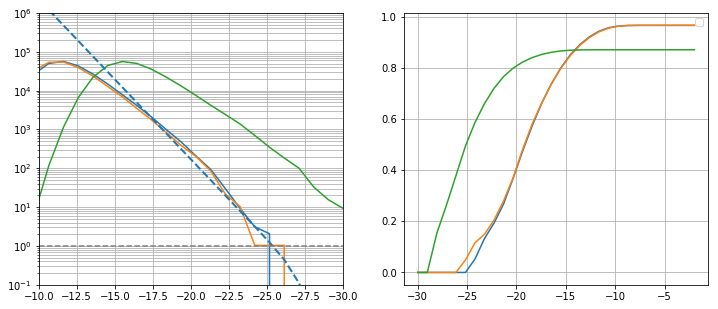

In [284]:

fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 


for fon, alpha, beta in [p0, xx.x, p1]:
    mgalon = mgalshuffle[:int(fon*mgal.size)]
    mb = mbh(mgalon, scatter=0.3, alpha=alpha, beta=beta)
    lum = lq(mb, eta=0.1, scatter=0.3)
    mag14 = 72.5+0.29- 2.5*np.log10(lum)

    nmag14, xmag14 = np.histogram(mag14, magbins)
    xmag14 = xmag14[:-1]
    nmag14 = nmag14/np.diff(magbins)[0]

    ax[0].plot(xmag14, nmag14, )


    lmag14, _ = np.histogram(mag14, magbins, weights=lum)
    lmag14 = lmag14/np.diff(magbins)[0]
    frac = [np.trapz(lmag14[:i]/lmag14.sum(), xmag14[:i]) for i in range(len(lmag14))]
    ax[1].plot(xmag14, frac)

ax[0].plot(magbins, qlf(magbins, zz)*(bs/h)**3, 'C%d--'%iz, lw=2)

ax[0].axhline(1, color='grey', ls='--')

ax[0].set_yscale('log')
ax[0].set_xlim(-10, -30)
ax[0].set_ylim(0.1, 1e6)
plt.legend()
for axis in ax: axis.grid(which='both')

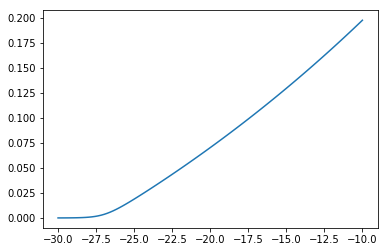

In [291]:
def mtol(mag):
    return 10**((mag - 72.5-0.29)/- 2.5)

magbins = np.linspace(-30, -10, 100)
ntrue = qlf(magbins, zz)*(bs/h)**3
ltrue = mtol(magbins)
ltruebin = ltrue*ntrue*np.diff(magbins)[0]
frac = [np.trapz(ltruebin[:i]/ltruebin.sum(), magbins[:i]) for i in range(len(ltruebin))]
plt.plot(magbins, frac)


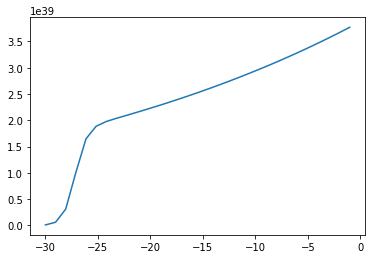

In [275]:
plt.plot(magbins, ltruebin)
# plt.yscale('log')

# Nowiggle

In [464]:
klin, plin = np.loadtxt('../data/pk_Planck2018BAO_matterpower_z000.dat', unpack=True)
mask = (klin > 5e-2) & (klin < 0.5)

klin = klin[mask]
plin = plin[mask]

In [485]:
from scipy.signal import savgol_filter
from scipy.interpolate import LSQUnivariateSpline as Spline
import scipy.interpolate as interpolate

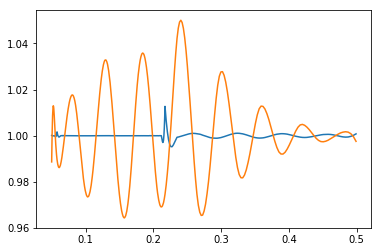

In [508]:

ss  = savgol_filter(plin, 21, polyorder=2)
plt.plot(klin, plin/ss)

knots=np.arange(0.055,0.45,0.03)
ss  = Spline(klin, plin,t=knots)
plt.plot(klin, plin/ss(klin))

# ss2  = savgol_filter(plin/ss(klin), 21, polyorder=2)
# plt.plot(klin, ss(klin)/ss2)

# t, c, k = interpolate.splrep(klin, plin, s=200, k=5)
# # ss  = Spline(klin, plin,t=np.unique(t))
# ss = interpolate.BSpline(t, c, k, extrapolate=False)
# plt.plot(klin, plin/ss(klin))

# plt.xscale('log')
# plt.loglog()

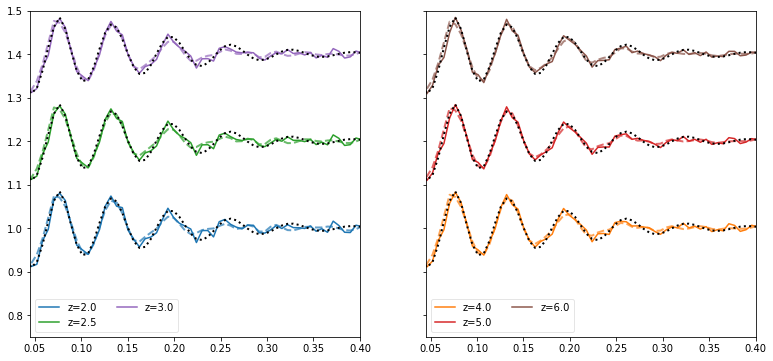

In [574]:
suff = 'm1_00p3mh-alpha-0p8-subvol-big'
bs = 1024
dpath = '../data/outputs/%s/%s/'%(suff, 'ModelA')



ius = interpolate.InterpolatedUnivariateSpline

svfilter = True
zlist = [2.0,4.0,2.5,5.0,3.0,6.0]
winsize = 19
polyorder = 2

fig,ax = plt.subplots(1,2,figsize=(13,6),sharey=True)
ii,jj  = 0,0
for iz, zz in enumerate(zlist):
    # Read the data from file.                                                                                                                                                                                                                                                        
    aa  = 1.0/(1.0+zz)
    pkd = np.loadtxt(dpath + "HI_bias_{:06.4f}.txt".format(aa))[1:,:]
    #redshift space                                                                                                                                                                                                                                                                   
    pks = np.loadtxt(dpath + "HI_pks_1d_{:06.4f}.txt".format(aa))[1:,:]
#     pks = np.interp(pkd[:,0],pks[:,0],pks[:,1])
    pks = ius(pks[:,0],pks[:,1])(pkd[:,0])

    # Now read linear theory and put it on the same grid -- currently                                                                                                                                                                                                                 
    # not accounting for finite bin width.                                                                                                                                                                                                                                            
    lin = np.loadtxt("../data/pklin_{:6.4f}.txt".format(aa))
    lin = ius(lin[:,0],lin[:,1])(pkd[:,0])
#     lin = np.interp(pkd[:,0],lin[:,0],lin[:,1])

    # Take out the broad band.                                                                                                                                                                                                                                                        
    if not svfilter: # Use smoothing spline as broad-band/no-wiggle.                                                                                                                                                                                                                  
        knots=np.arange(0.05,0.5,0.03)
        
        ps = pkd[:,2]**2 *pkd[:,3]
        ss  = Spline(pkd[:,0],ps,t=knots)
        rat = ps/ss(pkd[:,0])

#         pks = np.loadtxt(dpath + "HI_pks_1d_{:06.4f}.txt".format(aa))[1:,:]
#         ss  = Spline(pks[:,0],pks[:, 1],t=knots)
#         pks = interpolate.InterpolatedUnivariateSpline(pks[:, 0], pks[:, 1])(pkd[:, 0])
        ss  = Spline(pkd[:,0],pks,t=knots)
        rats = pks/ss(pkd[:,0])

#         lin = np.loadtxt("../data/pklin_{:6.4f}.txt".format(aa))
#         ss  = Spline(lin[:,0],lin[:, 1],t=knots)
#         lin = interpolate.InterpolatedUnivariateSpline(lin[:, 0], lin[:, 1])(pkd[:, 0])
        ss  = Spline(pkd[:,0],lin,t=knots)
        ratlin = lin/ss(pkd[:,0])
    else:   # Use Savitsky-Golay filter for no-wiggle.                                                                                                                                                                                                                                
        ps = pkd[:,2]**2 *pkd[:,3]
        ss  = savgol_filter(ps, winsize,polyorder=polyorder)
        rat = ps/ss
        ss  = savgol_filter(pks, winsize ,polyorder=polyorder)
        rats = pks/ss
        ss  = savgol_filter(lin,winsize,polyorder=polyorder)
        ratlin = lin/ss

    ax[ii].plot(pkd[:,0],rat+0.2*(jj//2),'C%d-'%iz,\
                label="z={:.1f}".format(zz))
    ax[ii].plot(pkd[:,0],rats+0.2*(jj//2),'C%d--'%iz, alpha=0.7, lw=2)
    ax[ii].plot(pkd[:,0],ratlin+0.2*(jj//2),'k:', lw=2)

    ii = (ii+1)%2
    jj =  jj+1

for ii in range(ax.size):
    ax[ii].legend(ncol=2,framealpha=0.5)
    ax[ii].set_xlim(0.045,0.4)
    ax[ii].set_ylim(0.75,1.5)


# Extrap non lin PS

[]

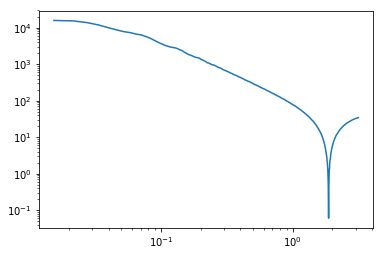

In [652]:
zz = 2
aa = 1/(zz+1)
pkd = np.loadtxt(dpath + "HI_bias_{:06.4f}.txt".format(aa))[1:,:]
kk, pk = pkd[:, 0], pkd[:, 2]**2 * pkd[:, 3]
plt.plot(kk, pk)
plt.loglog()

[]

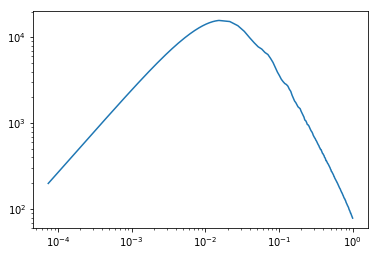

In [741]:
klin, plin = np.loadtxt('../data/pk_Planck2018BAO_matterpower_z000.dat', unpack=True)
ipklin = ius(klin, plin)

kt = np.concatenate((klin[(klin < kk[0])], kk))
pt = np.concatenate((plin[(klin < kk[0])]*pk[0]/ipklin(kk[0]), pk))

pt = pt[kt<1]
kt = kt[kt<1]
plt.plot(kt, pt)
plt.loglog()

In [742]:
from scipy.interpolate import interp1d
from scipy.misc import derivative

Left slope = 0.968 at point  2
Rigth slope = -2.919 at point  -6
Left slope = 0.968 at point  2
Rigth slope = -2.769 at point  -2


[]

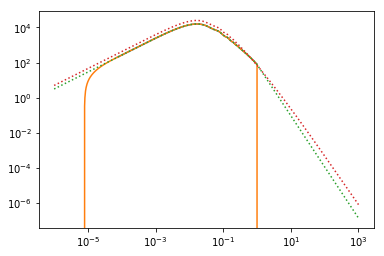

In [743]:
ipktest = ius(kt, pt, k=4)
# ipktest = interp1d(kt, pt, fill_value='extrapolate')
ilpktest = tools.loginterp(kt, pt)
ilpklin = tools.loginterp(klin, plin)

ktest = np.logspace(-6, 3, 1000)
plt.plot(kt, pt)
plt.plot(ktest, ipktest(ktest))
plt.plot(ktest, ilpktest(ktest), ':')
plt.plot(ktest, ilpklin(ktest), ':')

plt.loglog()
# plt.ylim(1e-0, 1e5)

In [808]:
from scipy.special import spherical_jn


ktest = np.logspace(-6, 1, 10000)
ptest = ilpktest(ktest)

del2 = ktest**3*ptest/2/np.pi**2
del2lin = klin**3*plin/2/np.pi**2
j0 = lambda x: spherical_jn(0, x)


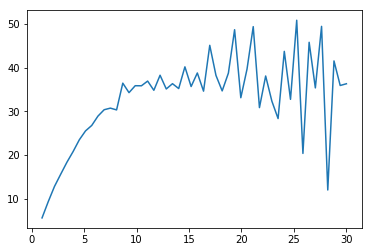

In [793]:
rlin = np.linspace(1, 30)
xilin = np.zeros_like(rlin)
for i in range(rlin.size): xilin[i] = simps(del2lin*j0(klin*rlin[i])/klin, klin)
xitest = np.zeros_like(rlin)
for i in range(rlin.size): xitest[i] = simps(del2*j0(ktest*rlin[i])/ktest, ptest)

# plt.plot(rlin, xitest)
plt.plot(rlin, rlin**2*xilin)

In [775]:
from scipy.integrate import quad, quadrature, romberg, romb

In [754]:
quadrature(f, 1e-6, 1e2)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.705938e-01
  AccuracyWarning)


(0.27969024765165507, 0.27059381498450924)

In [794]:
rlin = np.linspace(1, 120, 30)

def xif(k, r):
    return k**3*ilpklin(k)/2/np.pi**2 *j0(k*r)/k
    

results = []
for i in range(rlin.size):
    f = lambda k: xif(k, rlin[i])
    print(f(1e-6), f(1e-2))
    results.append(quadrature(f, 1e-6, 1e2, maxiter=500))
#     results.append(romberg(f, 1e-6, 1e2, divmax=50))
    
# xilin = np.zeros_like(rlin)
# for i in range(rlin.size): xilin[i] = simps(del2lin*j0(klin*rlin[i])/klin, klin)
# xitest = np.zeros_like(rlin)
# for i in range(rlin.size): xitest[i] = simps(del2*j0(ktest*rlin[i])/ktest, ptest)

# # plt.plot(rlin, xitest)
# plt.plot(rlin, rlin**2*xilin)

In [831]:
from mcfit import P2xi

ktest = np.logspace(-4, 2, 100000)
ptest = ilpktest(ktest)
ptestlin = ilpklin(ktest)
rr, xi = P2xi(ktest)(ptest)
rr, xilin = P2xi(ktest)(ptestlin)

(1, 50)

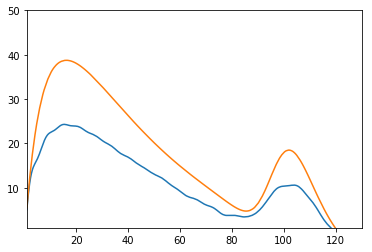

In [833]:

plt.plot(rr, rr**2*xi)
plt.plot(rr, rr**2*xilin)
# plt.plot(rlin,  np.array(results)[:, 0], '.')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(1, 130)
plt.ylim(1, 50)

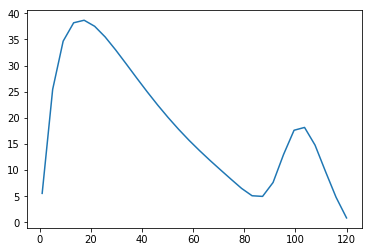

In [770]:

plt.plot(rlin, rlin**2 * np.array(results)[:, 0])
# plt.plot(rlin,  np.array(results)[:, 0], '.')
# plt.yscale('log')

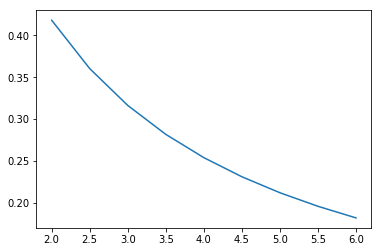

In [676]:
plt.plot(zzfiles, cosmo.scale_independent_growth_factor(zzfiles))


In [837]:
#Get ZA
zlist = [2.000,6.000]
b1lst = [0.900,2.750]
b2lst = [0.800,6.250]
alpha = [1.500,0.145]
alphad = dict(('%0.1f'%zlist[i], alpha[i]) for i in range(len(zlist)))
b1lstd = dict(('%0.1f'%zlist[i], b1lst[i]) for i in range(len(zlist)))
b2lstd = dict(('%0.1f'%zlist[i], b2lst[i]) for i in range(len(zlist)))
zz = zlist[0]
aa = 1/(1+zz)
pkz = np.loadtxt("../theory/zeld_{:6.4f}.pkr".format(aa))
kz  = pkz[:,0]
al, b1, b2 = alphad['%0.1f'%zz], b1lstd['%0.1f'%zz], b2lstd['%0.1f'%zz],
pzh = (1+al*kz**2)*pkz[:,1]+b1*pkz[:,2]+b2*pkz[:,3]+\
      b1**2*pkz[:,4]+b2**2*pkz[:,5]+b1*b2*pkz[:,6]


[]

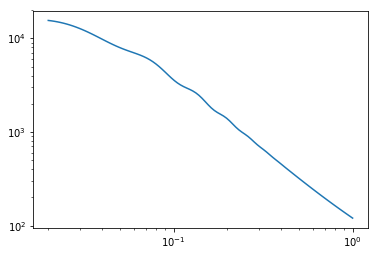

In [839]:
plt.plot(kz, pzh)
plt.loglog()

In [272]:
cosmo.efunc?

Docstring:
Background.efunc(self, z)

Function giving :math:`E(z)`, where the Hubble parameter is defined as
:math:`H(z) = H_0 E(z)`.
Type:      builtin_function_or_method


In [278]:
fsky21 = 20000/41252;

Ns = 256
Ds = 6
n0 = (Ns/Ds)**2
Ls = Ds* Ns

n = lambda u: n0 (0.4847 - 0.33 (u/Ls))/(1 + 
     1.3157 (u/Ls)^1.5974) * np.exp(-(u/Ls)^6.8390)

Tb = lambda z: 180/(cosmo.efunc(z)*100) *(4 *10^-4 *(1 + z)^0.6) *(1 + z)**2*h;

S21 = 4 *np.pi* fsky21
t0 = 5*365*24*60*60
npol = 2
Dish = 6
Aeff = np.pi* (Ds/2)**2;

FOV= lambda z: (1.22*0.211* (1 + z)/Ds)**2;

Ts = lambda z: (50 + 2.7 + 25 (1420/400/(1 + z))**-2.75)* 1000;
u = \[Chi]z[z]/(2 Pi) k Sqrt[1 - mu^2] 0.211 (1 + z)

Pn[k_, mu_, z_] := 
 Ts[z]^2 (0.211 (1 + z))^2 S21/Aeff^2/FOV[z]/t0/2/
   n[u] (\[Chi]z[
      z]^2 3 10^5 (1 + z)^2 /(1420 10^6)/100/H1z[z])

## derivatives


In [ ]:
klin, plin = np.loadtxt('../data/params_Planck2018BAO_derived.dat')

In [228]:
2*(1.05**0.5 - 1)/ (1.05**0.5 - 0.95**.5)

0.9874941339010551

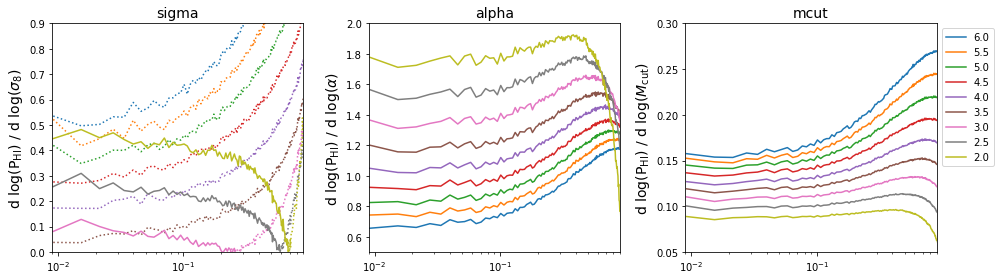

In [313]:
from HImodels import ModelC

sig80 = 0.8222
dgrow = lambda z: cosmo.scale_independent_growth_factor(z)

zz = 6
aa = 1/(zz+1)
dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/'
sgup =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up//ModelC/'
sgdn =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn//ModelC/'
apup =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/alpha_vp05/'
apdn =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/alpha_vm05/'
mcup =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/mcut_vp05/'
mcdn =  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/mcut_vm05/'

pathdict = {'sigma':[sgup, sgdn], 'alpha':[apup, apdn], 'mcut':[mcup, mcdn]}

fig, ax = plt.subplots(1, 3, figsize = (14, 4))
zlist = zzfiles

for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    diffs = [newp[i] - fidp[i] for i in range(3)]
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    lss = ['-', '--', ':']
    for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pk2)
        den = diffs[ii]*2
        deriv = num/den * fidp[ii]/pkf
        
        mask = kk<0.95
        ax[ii].plot(kk[mask], deriv[mask], 'C%d'%iz, label=zz)
        ax[ii].plot(kk[mask], -deriv[mask], 'C%d:'%iz)

        ax[ii].set_xscale('log')
#         ax[ii].set_yscale('log')
        ax[ii].set_xlim(0.009,  0.9)
        ax[ii].set_title(i, fontsize=14)
    
ax[0].set_ylim(0, 0.9)
ax[0].set_ylabel(r'd log(P$_{\rm HI}$) / d log($\sigma_8$)', fontsize=14)
ax[1].set_ylim(0.5, 2)
ax[1].set_ylabel(r'd log(P$_{\rm HI}$) / d log($\alpha$)', fontsize=14)
ax[2].set_ylim(0.05, 0.3)
ax[2].set_ylabel(r'd log(P$_{\rm HI}$) / d log($M_{\rm cut}$)', fontsize=14)
ax[2].legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

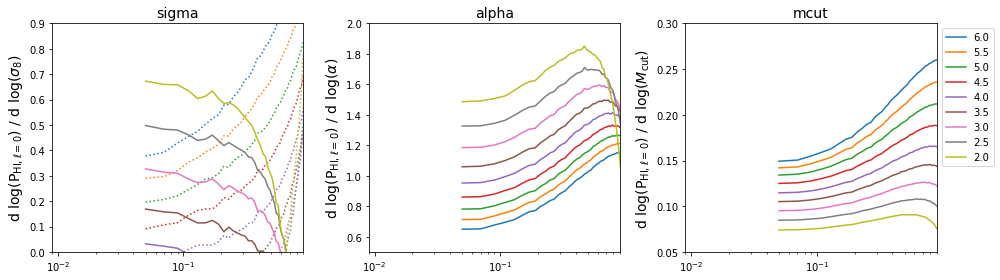

In [252]:

for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    diffs = [newp[i] - fidp[i] for i in range(3)]
    fid = np.loadtxt(dpath + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[1]
    lss = ['-', '--', ':']
    for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2 = p1[1], p2[1]
        num = (pk1 - pk2)
        den = diffs[ii]*2
        deriv = num/den * fidp[ii]/pkf
        
        mask = kk<0.95
        ax[ii].plot(kk[mask], deriv[mask], 'C%d'%iz, label=zz)
        ax[ii].plot(kk[mask], -deriv[mask], 'C%d:'%iz)

        ax[ii].set_xscale('log')
#         ax[ii].set_yscale('log')
        ax[ii].set_xlim(0.009,  0.9)
        ax[ii].set_title(i, fontsize=14)
    
ax[0].set_ylim(0, 0.9)
ax[0].set_ylabel(r'd log(P$_{\rm HI, \ell=0}$) / d log($\sigma_8$)', fontsize=14)
ax[1].set_ylim(0.5, 2)
ax[1].set_ylabel(r'd log(P$_{\rm HI, \ell=0}$) / d log($\alpha$)', fontsize=14)
ax[2].set_ylim(0.05, 0.3)
ax[2].set_ylabel(r'd log(P$_{\rm HI, \ell=0}$) / d log($M_{\rm cut}$)', fontsize=14)
ax[2].legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

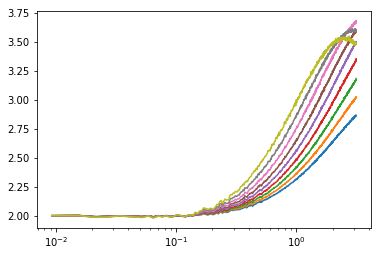

In [201]:
from HImodels import ModelC

sig80 = 0.8222
dgrow = lambda z: cosmo.scale_independent_growth_factor(z)


zlist = zzfiles
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)

    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    lss = ['-', '--', ':']
    s8 = sig80 *dgrow(zz)
    s8sq = s8**2
    
    for ii, i in enumerate(['sigma']):
     
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        pk1 , pk2, pkf = p1[3], p2[3], fid[3]
        num = (pk1 - pk2)
        den = s8*(1.05**0.5-0.95**0.5)
        deriv = num/den * s8/pkf
        
        plt.plot(kk, deriv, 'C%d'%iz)
        plt.semilogx()
#     plt.axhline(0, color='gray')
    


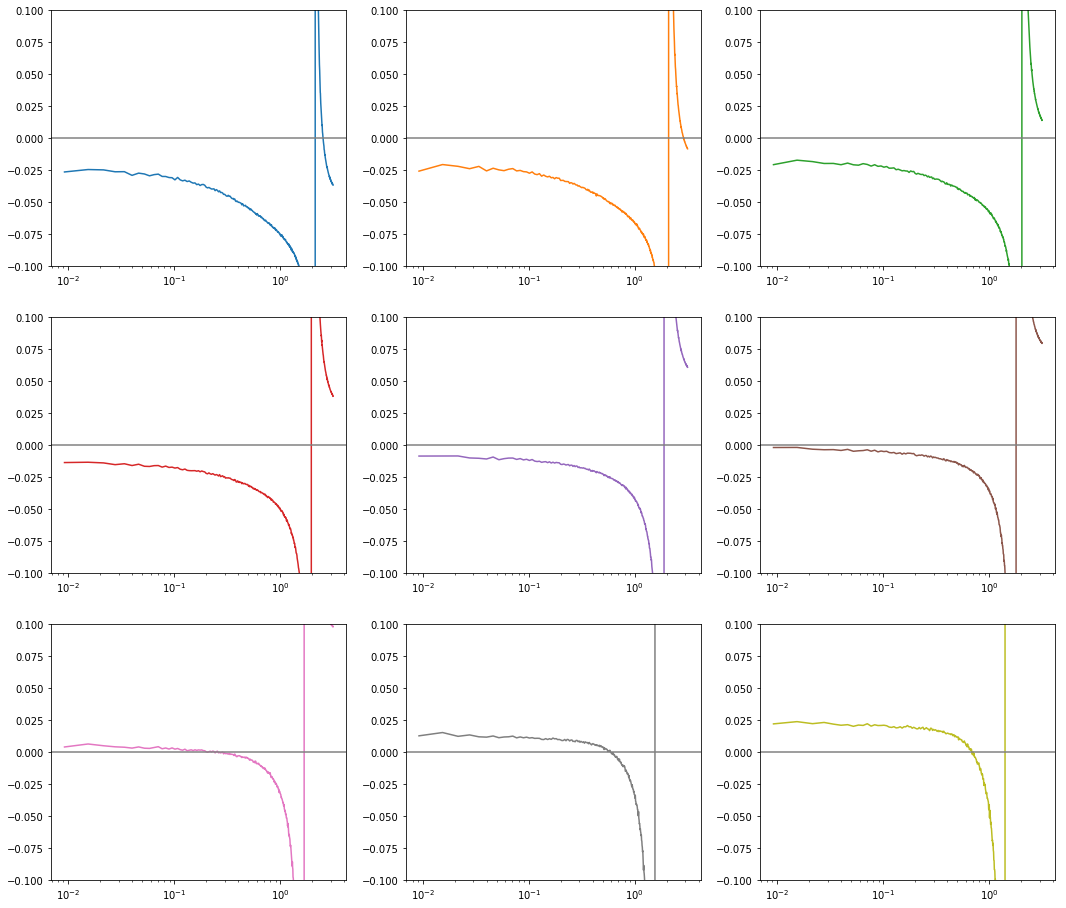

In [176]:
from HImodels import ModelC

sig80 = 0.8222
dgrow = lambda z: cosmo.scale_independent_growth_factor(z)


fig, ax = plt.subplots(3, 3, figsize = (18, 16))
zlist = zzfiles
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)

    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    lss = ['-', '--', ':']
    s8 = sig80 *dgrow(zz)
    s8sq = s8**2
    axis = ax.flatten()[iz]
    for ii, i in enumerate(['sigma']):
     
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
#         axis.plot(kk, pk1, 'C%d'%iz)
#         axis.plot(kk, pk2, 'C%d--'%iz)
#         axis.plot(kk, pkf, 'k:')
#         axis.loglog()
        axis.plot(kk, (pk1-pk2)/pkf, 'C%d'%iz)
        axis.semilogx()
    axis.axhline(0, color='gray')
    axis.set_ylim(-0.1, .1)


Text(0.5, 0, 'k (h/Mpc)')

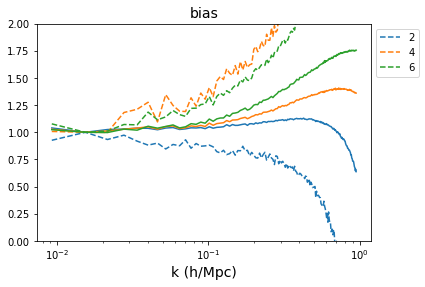

In [398]:

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:newp[i] - fidp[i] for i in range(3)}
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
    
    lss = ['-', '--', ':']
    
    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pk2)
        den = diffs[i]*2
        deriv = num/den * fidp[ii]/pkf
        
        mask = kk<0.95
        plt.plot(kk[mask], deriv[mask]/deriv[mask][1], 'C%d--'%iz, label=zz)
#         plt.plot(kk[mask], -deriv[mask], 'C%d:'%iz)


    derivba, derivbx = 0, 0
#     for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
    for ii, i in enumerate(['mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()
        pk1 , pk2 = p1[2]**2*p1[3], p2[2]**2*p2[3]

        dbba = (bb1a - bb2a)/(diffs[i]*2)
        dbbx = (bb1x - bb2x)/(diffs[i]*2)
        deriv = (pk1-pk2)/(diffs[i]*2)
        derivba += deriv/dbba
        derivbx += deriv/dbbx

    derivba, derivbx = derivba/pkf*bba, derivbx/pkf*bbx
    mask = kk<0.95
#     plt.plot(kk[mask], derivba[mask], 'C%d'%iz)
    plt.plot(kk[mask], derivba[mask]/derivba[mask][1], 'C%d'%iz)
#     plt.plot(kk[mask], derivbx[mask]/2, 'C%d--'%iz)

plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 2)
plt.title('bias', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)


In [323]:
(np.log10(mcutd) - np.log10(mcut0))/np.log10(mcut0)

0.05

Text(0, 0.5, 'd log(b$_a$) / d log(p)')

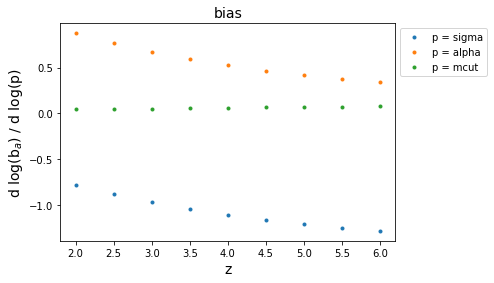

In [310]:
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

    diffs = [newp[i] - fidp[i] for i in range(3)]
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
    
    lss = ['-', '--', ':']
    
    derivba, derivbx = 0, 0
    for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()

        dbba = (bb1a - bb2a)
        dbbx = (bb1x - bb2x)
        if iz==0: plt.plot(zz, dbba/bba * fidp[ii] /diffs[ii]/2, 'C%d.'%ii, label='p = %s'%i)
        else: plt.plot(zz, dbba/bba * fidp[ii] /diffs[ii]/2, 'C%d.'%ii)
        
# plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
# plt.ylim(0.8, 1.5)
plt.title('bias', fontsize=14)
plt.xlabel('z', fontsize=14)
plt.ylabel(r'd log(b$_a$) / d log(p)', fontsize=14)


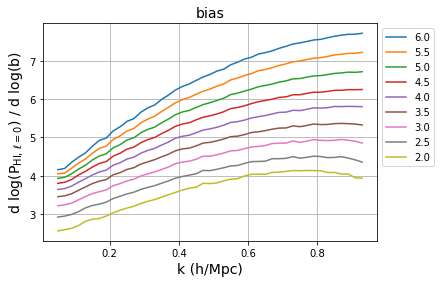

In [307]:

for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    diffs = [newp[i] - fidp[i] for i in range(3)]
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
    fid = np.loadtxt(dpath + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    pkf = fid[1]
    kk = fid[0]
    
    lss = ['-', '--', ':']
    
    derivba, derivbx = 0, 0
    for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        p1 = np.loadtxt(path + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
        
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()
        p2 = np.loadtxt(path + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T

        dbba = (bb1a - bb2a)/diffs[ii]/2
        dbbx = (bb1x - bb2x)/diffs[ii]/2
        pk1 , pk2 = p1[1], p2[1]
        num = (pk1 - pk2)
        den = diffs[ii]*2
        deriv = num/den 
        derivba += deriv/dbba
        derivbx += deriv/dbbx


    derivba, derivbx = derivba/pkf, derivbx/pkf
    mask = kk<0.95
    plt.plot(kk[mask], derivba[mask]*bba, 'C%d'%iz, label=zz)
#     plt.plot(kk[mask], derivbx[mask]*bbx, 'C%d--'%iz)

# plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
# plt.ylim(0.5, 1.5)
plt.title('bias', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.ylabel(r'd log(P$_{\rm HI,\, \ell=0}$) / d log(b)', fontsize=14)
plt.grid()
# plt.yscale('log')
# #         ax[ii].set_yscale('log')
#     ax[ii].set_xlim(0.009,  0.9)

# ax[0].set_ylim(0, 0.7)
# ax[1].set_ylim(0.5, 2)
# ax[2].set_ylim(0.05, 0.3)


Text(0, 0.5, 'd log(P$_{\\rm HI}$) / d log(p)')

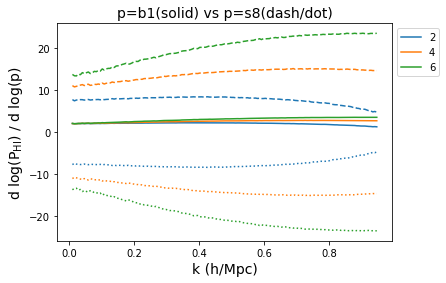

In [360]:

for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    diffs = [newp[i] - fidp[i] for i in range(3)]
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[2][1:6].mean()
    mask = kk<0.95
    
    lss = ['-', '--', ':']
    
    derivba, derivbx = 0, 0
#     for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
    for ii, i in enumerate(['mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()

        dbba = (bb1a - bb2a)/diffs[ii]/2
        dbbx = (bb1x - bb2x)/diffs[ii]/2
        pk1 , pk2 = p1[2]**2*p1[3], p2[2]**2*p2[3]
        num = (pk1 - pk2)
        den = diffs[ii]*2
        deriv = num/den 
        derivba += deriv/dbba
        derivbx += deriv/dbbx
        deriv /= pkf
        deriv *=fidp[ii]
        if ii == 0: 
            plt.plot(kk[mask], deriv[mask], 'C%d--'%iz)
            plt.plot(kk[mask], -deriv[mask], 'C%d:'%iz)
            
    derivba, derivbx = derivba/pkf*bba, derivbx/pkf*bbx
    plt.plot(kk[mask], derivba[mask], 'C%d'%iz, label=zz)

# plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
# plt.ylim(0., 1.5)
plt.title('p=b1(solid) vs p=s8(dash/dot)', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.ylabel(r'd log(P$_{\rm HI}$) / d log(p)', fontsize=14)
# plt.yscale('log')
# #         ax[ii].set_yscale('log')
#     ax[ii].set_xlim(0.009,  0.9)

# ax[0].set_ylim(0, 0.7)
# ax[1].set_ylim(0.5, 2)
# ax[2].set_ylim(0.05, 0.3)


### Chage Mmin to get right bias

In [376]:
bs, nc = 256, 256
ncf = 2560
# sim = '/lowres/%d-9100-fixed'%256
# sim = '/global/cscratch1/sd/chmodi/m3127/H1mass/highres/'
sim = '/global/cscratch1/sd/yfeng1/m3127/highres/'
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])
zlist = np.array([2, 4, 6])
alist = 1/(zlist+1)

hpos, hmass, h1mass = {}, {}, {}
hposup, hmassup, h1massup = {}, {}, {}
hposdn, hmassdn, h1massdn = {}, {}, {}

for i, aa in enumerate(alist):
    zz = zlist[i]
    print(zz)
    halos = BigFileCatalog(sim+ '%d-9100-fixed/fastpm_%0.4f/LL-0.200/'%(ncf, aa))
    mp = halos.attrs['M0']*1e10
    hmass[zz] = halos["Length"].compute()*mp
    h1mass[zz] = ModelC(aa).assignhalo(hmass[zz])
    hpos[zz] = halos['Position'].compute()

    halos = BigFileCatalog(sim+ '%d-9100-fixed-up/fastpm_%0.4f/LL-0.200/'%(ncf, aa))
    mp = halos.attrs['M0']*1e10
    hmassup[zz] = halos["Length"].compute()*mp
    hposup[zz] = halos['Position'].compute()

    halos = BigFileCatalog(sim+ '%d-9100-fixed-dn/fastpm_%0.4f/LL-0.200/'%(ncf, aa))
    mp = halos.attrs['M0']*1e10
    hmassdn[zz] = halos["Length"].compute()*mp
    hposdn[zz] = halos['Position'].compute()


2
4
6


In [472]:

dms = {}
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:newp[i] - fidp[i] for i in range(3)}
#     diffs = 
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[2][1:6].mean()
    mask = kk<0.95

    path = pathdict['sigma'][0]
    p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    path = pathdict['sigma'][1]
    p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    bbaup, bbadn = p1[2][1:6].mean(), p2[2][1:6].mean()
    bbxup, bbxdn = p1[1][1:6].mean(), p2[1][1:6].mean()
    
    print(zz, (bbaup - bba)/bba, (bbadn - bba)/bba)

2 -0.01861010712359152 0.020155318684653752
4 -0.026175222933424534 0.028713228896802903
6 -0.030071089054520387 0.03314090716523671


In [495]:

dms = {}
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(aa)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    s8 = sig80*dgrow(zz)**1
    fidp = [s8, alp0, mcut0]
    newp = [1.05**0.5*s8, alpd, mcutd]

#     diffs = [np.log(newp[i]) - np.log(fidp[i]) for i in range(3)]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:newp[i] - fidp[i] for i in range(3)}
#     diffs = 
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[2][1:6].mean()
    mask = kk<0.95

    path = pathdict['sigma'][0]
    p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    path = pathdict['sigma'][1]
    p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    bbaup, bbadn = p1[2][1:6].mean(), p2[2][1:6].mean()
    bbxup, bbxdn = p1[1][1:6].mean(), p2[1][1:6].mean()
    
    lss = ['-', '--', ':']
    
    derivba, derivbx = 0, 0
    for ii, i in enumerate(['mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()

        dbba = (bb1a - bb2a)/(diffs[i]*2)
        dbbx = (bb1x - bb2x)/(diffs[i]*2)
        
        dmaup = (bba - bbaup)/dbba
        dmadn = (bba - bbadn)/dbba
        
        dms[zz] = [dmaup, dmadn]
#         dmxup = (bbxup - bbx)/dbbx
#         dmxdn = (bbxdn - bbx)/dbbx

        print(zz, dmaup, dmadn)
#         print(zz, dmxup, dmxdn)

2 4311877103.034834 -4669895587.573419
4 4217609861.7040205 -4626558393.200167
6 3934526006.449844 -4336183531.050486


In [496]:

for i, aa in enumerate(alist):
    zz = zlist[i]
    print(zz)

    modelup = ModelC(aa)
    modeldn = ModelC(aa)
    modelup.mcut += dms[zz][0]*0.5
    modeldn.mcut += dms[zz][1]*0.5

    h1massup[zz] = modelup.assignhalo(hmassup[zz])
    h1massdn[zz] = modeldn.assignhalo(hmassdn[zz])


2
4
6


[]

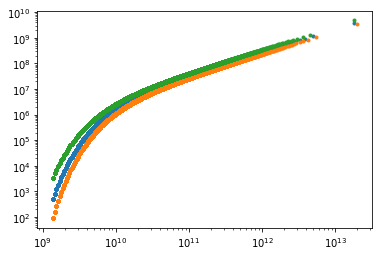

In [497]:
plt.plot(hmass[4][::100], h1mass[4][::100], '.')
plt.plot(hmassup[4][::100], h1massup[4][::100], '.')
plt.plot(hmassdn[4][::100], h1massdn[4][::100], '.')
plt.loglog()

In [498]:
pm = ParticleMesh(BoxSize=256, Nmesh=[128]*3)

hmesh,hmeshup, hmeshdn = {}, {}, {}
pkh, pkhup, pkhdn = {}, {}, {}

for i, aa in enumerate(alist):
    zz = zlist[i]
    print(zz)

    hmesh[zz] = pm.paint(hpos[zz], mass=h1mass[zz])
    pkh[zz] = FFTPower(hmesh[zz]/hmesh[zz].cmean(), mode='1d').power

    hmeshup[zz] = pm.paint(hposup[zz], mass=h1massup[zz])
    pkhup[zz] = FFTPower(hmeshup[zz]/hmeshup[zz].cmean(), mode='1d').power
    
    hmeshdn[zz] = pm.paint(hposdn[zz], mass=h1massdn[zz])
    pkhdn[zz] = FFTPower(hmeshdn[zz]/hmeshdn[zz].cmean(), mode='1d').power


2
4
6


In [499]:
pkm, pkmup, pkmdn = {}, {}, {}
for i, aa in enumerate(alist):
    zz = zlist[i]
    pkm[zz] = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelA/HI_bias_{:06.4f}.txt'.format(aa)).T[[0, 3]]
    pkmup[zz] = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up/ModelA/HI_bias_{:06.4f}.txt'.format(aa)).T[[0, 3]]
    pkmdn[zz] = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn/ModelA/HI_bias_{:06.4f}.txt'.format(aa)).T[[0, 3]]


In [500]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius

[]

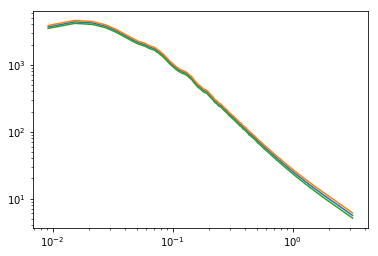

In [501]:
plt.plot(pkm[2][0], pkm[2][1])
plt.plot(pkmup[2][0], pkmup[2][1])
plt.plot(pkmdn[2][0], pkmdn[2][1])
plt.loglog()

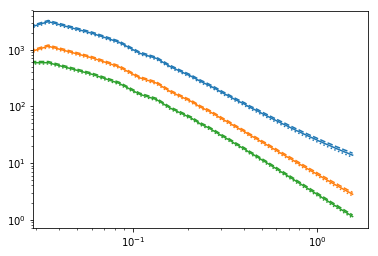

In [502]:
for iz, zz in enumerate(zlist):
    k = pkh[zz]['k']
    p = ius(*pkm[zz])(k)
    plt.plot(k, p, 'C%d'%iz)
    p = ius(*pkmup[zz])(k)
    plt.plot(k, p, 'C%d--'%iz)
    p = ius(*pkmdn[zz])(k)
    plt.plot(k, p, 'C%d:'%iz)
    
plt.xscale('log')
plt.yscale('log')

(1, 5)

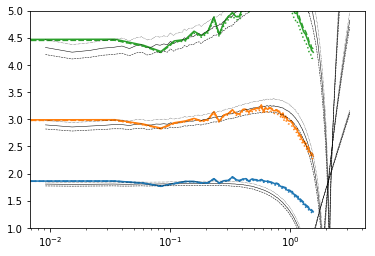

In [503]:
for iz, zz in enumerate(zlist):
    aa = alist[iz]
    k = pkh[zz]['k']
    
    p = ius(*pkm[zz])(k)

    plt.plot(k, (pkh[zz]['power']/p)**0.5, 'C%d'%iz)
    p1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/HI_bias_{:06.4f}.txt'.format(aa)).T
    plt.plot(p1[0], p1[2], 'k', lw=0.5)
    
    p = ius(*pkmup[zz])(k)
    plt.plot(k, (pkhup[zz]['power']/p)**0.5, 'C%d--'%iz)
    p1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up/ModelC/HI_bias_{:06.4f}.txt'.format(aa)).T
    plt.plot(p1[0], p1[2], 'k--', lw=0.5)
    
    p = ius(*pkmdn[zz])(k)
    plt.plot(k, (pkhdn[zz]['power']/p)**0.5, 'C%d:'%iz)
    p1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn/ModelC/HI_bias_{:06.4f}.txt'.format(aa)).T
    plt.plot(p1[0], p1[2], 'k:', lw=0.5)
    
plt.xscale('log')
plt.ylim(1, 5)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


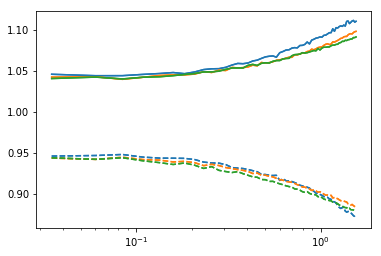

In [504]:
for iz, zz in enumerate(zlist):
    aa = alist[iz]
    k = pkh[zz]['k']
    
    p = ius(*pkm[zz])(k)

    plt.plot(k, (pkhup[zz]['power']/pkh[zz]['power']), 'C%d'%iz)
    plt.plot(k, (pkhdn[zz]['power']/pkh[zz]['power']), 'C%d--'%iz)

    plt.plot(k, (pkhup[zz]['power']/pkh[zz]['power']), 'C%d'%iz)
    plt.plot(k, (pkhdn[zz]['power']/pkh[zz]['power']), 'C%d--'%iz)

    
plt.xscale('log')
# plt.yscale('log')
# plt.ylim(1, 5)

In [516]:
m1 = BigFileMesh('/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1429/dmesh_N0512/', '1').paint()
m2 = BigFileMesh('/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed-up/fastpm_0.1429/dmesh_N0512/', '1').paint()

In [517]:
p1 = FFTPower(m1, mode='1d').power
p2 = FFTPower(m2, mode='1d').power

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


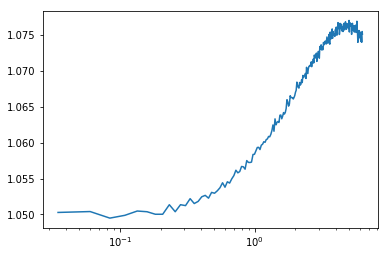

In [520]:
plt.plot(p1['k'], p2['power']/p1['power'])
plt.xscale('log')

[]

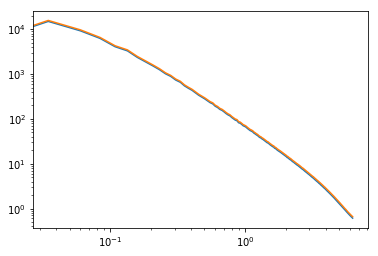

In [519]:
plt.plot(p1['k'], p1['power'])
plt.plot(p1['k'], p2['power'])
plt.loglog()

In [786]:
aa = 0.1429

p1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/HI_bias_0.1429.txt').T
pup = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up/ModelC/HI_bias_0.1429.txt').T
pdn = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn/ModelC/HI_bias_0.1429.txt').T
pup1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up/ModelC/matchbias_mcut/HI_bias_0.1429.txt').T
pdn1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn/ModelC/matchbias_mcut/HI_bias_0.1429.txt').T


# p1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol/ModelC/HI_bias_%0.4f.txt'%aa).T
# pup = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-up/ModelC/HI_bias_%0.4f.txt'%aa).T
# pdn = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-dn/ModelC/HI_bias_%0.4f.txt'%aa).T
# pup1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-up/ModelC/matchbias_mcut/HI_bias_%0.4f.txt'%aa).T
# pdn1 = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-dn/ModelC/matchbias_mcut/HI_bias_%0.4f.txt'%aa).T

(3, 6)

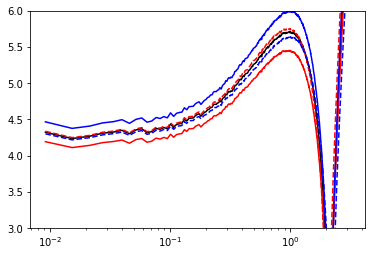

In [787]:
plt.plot(p1[0], p1[2], 'k')
plt.plot(p1[0], pup[2], 'r')
plt.plot(p1[0], pdn[2], 'b')
plt.plot(p1[0], pup1[2], 'r--')
plt.plot(p1[0], pdn1[2], 'b--')
plt.xscale('log')
plt.ylim(3, 6)

### sigma8 derivative at same bias

In [569]:
pathdict

{'sigma': ['../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up//ModelC/',
  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn//ModelC/'],
 'alpha': ['../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/alpha_vp05/',
  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/alpha_vm05/'],
 'mcut': ['../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/mcut_vp05/',
  '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/mcut_vm05/']}

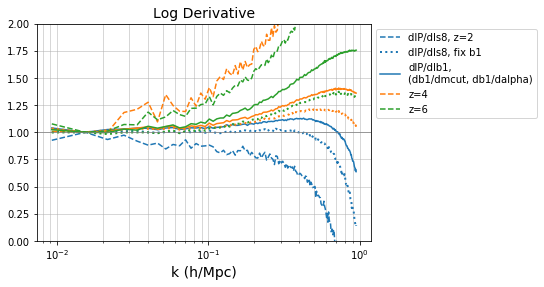

In [774]:

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    mod = ModelC(zz)
    mod.derivate('mcut', -0.05)
    mcutdd = mod.mcut
    mod.derivate('alpha', -0.05)
    alpdd = mod.alp
    s8 = sig80*dgrow(zz)**1

    fidp = [s8, alp0, mcut0]
    upp = [1.05**0.5*s8, alpd, mcutd]
    dnp = [0.95**0.5*s8, alpdd, mcutdd]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:upp[i] - dnp[i] for i in range(3)}
    diffsdn = {keys[i]:dnp[i] - fidp[i] for i in range(3)}
    diffsup = {keys[i]:upp[i] - fidp[i] for i in range(3)}
    
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
    
    lss = ['-', '--', ':']
    
    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pk2)
        den = diffs[i]
        deriv = num/den * fidp[ii]/pkf
        
        lbl = ''
        if iz == 0: lbl = 'dlP/dls8, '
        plt.plot(kk[mask], deriv[mask]/deriv[mask][1], 'C%d--'%iz, label=lbl + 'z=%s'%zz)

    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pkf)
        den = diffsup[i]
        deriv = num/den * fidp[ii]/pkf
        
        lbl = ''
        if iz == 0: lbl = 'dlP/dls8, fix b1'
        plt.plot(kk[mask], deriv[mask]/deriv[mask][1], 'C%d:'%iz, label=lbl, lw=2)

        

    derivba, derivbx = 0, 0
#     for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
    for ii, i in enumerate([ 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()
        pk1 , pk2 = p1[2]**2*p1[3], p2[2]**2*p2[3]

        dbba = (bb1a - bb2a)/(diffs[i])
        dbbx = (bb1x - bb2x)/(diffs[i])
        deriv = (pk1-pk2)/(diffs[i])
        derivba += deriv/dbba
        derivbx += deriv/dbbx

    derivba, derivbx = derivba/pkf*bba, derivbx/pkf*bbx
    mask = kk<0.95
    lbl = ''
    if iz == 0: lbl = 'dlP/dlb1,\n(db1/dmcut, db1/dalpha)'
    plt.plot(kk[mask], derivba[mask]/derivba[mask][1], 'C%d'%iz, label=lbl)

plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 2)
plt.title('Log Derivative', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.axhline(1, color='gray', lw=0.7)
plt.grid(which='both', lw=0.5)

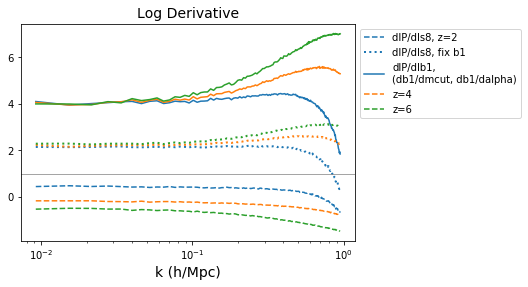

In [790]:

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    mod = ModelC(zz)
    mod.derivate('mcut', -0.05)
    mcutdd = mod.mcut
    mod.derivate('alpha', -0.05)
    alpdd = mod.alp
    s8 = sig80*dgrow(zz)**1

    fidp = [s8, alp0, mcut0]
    upp = [1.05**0.5*s8, alpd, mcutd]
    dnp = [0.95**0.5*s8, alpdd, mcutdd]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:upp[i] - dnp[i] for i in range(3)}
    diffsdn = {keys[i]:dnp[i] - fidp[i] for i in range(3)}
    diffsup = {keys[i]:upp[i] - fidp[i] for i in range(3)}
    
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
    
    lss = ['-', '--', ':']
    
    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pk2)
        den = diffs[i]
        deriv = num/den * fidp[ii]/pkf
        
        lbl = ''
        if iz == 0: lbl = 'dlP/dls8, '
        plt.plot(kk[mask], deriv[mask], 'C%d--'%iz, label=lbl + 'z=%s'%zz)

    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        num = (pk1 - pkf)
        den = diffsup[i]
        deriv = num/den * fidp[ii]/pkf
        
        lbl = ''
        if iz == 0: lbl = 'dlP/dls8, fix b1'
        plt.plot(kk[mask], deriv[mask], 'C%d:'%iz, label=lbl, lw=2)

        

    derivba, derivbx = 0, 0
#     for ii, i in enumerate(['sigma', 'alpha', 'mcut']):
    for ii, i in enumerate(['alpha', 'mcut']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        bb1a, bb1x = p1[2][1:6].mean(), p1[1][1:6].mean()
        bb2a, bb2x = p2[2][1:6].mean(), p2[1][1:6].mean()
        pk1 , pk2 = p1[2]**2*p1[3], p2[2]**2*p2[3]

        dbba = (bb1a - bb2a)/(diffs[i])
        dbbx = (bb1x - bb2x)/(diffs[i])
        deriv = (pk1-pk2)/(diffs[i])
        derivba += deriv/dbba
        derivbx += deriv/dbbx

    derivba, derivbx = derivba/pkf*bba, derivbx/pkf*bbx
    mask = kk<0.95
    lbl = ''
    if iz == 0: lbl = 'dlP/dlb1,\n(db1/dmcut, db1/dalpha)'
    plt.plot(kk[mask], derivba[mask], 'C%d'%iz, label=lbl)

plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1))
# plt.ylim(0, 2)
plt.title('Log Derivative', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.axhline(1, color='gray', lw=0.7)

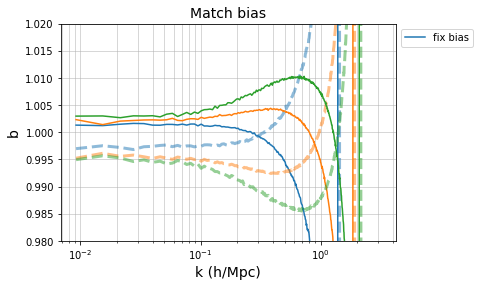

In [842]:

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    mod = ModelC(zz)
    mod.derivate('mcut', -0.05)
    mcutdd = mod.mcut
    mod.derivate('alpha', -0.05)
    alpdd = mod.alp
    s8 = sig80*dgrow(zz)**1

    fidp = [s8, alp0, mcut0]
    upp = [1.05**0.5*s8, alpd, mcutd]
    dnp = [0.95**0.5*s8, alpdd, mcutdd]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:upp[i] - dnp[i] for i in range(3)}
    diffsdn = {keys[i]:dnp[i] - fidp[i] for i in range(3)}
    diffsup = {keys[i]:upp[i] - fidp[i] for i in range(3)}
    
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
#     plt.plot(kk, fid[2], 'C%d-'%iz, label=zz)
    
    lss = ['-', '--', ':']
    
#     for ii, i in enumerate(['sigma']):
#         path = pathdict[i][0]
#         p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
#         path = pathdict[i][1]
#         p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

#         pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
#         lbl = None
#         if iz == 0: lbl = 'fix HOD'
#         plt.plot(kk, p1[2], 'C%d--'%iz, label=lbl)
#         plt.plot(kk, p2[2], 'C%d--'%iz)

    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        lbl = None
        if iz == 0: lbl = 'fix bias'
#         plt.plot(kk, p1[2], 'C%d:'%iz, label=lbl)
#         plt.plot(kk, p2[2], 'C%d:'%iz)
        plt.plot(kk, p1[2]/fid[2], 'C%d-'%iz, label=lbl)
        plt.plot(kk, p2[2]/fid[2], 'C%d--'%iz, lw=3, alpha=0.5)

        

plt.xscale('log')
# plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(1.5, 4.8)
plt.ylim(0.98, 1.02)
plt.title('Match bias', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.ylabel('b', fontsize=14)
plt.grid(which='both', lw=0.5)

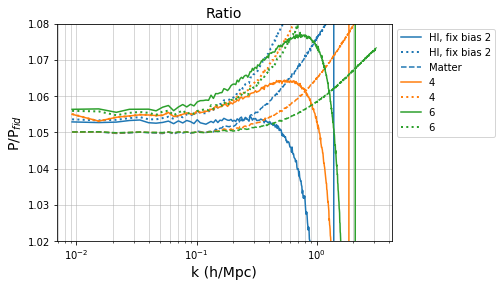

In [652]:

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    mod = ModelC(zz)
    mod.derivate('mcut', -0.05)
    mcutdd = mod.mcut
    mod.derivate('alpha', -0.05)
    alpdd = mod.alp
    s8 = sig80*dgrow(zz)**1

    fidp = [s8, alp0, mcut0]
    upp = [1.05**0.5*s8, alpd, mcutd]
    dnp = [0.95**0.5*s8, alpdd, mcutdd]
    keys = ['sigma', 'alpha', 'mcut']
    diffs = {keys[i]:upp[i] - dnp[i] for i in range(3)}
    diffsdn = {keys[i]:dnp[i] - fidp[i] for i in range(3)}
    diffsup = {keys[i]:upp[i] - fidp[i] for i in range(3)}
    
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pkf = fid[2]**2*fid[3]
    bba = fid[2][1:6].mean()
    bbx = fid[1][1:6].mean()
#     plt.plot(kk, fid[2], 'C%d-'%iz, label=zz)
    
    lss = ['-', '--', ':']
    
    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        lbl = ''
        if iz == 0: lbl = 'HI, fix HOD '
#         plt.plot(kk, pk1/pkf, 'C%d:'%iz, label=lbl, lw=2)
#         plt.plot(kk, p1[2], 'C%d--'%iz, label=lbl)
#         plt.plot(kk, p2[2], 'C%d--'%iz)

    for ii, i in enumerate(['sigma']):
        path = pathdict[i][0]
        p1 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
        path = pathdict[i][1]
        p2 = np.loadtxt(path + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T

        pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
        pk1x , pk2x, pkfx = p1[1]**2*p1[3], p2[1]**2*p2[3], fid[1]**2*fid[3]
        lbl = ''
        if iz == 0: lbl = 'HI, fix bias '
        plt.plot(kk, pk1/pkf, 'C%d-'%iz, label=lbl+'%s'%zz)
        plt.plot(kk, pk1x/pkfx, 'C%d:'%iz, label=lbl+'%s'%zz, lw=2)
#         plt.plot(kk, pk2/pkf, 'C%d:'%iz, label=lbl)
        if iz == 0: lbl = 'Matter'
        plt.plot(kk, p1[3]/fid[3], 'C%d--'%iz, label=lbl)
#         plt.plot(kk, p2[3]/fid[3], 'C%d:'%iz, label=lbl)
#         plt.plot(kk, p2[2], 'C%d:'%iz)

        

plt.xscale('log')
# plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(1.02, 1.08)
plt.title('Ratio', fontsize=14)
plt.xlabel('k (h/Mpc)', fontsize=14)
plt.ylabel('P/P$_{fid}$', fontsize=14)
plt.grid(which='both', lw=0.5)

(0, 4)

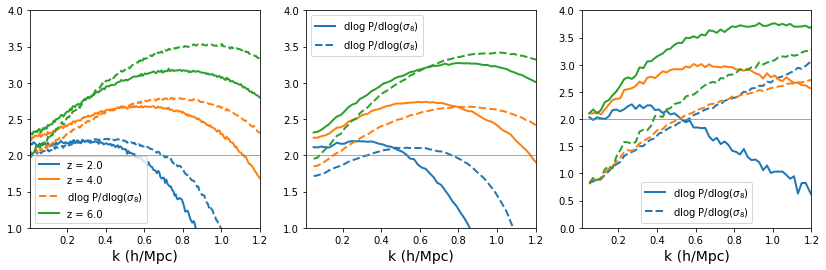

In [848]:
dpath = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/'
dpathup = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-up/ModelC/'
dpathdn = '../data/outputs/m1_00p3mh-alpha-0p8-subvol-big-dn/ModelC/'

fig, ax = plt.subplots(1, 3, figsize = (14,4))

zlist = [2, 4, 6]
for iz, zz in enumerate(zlist):
    aa = 1/(zz+1)
    mod = ModelC(zz)
    alp0, mcut0 = mod.alp, mod.mcut
    lmcut0 = np.log10(mcut0)
    mod.derivate('alpha', 0.05)
    alpd = mod.alp
    mod.derivate('mcut', 0.05)
    mcutd = mod.mcut
    mod = ModelC(zz)
    mod.derivate('mcut', -0.05)
    mcutdd = mod.mcut
    mod.derivate('alpha', -0.05)
    alpdd = mod.alp
    s8 = sig80*dgrow(zz)**1

    fidp = [s8, alp0, mcut0]
    upp = [1.05**0.5*s8, alpd, mcutd]
    dnp = [0.95**0.5*s8, alpdd, mcutdd]
    keys = ['sigma', 'alpha', 'mcut']
    fidp = {keys[i]:fidp[i] for i in range(3)}
    diffs = {keys[i]:upp[i] - dnp[i] for i in range(3)}
    diffsdn = {keys[i]:dnp[i] - fidp[keys[i]] for i in range(3)}
    diffsup = {keys[i]:upp[i] - fidp[keys[i]] for i in range(3)}

    p1 = np.loadtxt(dpath + 'mcut_vp05/HI_bias_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpath + 'mcut_vm05/HI_bias_{:06.4f}.txt'.format(aa)).T
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    bb1a, bb2a = p1[2][1:6].mean(), p2[2][1:6].mean()
    bba = fid[2][1:6].mean()
    dbba = (bb1a - bb2a)/(diffs['mcut'])*fidp['mcut']/bba
    ##
    
    #Real space
    p1 = np.loadtxt(dpathup + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpathdn + 'matchbias_mcut/HI_bias_{:06.4f}.txt'.format(aa)).T
    fid = np.loadtxt(dpath + 'HI_bias_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pk1 , pk2, pkf = p1[2]**2*p1[3], p2[2]**2*p2[3], fid[2]**2*fid[3]
#     pk1 *= fid[2][1]/p1[2][1]
#     pk2 *= fid[2][1]/p2[2][1]
    deriv = (pk1-pk2)/diffs['sigma']*fidp['sigma']/pkf
    ax[0].plot(kk, deriv, 'C%d-'%iz, label='z = %.1f'%zz, lw=2)

    p1 = np.loadtxt(dpath + 'mcut_vp05/HI_bias_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpath + 'mcut_vm05/HI_bias_{:06.4f}.txt'.format(aa)).T
    pk1 , pk2 = p1[2]**2*p1[3], p2[2]**2*p2[3]
    deriv = (pk1-pk2)/diffs['mcut']*fidp['mcut']/pkf
    deriv /= dbba
    ax[0].plot(kk, deriv, 'C%d--'%iz, label=lbl, lw=2)

    
    #Real space
    p1 = np.loadtxt(dpathup + 'matchbias_mcut/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpathdn + 'matchbias_mcut/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    fid = np.loadtxt(dpath + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pk1 , pk2, pkf = p1[1], p2[1], fid[1]
    deriv = (pk1-pk2)/diffs['sigma']*fidp['sigma']/pkf
    lbl = ''
    if iz == 0: lbl = r'dlog P/dlog($\sigma_8$)'
    ax[1].plot(kk, deriv, 'C%d-'%iz, label=lbl, lw=2)

    p1 = np.loadtxt(dpath + 'mcut_vp05/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpath + 'mcut_vm05/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    pk1 , pk2 = p1[1], p2[1]
    deriv = (pk1-pk2)/diffs['mcut']*fidp['mcut']/pkf
    deriv /= dbba
    ax[1].plot(kk, deriv, 'C%d--'%iz, label=lbl, lw=2)

    
      
    #Real space
    p1 = np.loadtxt(dpathup + 'matchbias_mcut/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpathdn + 'matchbias_mcut/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    fid = np.loadtxt(dpath + 'HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    kk = fid[0]
    pk1 , pk2, pkf = p1[2], p2[2], fid[2]
    deriv = (pk1-pk2)/diffs['sigma']*fidp['sigma']/pkf
    ax[2].plot(kk, deriv, 'C%d-'%iz, label=lbl, lw=2)

    p1 = np.loadtxt(dpath + 'mcut_vp05/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    p2 = np.loadtxt(dpath + 'mcut_vm05/HI_pks_ll_{:06.4f}.txt'.format(aa)).T
    pk1 , pk2 = p1[2], p2[2]
    deriv = (pk1-pk2)/diffs['mcut']*fidp['mcut']/pkf
    deriv /= dbba
    ax[2].plot(kk, deriv, 'C%d--'%iz, label=lbl, lw=2)

   
    

for axis in ax:
#     axis.set_xscale('log')
    axis.set_ylim(1, 4)
    axis.set_xlim(1e-2, 1.2)
    axis.set_xlabel('k (h/Mpc)', fontsize=14)
    axis.axhline(2, color='gray', lw=0.7)
    axis.legend()
ax[2].set_ylim(0, 4)
# plt.ylim(-1, 7)

In [822]:
(10**(np.log10(mcut0)*1.05) - 10**(np.log10(mcut0)*0.95))/diffs['mcut']

1.0

# Fit cleft

In [765]:
def cleft(lpt,b1,b2,bs,bn,alpha,sn,auto=True):
    """                                                                     
    Returns P(k) given the parameters for the array                         
    """
    # The column order is:                                                  
    # k,P_Z,P_A,P_W,P_d,P_{dd},P_{d^2},                                     
    # P_{d^2d^2},P_{dd^2},P_{s^2},P_{ds^2},                                 
    # P_{d^2s^2},P_{s^2s^2},P_{D2d},P_{dD2d}                                
    if auto:
        par = np.array([0,1.,1.,1.,b1,b1*b1,b2,b2*b2,b1*b2,\
                            bs,b1*bs,b2*bs,bs*bs,bn,b1*bn])
#         par[7] /= 4. #Bad normalization in ZV's files                       
    else:
        par = np.array([0,1.,1.,1.,b1/2.,0,b2/2.,0,0,bs/2.,0,0,0,bn/2.,0])
    tmp = np.dot(lpt,par)
    tmp += alpha*lpt[:,0]**2*lpt[:,1]
    return( (lpt[:,0],tmp+sn) )

def zeld(lpt,b1,b2,alpha,sn,auto=True):
    """                                                                     
    Returns P(k) given the parameters for the array                         
    """
    # The column order is:                                                  
    # k,P_Z,P_A,P_W,P_d,P_{dd},P_{d^2},                                     
    # P_{d^2d^2},P_{dd^2},P_{s^2},P_{ds^2},                                 
    # P_{d^2s^2},P_{s^2s^2},P_{D2d},P_{dD2d}                                
    if auto:
        par = np.array([0,1.,b1, b2, b1**2, b2**2, b1*b2])
#         par[7] /= 4. #Bad normalization in ZV's files                       
    else:
        par = np.array([0,1.,b1/2., b2/2., 0, 0, 0])
    tmp = np.dot(lpt,par)
    tmp += alpha*lpt[:,0]**2*lpt[:,1]
    return( (lpt[:,0],tmp+sn) )



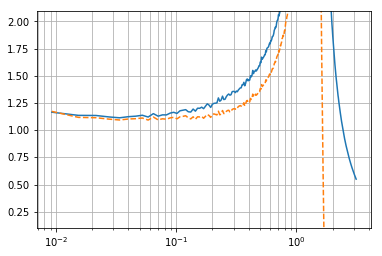

In [767]:
zz = 2.0
aa = 1/(zz+1)
fid = np.loadtxt('../data/outputs/m1_00p3mh-alpha-0p8-subvol-big/ModelC/HI_bias_{:06.4f}.txt'.format(aa)).T
kk = fid[0]
pkf = fid[2]**2 * fid[3]

cl = np.loadtxt('../theory/cleft/pklin_1.0000_cleftpk_z%3d.txt'%(int(zz*100)))
zel = np.loadtxt('../theory/zeld_{:06.4f}.pkr'.format(aa))

b1, b2, al = 0.9, 0.8, 1.5
# b1, b2, al = 0, 0, 1
bs, bn, sn = 0, 0, 0
auto = True

kcl, pkcl = cleft(cl, b1, b2, bs, bn, al, sn, auto=auto)
# plt.plot(kcl, pkcl)

kz, pkz = zeld(zel, b1, b2, al, sn, auto=auto)
# plt.plot(kz, pkz, '--')

plt.plot(kk, ius(kcl, pkcl)(kk)/pkf, '-')
plt.plot(kk, ius(kz, pkz)(kk)/pkf, '--')

plt.semilogx()
plt.ylim(0.1, 2.1)
plt.grid(which='both')

In [710]:
ius(zel[0], zel[1])(cl[:, 0])/cl[:, 1]

array([ 1.36814871e+01,  1.22839386e+01,  1.10920168e+01,  1.00765563e+01,
        9.21449722e+00,  8.48692793e+00,  7.87715715e+00,  7.36981319e+00,
        6.95191929e+00,  6.60970440e+00,  6.33230503e+00,  6.11164920e+00,
        5.94125308e+00,  5.81332053e+00,  5.72163205e+00,  5.66073852e+00,
        5.62446456e+00,  5.60649721e+00,  5.60028455e+00,  5.59944088e+00,
        5.60016793e+00,  5.60107156e+00,  5.60099688e+00,  5.59812748e+00,
        5.58984917e+00,  5.57428830e+00,  5.55490869e+00,  5.54414333e+00,
        5.54969871e+00,  5.53771198e+00,  5.50007665e+00,  5.53830955e+00,
        5.51605522e+00,  5.55687297e+00,  5.55134066e+00,  5.63917748e+00,
        5.70389963e+00,  5.78514897e+00,  5.89460163e+00,  6.02729561e+00,
        6.18759703e+00,  6.36773120e+00,  6.56381973e+00,  6.72828742e+00,
        5.93719829e+00, -1.58026417e+00, -3.96728133e+01, -1.90533000e+02,
       -7.09475250e+02, -2.33718705e+03])